<a href="https://colab.research.google.com/github/groda/big_data/blob/master/Hadoop_minicluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://github.com/groda/big_data"><div><img src="https://github.com/groda/big_data/blob/master/logo_bdb.png?raw=true" align=right width="90"></div></a>

# Hadoop MiniCluster
<br>
<br>

The Hadoop MiniCluster is a lightweight, single-node Hadoop cluster that is primarily used for testing and development purposes. It provides a way to simulate a distributed Hadoop environment on a single machine, allowing developers to experiment with and test their Hadoop applications without the need for a full-scale, multi-node cluster.

Quote from [the official Hadoop documentation](https://hadoop.apache.org/docs/stable/hadoop-project-dist/hadoop-common/CLIMiniCluster.html):


> *Using the CLI MiniCluster, users can simply start and stop a single-node Hadoop cluster with a single command, and without the need to set any environment variables or manage configuration files. The CLI MiniCluster starts both a YARN/MapReduce & HDFS clusters.*


In this notebook we download the Hadoop core and guide you through the steps required to launch the MiniCluster.

In [1]:
# @title
from IPython.core.display import HTML
HTML("""
<div style="background-color:rgb(16, 163, 127,.2);border:2px solid rgb(16, 163, 127,.3);padding:3px;">
<svg fill="none" xmlns="http://www.w3.org/2000/svg" viewBox="0 0 320 320"  style="width:32px;height:32px;">
 <g fill="currentColor">
  <path d="m297.06 130.97c7.26-21.79 4.76-45.66-6.85-65.48-17.46-30.4-52.56-46.04-86.84-38.68-15.25-17.18-37.16-26.95-60.13-26.81-35.04-.08-66.13 22.48-76.91 55.82-22.51 4.61-41.94 18.7-53.31 38.67-17.59 30.32-13.58 68.54 9.92 94.54-7.26 21.79-4.76 45.66 6.85 65.48 17.46 30.4 52.56 46.04 86.84 38.68 15.24 17.18 37.16 26.95 60.13 26.8 35.06.09 66.16-22.49 76.94-55.86 22.51-4.61 41.94-18.7 53.31-38.67 17.57-30.32 13.55-68.51-9.94-94.51zm-120.28 168.11c-14.03.02-27.62-4.89-38.39-13.88.49-.26 1.34-.73 1.89-1.07l63.72-36.8c3.26-1.85 5.26-5.32 5.24-9.07v-89.83l26.93 15.55c.29.14.48.42.52.74v74.39c-.04 33.08-26.83 59.9-59.91 59.97zm-128.84-55.03c-7.03-12.14-9.56-26.37-7.15-40.18.47.28 1.3.79 1.89 1.13l63.72 36.8c3.23 1.89 7.23 1.89 10.47 0l77.79-44.92v31.1c.02.32-.13.63-.38.83l-64.41 37.19c-28.69 16.52-65.33 6.7-81.92-21.95zm-16.77-139.09c7-12.16 18.05-21.46 31.21-26.29 0 .55-.03 1.52-.03 2.2v73.61c-.02 3.74 1.98 7.21 5.23 9.06l77.79 44.91-26.93 15.55c-.27.18-.61.21-.91.08l-64.42-37.22c-28.63-16.58-38.45-53.21-21.95-81.89zm221.26 51.49-77.79-44.92 26.93-15.54c.27-.18.61-.21.91-.08l64.42 37.19c28.68 16.57 38.51 53.26 21.94 81.94-7.01 12.14-18.05 21.44-31.2 26.28v-75.81c.03-3.74-1.96-7.2-5.2-9.06zm26.8-40.34c-.47-.29-1.3-.79-1.89-1.13l-63.72-36.8c-3.23-1.89-7.23-1.89-10.47 0l-77.79 44.92v-31.1c-.02-.32.13-.63.38-.83l64.41-37.16c28.69-16.55 65.37-6.7 81.91 22 6.99 12.12 9.52 26.31 7.15 40.1zm-168.51 55.43-26.94-15.55c-.29-.14-.48-.42-.52-.74v-74.39c.02-33.12 26.89-59.96 60.01-59.94 14.01 0 27.57 4.92 38.34 13.88-.49.26-1.33.73-1.89 1.07l-63.72 36.8c-3.26 1.85-5.26 5.31-5.24 9.06l-.04 89.79zm14.63-31.54 34.65-20.01 34.65 20v40.01l-34.65 20-34.65-20z"></path>
  </svg>
  <b>Note:</b>
While the MiniCluster is useful for many development and testing scenarios, it's important to note that it does not fully replicate the complexities and challenges of a true multi-node Hadoop cluster. For production-scale testing or performance evaluations, a larger, more representative cluster setup is recommended.
</div>
""")

## About this tutorial

This tutorial dives deep to help you really get the hang of things, explaining every step in Big Data processing, even if it takes a bit of time, so just hang in there and be patient! 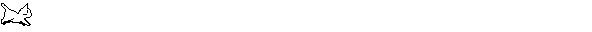

# Preamble

## Download Hadoop

In [2]:
import urllib.request
import os
import shutil
import tarfile
import logging
import subprocess
import time
import sys
############
# COSTANTS #
############

# URL for downloading Hadoop (archive site https://archive.apache.org/dist/)
HADOOP_URL = "https://archive.apache.org/dist/hadoop/core/hadoop-3.4.0/hadoop-3.4.0.tar.gz"

# logging level (should be one of: DEBUG, INFO, WARNING, ERROR, CRITICAL)
LOGGING_LEVEL = "INFO" #@param ["DEBUG", "INFO", "WARNING", "ERROR", "CRITICAL"]

# setup logging
for handler in logging.root.handlers[:]:
    logging.root.removeHandler(handler)

logging_level = getattr(logging, LOGGING_LEVEL.upper(), 10)

logging.basicConfig(level=logging_level, \
                    format='%(asctime)s - %(levelname)s: %(message)s', \
                    datefmt='%d-%b-%y %I:%M:%S %p')

logger = logging.getLogger('my_logger')

JAVA_PATH = '/usr/lib/jvm/java-11-openjdk-amd64'

# true if running on Google Colab
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
 from google.colab import output

# setup logging
for handler in logging.root.handlers[:]:
    logging.root.removeHandler(handler)

logging_level = getattr(logging, LOGGING_LEVEL.upper(), 10)

logging.basicConfig(level=logging_level, \
                    format='%(asctime)s - %(levelname)s: %(message)s', \
                    datefmt='%d-%b-%y %I:%M:%S %p')

logger = logging.getLogger('my_logger')

# set variable JAVA_HOME (install Java if necessary)
def is_java_installed():
    os.environ['JAVA_HOME'] = os.path.realpath(shutil.which("java")).split('/bin')[0]
    return os.environ['JAVA_HOME']

def install_java():
    # Uncomment and modify the desired version
    # java_version= 'openjdk-11-jre-headless'
    # java_version= 'default-jre'
    # java_version= 'openjdk-17-jre-headless'
    # java_version= 'openjdk-18-jre-headless'
    java_version= 'openjdk-19-jre-headless'

    print(f"Java not found. Installing {java_version} ... (this might take a while)")
    try:
        cmd = f"apt install -y {java_version}"
        subprocess_output = subprocess.run(cmd, shell=True, check=True, stdout=subprocess.PIPE, stderr=subprocess.STDOUT, text=True)
        stdout_result = subprocess_output.stdout
        # Process the results as needed
        logger.info("Done installing Java {}".format(java_version))
        os.environ['JAVA_HOME'] = os.path.realpath(shutil.which("java")).split('/bin')[0]
        logger.info("JAVA_HOME is {}".format(os.environ['JAVA_HOME']))
    except subprocess.CalledProcessError as e:
        # Handle the error if the command returns a non-zero exit code
        logger.warn("Command failed with return code {}".format(e.returncode))
        logger.warn("stdout: {}".format(e.stdout))

# Install Java if not available
if is_java_installed():
    logger.info("Java is already installed: {}".format(os.environ['JAVA_HOME']))
else:
    logger.info("Installing Java")
    install_java()


# download Hadoop
file_name = os.path.basename(HADOOP_URL)
if os.path.isfile(file_name):
   logger.info("{} already exists, not downloading".format(file_name))
else:
  logger.info("Downloading {}".format(file_name))
  urllib.request.urlretrieve(HADOOP_URL, file_name)

# uncompress archive
dir_name = file_name[:-7]
if os.path.exists(dir_name):
  logger.info("{} is already uncompressed".format(file_name))
else:
  logger.info("Uncompressing {}".format(file_name))
  tar = tarfile.open(file_name)
  tar.extractall()
  tar.close()

# environment variables
os.environ['HADOOP_HOME'] = os.path.join(os.getcwd(), dir_name)
logger.info("HADOOP_HOME is {}".format(os.environ['HADOOP_HOME']))
os.environ['PATH'] = ':'.join([os.path.join(os.environ['HADOOP_HOME'], 'bin'), os.environ['PATH']])
logger.info("PATH is {}".format(os.environ['PATH']))


13-Oct-24 09:38:37 AM - INFO: Java is already installed: /usr/lib/jvm/temurin-11-jdk-amd64


13-Oct-24 09:38:37 AM - INFO: Downloading hadoop-3.4.0.tar.gz


13-Oct-24 09:39:20 AM - INFO: Uncompressing hadoop-3.4.0.tar.gz


13-Oct-24 09:39:32 AM - INFO: HADOOP_HOME is /home/runner/work/big_data/big_data/hadoop-3.4.0


13-Oct-24 09:39:32 AM - INFO: PATH is /home/runner/work/big_data/big_data/hadoop-3.4.0/bin:/opt/hostedtoolcache/Java_Temurin-Hotspot_jdk/11.0.24-8/x64/bin:/opt/hostedtoolcache/Python/3.8.18/x64/bin:/opt/hostedtoolcache/Python/3.8.18/x64:/snap/bin:/home/runner/.local/bin:/opt/pipx_bin:/home/runner/.cargo/bin:/home/runner/.config/composer/vendor/bin:/usr/local/.ghcup/bin:/home/runner/.dotnet/tools:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin


### Check environment variables used by `mapred`

The following steps are not needed but they might be useful to get familiar the `mapred` command.

`mapred minicluster` is the command that we are going to use to start the MiniCluster once a few variables and libraries are taken care of.

In [3]:
!mapred -h

Usage: mapred [OPTIONS] SUBCOMMAND [SUBCOMMAND OPTIONS]
 or    mapred [OPTIONS] CLASSNAME [CLASSNAME OPTIONS]
  where CLASSNAME is a user-provided Java class

  OPTIONS is none or any of:



--config dir   Hadoop config directory
--debug        turn on shell script debug mode
--help         usage information

  SUBCOMMAND is one of:


    Admin Commands:

frameworkuploader   mapreduce framework upload


hsadmin             job history server admin interface

    Client Commands:

classpath           prints the class path needed for running mapreduce
                    subcommands
envvars             display computed Hadoop environment variables
job                 manipulate MapReduce jobs
minicluster         CLI MiniCluster
pipes               run a Pipes job
queue               get information regarding JobQueues
sampler             sampler
version             print the version

    Daemon Commands:

historyserver       run job history servers as a standalone daemon

SUBCOMMAND may print help when invoked w/o parameters or with -h.


In [4]:
!mapred envvars

JAVA_HOME='/usr/lib/jvm/temurin-11-jdk-amd64'
HADOOP_MAPRED_HOME='/home/runner/work/big_data/big_data/hadoop-3.4.0'
MAPRED_DIR='share/hadoop/mapreduce'
MAPRED_LIB_JARS_DIR='share/hadoop/mapreduce/lib'
HADOOP_CONF_DIR='/home/runner/work/big_data/big_data/hadoop-3.4.0/etc/hadoop'
HADOOP_TOOLS_HOME='/home/runner/work/big_data/big_data/hadoop-3.4.0'
HADOOP_TOOLS_DIR='share/hadoop/tools'
HADOOP_TOOLS_LIB_JARS_DIR='share/hadoop/tools/lib'


## Set `HADOOP_TOOLS_LIB_JARS_DIR`

This variable needs to point to the folder containing Hadoop libraries. As you can see in the output of `mapred envvars`, by default this is set incorrectly to `share/hadoop/tools/lib`.

In [5]:
os.environ['HADOOP_TOOLS_LIB_JARS_DIR'] = os.path.join(os.environ['HADOOP_HOME'], 'share/hadoop/tools/lib/') #IMPORTANT

## Install the `mockito` library

To figure out which version of `mockito` is compatible with the current version of Hadoop, check this page for library dependency analysis: https://hadoop.apache.org/docs/stable/hadoop-project-dist/hadoop-hdfs/dependency-analysis.html

We need Mockito 2.28.2.

After a new Hadoop installation, the mockito library is not yet there!

In [6]:
!find hadoop-3.4.0 -name "mockito*"

Download it from the Maven repository.

In [7]:
!wget --no-clobber https://repo1.maven.org/maven2/org/mockito/mockito-core/2.28.2/mockito-core-2.28.2.jar

--2024-10-13 09:39:33--  https://repo1.maven.org/maven2/org/mockito/mockito-core/2.28.2/mockito-core-2.28.2.jar
Resolving repo1.maven.org (repo1.maven.org)... 146.75.76.209, 2a04:4e42:83::209
Connecting to repo1.maven.org (repo1.maven.org)|146.75.76.209|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 591179 (577K) [application/java-archive]
Saving to: ‘mockito-core-2.28.2.jar’

mockito-core-2.28.2 100%[===================>] 577.32K  --.-KB/s    in 0.008s  

2024-10-13 09:39:33 (73.2 MB/s) - ‘mockito-core-2.28.2.jar’ saved [591179/591179]



Install the library in a location where it can be found.

In [8]:
shutil.copy('mockito-core-2.28.2.jar', os.path.join(os.environ['HADOOP_HOME'],'share/hadoop/mapreduce/'))

'/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/mapreduce/mockito-core-2.28.2.jar'

In [9]:
os.listdir(os.path.join(os.environ['HADOOP_HOME'],'share/hadoop/mapreduce/'))

['hadoop-mapreduce-client-common-3.4.0.jar',
 'hadoop-mapreduce-client-jobclient-3.4.0-tests.jar',
 'hadoop-mapreduce-client-hs-plugins-3.4.0.jar',
 'hadoop-mapreduce-client-shuffle-3.4.0.jar',
 'hadoop-mapreduce-client-app-3.4.0.jar',
 'sources',
 'hadoop-mapreduce-client-jobclient-3.4.0.jar',
 'hadoop-mapreduce-examples-3.4.0.jar',
 'hadoop-mapreduce-client-core-3.4.0.jar',
 'mockito-core-2.28.2.jar',
 'hadoop-mapreduce-client-uploader-3.4.0.jar',
 'hadoop-mapreduce-client-hs-3.4.0.jar',
 'hadoop-mapreduce-client-nativetask-3.4.0.jar',
 'jdiff']

## Create folders for the datanodes

These folders are needed for the correct functioning of the MiniCluster.

In [10]:
!mkdir -p ./target/test/data/dfs/{name-0-1,name-0-2}

In [11]:
!ls ./target/test/data/dfs/

{name-0-1,name-0-2}


# Start the MiniCluster


To see a full list of options run `mapred minicluster -help`.

In [12]:
!mapred minicluster -help

usage: ...
 -D <property=value>   Options to pass into configuration object
 -datanodes <arg>      How many datanodes to start (default 1)
 -format               Format the DFS (default false)
 -help                 Prints option help.
 -jhsport <arg>        JobHistoryServer port (default 0--we choose)
 -namenode <arg>       URL of the namenode (default is either the DFS
                       cluster or a temporary dir)
 -nnhttpport <arg>     NameNode HTTP port (default 0--we choose)
 -nnport <arg>         NameNode port (default 0--we choose)
 -nodemanagers <arg>   How many nodemanagers to start (default 1)
 -nodfs                Don't start a mini DFS cluster
 -nomr                 Don't start a mini MR cluster
 -rmport <arg>         ResourceManager port (default 0--we choose)
 -writeConfig <path>   Save configuration to this XML file.
 -writeDetails         Write basic information to this JSON file.


If you are not running this notebook for the first time or have edited the `core-site.xml` file you should now empty it to get the default initial configuration.

**Note:** the file `core-site.xml` needs to exist and contain the lines

```
<configuration>

</configuration>
```


In [13]:
# check if the file is there
!find $HADOOP_HOME -name "core-site.xml"

/home/runner/work/big_data/big_data/hadoop-3.4.0/etc/hadoop/core-site.xml


In [14]:
# view the contents of the file
!cat $(find $HADOOP_HOME -name "core-site.xml")

<?xml version="1.0" encoding="UTF-8"?>
<?xml-stylesheet type="text/xsl" href="configuration.xsl"?>
<!--
  Licensed under the Apache License, Version 2.0 (the "License");
  you may not use this file except in compliance with the License.
  You may obtain a copy of the License at

    http://www.apache.org/licenses/LICENSE-2.0

  Unless required by applicable law or agreed to in writing, software
  distributed under the License is distributed on an "AS IS" BASIS,
  WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
  See the License for the specific language governing permissions and
  limitations under the License. See accompanying LICENSE file.
-->

<!-- Put site-specific property overrides in this file. -->

<configuration>
</configuration>


In [15]:
with open(os.environ['HADOOP_HOME']+'/etc/hadoop/core-site.xml', 'w') as file:
  file.write("<configuration>\n</configuration>")

In [16]:
!cat $(find $HADOOP_HOME -name "core-site.xml")

<configuration>
</configuration>

## `mapred minicluster -format`

Finally, we are all set up to start the MiniCluster.

Make sure to include the `-format` option to initialize and format the filesystem.

Other than that, we are using the defaults for all the other options.


Note that this process runs forever thus blocking the notebook. In order to proceed with the rest of the notebook, just interrupt the running cell.

We'll see later how to run the MiniCluster as a subprocess without blocking the notebook's cells execution.

Uncomment the next cell to launch the MiniCluster!

In [17]:
#!mapred minicluster -format

If the MiniMRCluster started correctly, you should see a line like this at the bottom:

     2024-01-14 13:53:15,112 INFO mapreduce.MiniHadoopClusterManager: Started MiniMRCluster

# Stop the MiniCluster process

To continue to work with this notebook, you need to stop the MiniCluster by terminating the execution of the previous cell.

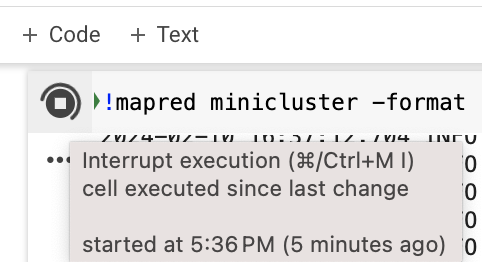

# Start the MiniCluster as a subprocess

It is convenient to start the MiniCluster as a subprocess in order prevent it from blocking the execution of other notebook cells.

The MiniCluster is a Java process with multiple listening ports.



## Use `lsof` to show listening ports

To check ports that have listening services use `lsof`.

The output should look like this:

```
COMMAND         PID USER   FD   TYPE DEVICE SIZE/OFF NODE NAME
node              7 root   21u  IPv6  19666      0t0  TCP *:8080 (LISTEN)
kernel_manager_  20 root    3u  IPv4  18322      0t0  TCP 172.28.0.12:6000 (LISTEN)
colab-fileshim.  61 root    3u  IPv4  19763      0t0  TCP 127.0.0.1:3453 (LISTEN)
jupyter-noteboo  79 root    7u  IPv4  19989      0t0  TCP 172.28.0.12:9000 (LISTEN)
python3         428 root   21u  IPv4  25506      0t0  TCP 127.0.0.1:38217 (LISTEN)
python3         467 root    3u  IPv4  26425      0t0  TCP 127.0.0.1:43729 (LISTEN)
python3         467 root    5u  IPv4  26426      0t0  TCP 127.0.0.1:60229 (LISTEN)
```

In [18]:
!lsof -n -i -P +c0 -sTCP:LISTEN

COMMAND  PID   USER   FD   TYPE DEVICE SIZE/OFF NODE NAME
python  4369 runner   10u  IPv4  74469      0t0  TCP 127.0.0.1:37001 (LISTEN)
python  4369 runner   12u  IPv4  74471      0t0  TCP 127.0.0.1:51093 (LISTEN)
python  4369 runner   14u  IPv4  74473      0t0  TCP 127.0.0.1:43921 (LISTEN)
python  4369 runner   23u  IPv4  74477      0t0  TCP 127.0.0.1:49399 (LISTEN)
python  4369 runner   28u  IPv4  74481      0t0  TCP 127.0.0.1:36477 (LISTEN)
python  4369 runner   36u  IPv4  72829      0t0  TCP 127.0.0.1:44503 (LISTEN)


Options used in `lsof`:

* `-i` specifies that you want to display only network files, that is open network connections
* `-n` and `-P` tell `lsof` to show IP addresses (`-n`) and ports (`-P`) in numeric form. This makes `lsof` faster as it saves the time for name lookups.
* the option `+c0` is used to show a longer substring of the name of the UNIX command associated with the process (https://linux.die.net/man/8/lsof)
* `-sTCP:LISTEN` filters for TCP connections in state `LISTEN`

See also [lsof and listening ports](https://unix.stackexchange.com/questions/26887/lsof-and-listening-ports) on Stackexchange.

## Start the subprocess

Start the MiniCluster as a subprocess using Python's [`subprocess` library](https://docs.python.org/3/library/subprocess.html).

The files `out.txt` and `err.txt` will contain respectively the standard output and the standard error emitted by the `mapred minicluster` command.

In [19]:
import subprocess
with open('out.txt', "w") as stdout_file, open('err.txt', "w") as stderr_file:
    process = subprocess.Popen(
        ["mapred", "minicluster", "-format"],
        stdout=stdout_file,
        stderr=stderr_file
    )

Wait for a couple of seconds because the services might not be available immediately.

In [20]:
if not IN_COLAB:
  time.sleep(30)
else:
  time.sleep(10)

Now check for listening ports again (you can also refresh the next cell with ctrl-enter).

In [21]:
!lsof -n -i -P +c0 -sTCP:LISTEN

COMMAND  PID   USER   FD   TYPE DEVICE SIZE/OFF NODE NAME
python  4369 runner   10u  IPv4  74469      0t0  TCP 127.0.0.1:37001 (LISTEN)
python  4369 runner   12u  IPv4  74471      0t0  TCP 127.0.0.1:51093 (LISTEN)
python  4369 runner   14u  IPv4  74473      0t0  TCP 127.0.0.1:43921 (LISTEN)
python  4369 runner   23u  IPv4  74477      0t0  TCP 127.0.0.1:49399 (LISTEN)
python  4369 runner   28u  IPv4  74481      0t0  TCP 127.0.0.1:36477 (LISTEN)
python  4369 runner   36u  IPv4  72829      0t0  TCP 127.0.0.1:44503 (LISTEN)
java    4612 runner  341u  IPv4  72927      0t0  TCP 127.0.0.1:40811 (LISTEN)
java    4612 runner  354u  IPv4  72930      0t0  TCP 127.0.0.1:37841 (LISTEN)
java    4612 runner  364u  IPv4  76854      0t0  TCP 127.0.0.1:32815 (LISTEN)
java    4612 runner  367u  IPv4  72948      0t0  TCP 127.0.0.1:41281 (LISTEN)
java    4612 runner  420u  IPv4  76859      0t0  TCP 127.0.0.1:33233 (LISTEN)
java    4612 runner  421u  IPv4  76863      0t0  TCP 127.0.0.1:45237 (LISTEN)
java  

You should have gotten something like this (a total of $18$ listening ports associated with the MiniCluster process):

```
COMMAND           PID USER   FD   TYPE DEVICE SIZE/OFF NODE NAME
node                6 root   21u  IPv6  17373      0t0  TCP *:8080 (LISTEN)
kernel_manager_    20 root    3u  IPv4  17180      0t0  TCP 172.28.0.12:6000 (LISTEN)
colab-fileshim.    58 root    3u  IPv4  19499      0t0  TCP 127.0.0.1:3453 (LISTEN)
jupyter-noteboo    75 root    7u  IPv4  19658      0t0  TCP 172.28.0.12:9000 (LISTEN)
python3          4081 root   21u  IPv4 108431      0t0  TCP 127.0.0.1:44519 (LISTEN)
python3          4108 root    3u  IPv4 109755      0t0  TCP 127.0.0.1:46699 (LISTEN)
python3          4108 root    5u  IPv4 109756      0t0  TCP 127.0.0.1:51813 (LISTEN)
java            17261 root  347u  IPv4 390097      0t0  TCP 127.0.0.1:38817 (LISTEN)
java            17261 root  357u  IPv4 391184      0t0  TCP 127.0.0.1:41631 (LISTEN)
java            17261 root  367u  IPv4 390801      0t0  TCP 127.0.0.1:34651 (LISTEN)
java            17261 root  370u  IPv4 390804      0t0  TCP 127.0.0.1:35015 (LISTEN)
java            17261 root  399u  IPv4 390814      0t0  TCP 127.0.0.1:46503 (LISTEN)
java            17261 root  400u  IPv4 390817      0t0  TCP 127.0.0.1:44665 (LISTEN)
java            17261 root  423u  IPv4 401418      0t0  TCP *:8031 (LISTEN)
java            17261 root  440u  IPv4 395796      0t0  TCP *:10033 (LISTEN)
java            17261 root  450u  IPv4 400174      0t0  TCP *:19888 (LISTEN)
java            17261 root  455u  IPv4 396244      0t0  TCP 127.0.0.1:43877 (LISTEN)
java            17261 root  465u  IPv4 400367      0t0  TCP *:8088 (LISTEN)
java            17261 root  470u  IPv4 400420      0t0  TCP *:8033 (LISTEN)
java            17261 root  490u  IPv4 401422      0t0  TCP *:8030 (LISTEN)
java            17261 root  500u  IPv4 400426      0t0  TCP 127.0.0.1:37335 (LISTEN)
java            17261 root  510u  IPv4 400470      0t0  TCP 127.0.0.1:42337 (LISTEN)
java            17261 root  520u  IPv4 401450      0t0  TCP 127.0.0.1:40401 (LISTEN)
java            17261 root  530u  IPv4 401454      0t0  TCP *:42359 (LISTEN)
java            17261 root  531u  IPv4 401457      0t0  TCP 127.0.0.1:38543 (LISTEN)
```

The `java` process is the one responsible for providing the MiniCluster services by listening on several ports.

There are two known ports for the Web interfaces (see [https://hadoop.apache.org/docs/.../ClusterSetup.html#Web_Interfaces](https://hadoop.apache.org/docs/r3.0.1/hadoop-project-dist/hadoop-common/ClusterSetup.html#Web_Interfaces)):
*  $8088$ the port to the ResourceManager
*  $19888$ the port to the MapReduce JobHistory Server



### Access the Web UI

Let us check the Web interface at port $8088$.

In [22]:
!wget http://localhost:8088

--2024-10-13 09:40:05--  http://localhost:8088/
Resolving localhost (localhost)... ::1, 127.0.0.1
Connecting to localhost (localhost)|::1|:8088... failed: Connection refused.
Connecting to localhost (localhost)|127.0.0.1|:8088... connected.
HTTP request sent, awaiting response... 

302 Found
Location: http://localhost:8088/node [following]
--2024-10-13 09:40:05--  http://localhost:8088/node
Reusing existing connection to localhost:8088.
HTTP request sent, awaiting response... 

200 OK
Length: 6597 (6.4K) [text/html]
Saving to: ‘index.html’

index.html          100%[===================>]   6.44K  --.-KB/s    in 0s      

2024-10-13 09:40:05 (694 MB/s) - ‘index.html’ saved [6597/6597]



We can serve the ResourceManager UI in the browser through Google Colab.

In [23]:
if IN_COLAB:
    # serve the Web UI on Colab
    print("Click on the link below to open the Resource Manager Web UI 🚀")
    output.serve_kernel_port_as_window(8088, path='/node')

The port $19888$ is redirected to the same page as port $8088$, so it won't be very useful. I'm not sure if this is due to a missing configuration parameter or if it's a bug.

In [24]:
!wget http://localhost:19888

--2024-10-13 09:40:05--  http://localhost:19888/
Resolving localhost (localhost)... ::1, 127.0.0.1
Connecting to localhost (localhost)|::1|:19888... failed: Connection refused.
Connecting to localhost (localhost)|127.0.0.1|:19888... connected.
HTTP request sent, awaiting response... 302 Found
Location: http://localhost:19888/node [following]
--2024-10-13 09:40:05--  http://localhost:19888/node
Reusing existing connection to localhost:19888.
HTTP request sent, awaiting response... 200 OK
Length: 6597 (6.4K) [text/html]
Saving to: ‘index.html.1’

index.html.1        100%[===================>]   6.44K  --.-KB/s    in 0s      

2024-10-13 09:40:05 (585 MB/s) - ‘index.html.1’ saved [6597/6597]



In [25]:
if IN_COLAB:
    # serve the Web UI on Colab
    print("Click on the link below to open the MapReduce JobHistory Server Web UI 🚀")
    output.serve_kernel_port_as_window(19888, path='/node')

### Use ngrok to access the Web UI

In the free tier of Google Colab this functionality might not be available (see https://research.google.com/colaboratory/faq.html#limitations-and-restrictions). As an alternative, you can use [ngrok](https://ngrok.com/) after signing up for a free account.

Check the NGROK box below if you want to use ngrok.



In [26]:
# you should set this to True
NGROK = False #@param {type:"boolean"}

We are going to use the Python ngrok client `pyngrok` (see the [Colab example](https://pyngrok.readthedocs.io/en/latest/integrations.html#colab-http-example)).

In [27]:
if NGROK:
  !pip install pyngrok
  from pyngrok import ngrok, conf
  import getpass

  print("Enter your authtoken, which can be copied from https://dashboard.ngrok.com/get-started/your-authtoken")
  conf.get_default().auth_token = getpass.getpass()

After entering the ngrok authorization token, you can open a connection.

In [28]:
if NGROK:
  # Open a ngrok tunnel to the HTTP server
  public_url = ngrok.connect(19888).public_url

In [29]:
if NGROK:
  print(f'Click on {public_url} to open the MapReduce JobHistory Server Web UI')

You can safely ignore the warning since we are not disclosing any confidential information and proceed with clicking on the "Visit site" button.

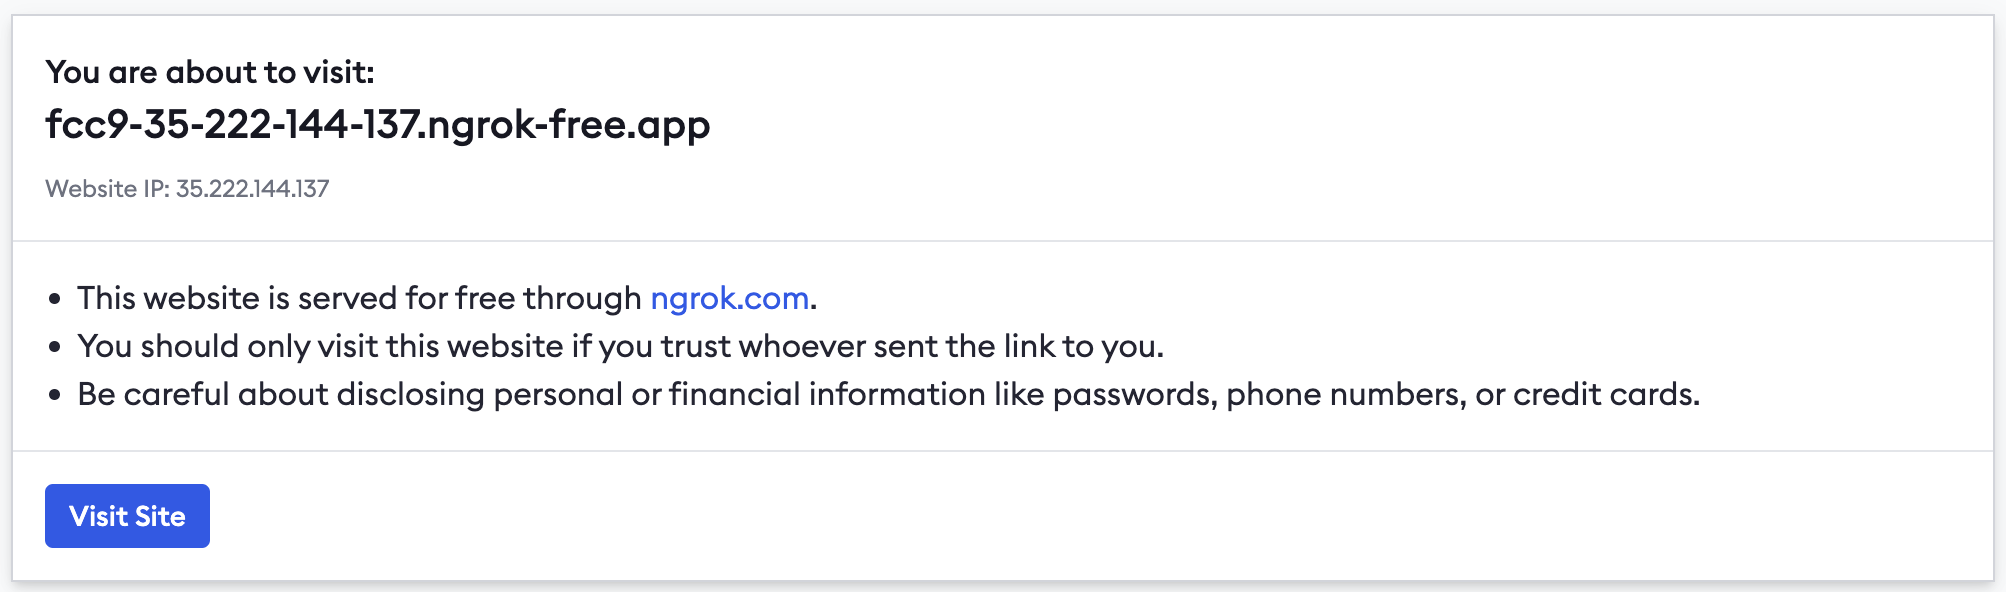

## Stop the MiniCluster subprocess

To stop the MiniCluster subprocess use `process.kill()` (remember: `process` is the variable name for the MiniCluster subprocess).

In [30]:
process.kill()

The Java process should now be gone.

In [31]:
!lsof -n -i -P +c0 -sTCP:LISTEN

COMMAND  PID   USER   FD   TYPE DEVICE SIZE/OFF NODE NAME
python  4369 runner   10u  IPv4  74469      0t0  TCP 127.0.0.1:37001 (LISTEN)
python  4369 runner   12u  IPv4  74471      0t0  TCP 127.0.0.1:51093 (LISTEN)
python  4369 runner   14u  IPv4  74473      0t0  TCP 127.0.0.1:43921 (LISTEN)
python  4369 runner   23u  IPv4  74477      0t0  TCP 127.0.0.1:49399 (LISTEN)
python  4369 runner   28u  IPv4  74481      0t0  TCP 127.0.0.1:36477 (LISTEN)
python  4369 runner   36u  IPv4  72829      0t0  TCP 127.0.0.1:44503 (LISTEN)


In case there are still some `java` processes lingering around, kill them with

In [32]:
!pkill -f java

Verify that the Java processes are gone.

# Start the MiniCluster with your own ports

This time we will also set the ports for various services:

    mapred minicluster -format -jhsport 8900 -nnhttpport 8901 -nnport 8902 -rmport 8903

Ports:

port number | description
--- | ---
8900 | JobHistoryServer port
8901 | NameNode HTTP port
8902 | NameNode port
8903 | ResourceManager port


**Note:** we chose these port numbers (8900, 8901, 8902, 8903) arbitrarily, you can pick other numbers as long as they do not conflict with ports that are already is use.

In [33]:
import subprocess
with open('out.txt', "w") as stdout_file, open('err.txt', "w") as stderr_file:
    process = subprocess.Popen(
        ["mapred", "minicluster", "-format", "-jhsport", "8900", "-nnhttpport", "8901", "-nnport", "8902", "-rmport", "8903"],
        stdout=stdout_file,
        stderr=stderr_file
    )

In [34]:
if not IN_COLAB:
  time.sleep(30)
else:
  time.sleep(10)

List the Java ports. These should be all ports associated with the MIniCluster `java` process.

Note: `grep "^COMMAND\|java"` means "filter out the lines that begin with the string `COMMAND` or that contain the string `java`". This is to preserve the header line.

In [35]:
!lsof -n -i -P +c0 -sTCP:LISTEN | grep "^COMMAND\|java"

COMMAND  PID   USER   FD   TYPE DEVICE SIZE/OFF NODE NAME
java    5129 runner  341u  IPv4  84793      0t0  TCP 127.0.0.1:8901 (LISTEN)
java    5129 runner  354u  IPv4  79164      0t0  TCP 127.0.0.1:8902 (LISTEN)
java    5129 runner  364u  IPv4  87194      0t0  TCP 127.0.0.1:38697 (LISTEN)
java    5129 runner  367u  IPv4  87197      0t0  TCP 127.0.0.1:41527 (LISTEN)
java    5129 runner  420u  IPv4  87216      0t0  TCP 127.0.0.1:38035 (LISTEN)
java    5129 runner  421u  IPv4  87220      0t0  TCP 127.0.0.1:36527 (LISTEN)
java    5129 runner  444u  IPv4  93129      0t0  TCP *:8031 (LISTEN)
java    5129 runner  473u  IPv4  88768      0t0  TCP *:10033 (LISTEN)
java    5129 runner  483u  IPv4  89164      0t0  TCP *:19888 (LISTEN)
java    5129 runner  485u  IPv4  94167      0t0  TCP *:8088 (LISTEN)
java    5129 runner  499u  IPv4  88773      0t0  TCP 127.0.0.1:8900 (LISTEN)
java    5129 runner  509u  IPv4  94174      0t0  TCP *:8033 (LISTEN)
java    5129 runner  529u  IPv4  93134      0t0  TCP

You should now see

```
COMMAND           PID USER   FD   TYPE DEVICE SIZE/OFF NODE NAME
java            30246 root  347u  IPv4 671659      0t0  TCP 127.0.0.1:8901 (LISTEN)
java            30246 root  357u  IPv4 672029      0t0  TCP 127.0.0.1:8902 (LISTEN)
java            30246 root  367u  IPv4 674008      0t0  TCP 127.0.0.1:44721 (LISTEN)
java            30246 root  370u  IPv4 672082      0t0  TCP 127.0.0.1:36789 (LISTEN)
java            30246 root  399u  IPv4 674082      0t0  TCP 127.0.0.1:37975 (LISTEN)
java            30246 root  400u  IPv4 674085      0t0  TCP 127.0.0.1:37675 (LISTEN)
java            30246 root  423u  IPv4 681319      0t0  TCP *:8031 (LISTEN)
java            30246 root  440u  IPv4 680955      0t0  TCP *:10033 (LISTEN)
java            30246 root  450u  IPv4 681014      0t0  TCP *:19888 (LISTEN)
java            30246 root  455u  IPv4 681987      0t0  TCP 127.0.0.1:8900 (LISTEN)
java            30246 root  465u  IPv4 682035      0t0  TCP *:8088 (LISTEN)
java            30246 root  470u  IPv4 681313      0t0  TCP *:8033 (LISTEN)
java            30246 root  490u  IPv4 681325      0t0  TCP *:8030 (LISTEN)
java            30246 root  500u  IPv4 682046      0t0  TCP 127.0.0.1:8903 (LISTEN)
java            30246 root  510u  IPv4 681370      0t0  TCP 127.0.0.1:34521 (LISTEN)
java            30246 root  520u  IPv4 682057      0t0  TCP 127.0.0.1:36981 (LISTEN)
java            30246 root  530u  IPv4 681373      0t0  TCP *:46657 (LISTEN)
java            30246 root  531u  IPv4 682061      0t0  TCP 127.0.0.1:39897 (LISTEN)
```

Our ports $8900$, $8901$, $8902$, and $8903$ are included in the list.

The log messages are in the file `err.txt`. The last 10 lines should look like this:

```
2023-12-27 21:36:08,820 INFO server.MiniYARNCluster: All Node Managers connected in MiniYARNCluster
2023-12-27 21:36:08,820 INFO v2.MiniMRYarnCluster: MiniMRYARN ResourceManager address: localhost:8903
2023-12-27 21:36:08,821 INFO v2.MiniMRYarnCluster: MiniMRYARN ResourceManager web address: 0.0.0.0:8088
2023-12-27 21:36:08,821 INFO v2.MiniMRYarnCluster: MiniMRYARN HistoryServer address: localhost:8900
2023-12-27 21:36:08,822 INFO v2.MiniMRYarnCluster: MiniMRYARN HistoryServer web address: 26769af38ddc:19888
2023-12-27 21:36:08,823 INFO mapreduce.MiniHadoopClusterManager: Started MiniMRCluster
```

In [36]:
!tail err.txt

2024-10-13 09:40:12,669 INFO nodemanager.NodeStatusUpdaterImpl: Registered with ResourceManager as localhost:44085 with total resource of <memory:4096, vCores:8>
2024-10-13 09:40:12,669 INFO capacity.AbstractLeafQueue: LeafQueue: root.default update max app related, maxApplications=10000, maxApplicationsPerUser=10000, Abs Cap:1.0, Cap: 1.0, MaxCap : 1.0
2024-10-13 09:40:12,670 INFO capacity.CapacityScheduler: Added node localhost:44085 clusterResource: <memory:4096, vCores:8>
2024-10-13 09:40:12,671 INFO capacity.AbstractLeafQueue: LeafQueue: root.default update max app related, maxApplications=10000, maxApplicationsPerUser=10000, Abs Cap:1.0, Cap: 1.0, MaxCap : 1.0
2024-10-13 09:40:12,677 INFO server.MiniYARNCluster: All Node Managers connected in MiniYARNCluster
2024-10-13 09:40:12,677 INFO v2.MiniMRYarnCluster: MiniMRYARN ResourceManager address: localhost:8903
2024-10-13 09:40:12,678 INFO v2.MiniMRYarnCluster: MiniMRYARN ResourceManager web address: 0.0.0.0:8088
2024-10-13 09:40:12

Check the NameNode's HTTP port.

In [37]:
!wget http://localhost:8901

--2024-10-13 09:40:36--  http://localhost:8901/
Resolving localhost (localhost)... ::1, 127.0.0.1
Connecting to localhost (localhost)|::1|:8901... failed: Connection refused.
Connecting to localhost (localhost)|127.0.0.1|:8901... connected.
HTTP request sent, awaiting response... 302 Found
Location: http://localhost:8901/index.html [following]
--2024-10-13 09:40:36--  http://localhost:8901/index.html
Reusing existing connection to localhost:8901.
HTTP request sent, awaiting response... 

200 OK
Length: 1079 (1.1K) [text/html]
Saving to: ‘index.html.2’

index.html.2        100%[===================>]   1.05K  --.-KB/s    in 0s      

2024-10-13 09:40:36 (131 MB/s) - ‘index.html.2’ saved [1079/1079]



## Start the NameNode Web UI

Serve the NameNode UI in the browser through Google Colab (path should be set to `/index.html` as in the output of `wget` otherwise the URL won't work).

In [38]:
if IN_COLAB and not NGROK:
    # serve the Web UI on Colab
    print("Click on the link below to open the NameNode Web UI 🚀")
    output.serve_kernel_port_as_window(8901, path='/index.html')
else:
  if NGROK:
    # disconnect previous tunnels (note: you can have max 3 tunnels open!)
    # see: https://pyngrok.readthedocs.io/en/latest/index.html#get-active-tunnels
    tunnels = ngrok.get_tunnels()
    for t in tunnels:
      ngrok.disconnect(t.public_url)
    # Open a ngrok tunnel to the HTTP server on port 8901
    public_url = ngrok.connect(8901).public_url
    print(f'Click on {public_url} to open the NameNode Web UI 🚀')

By clicking on the above link you should see the NameNode's Web UI in your browser:



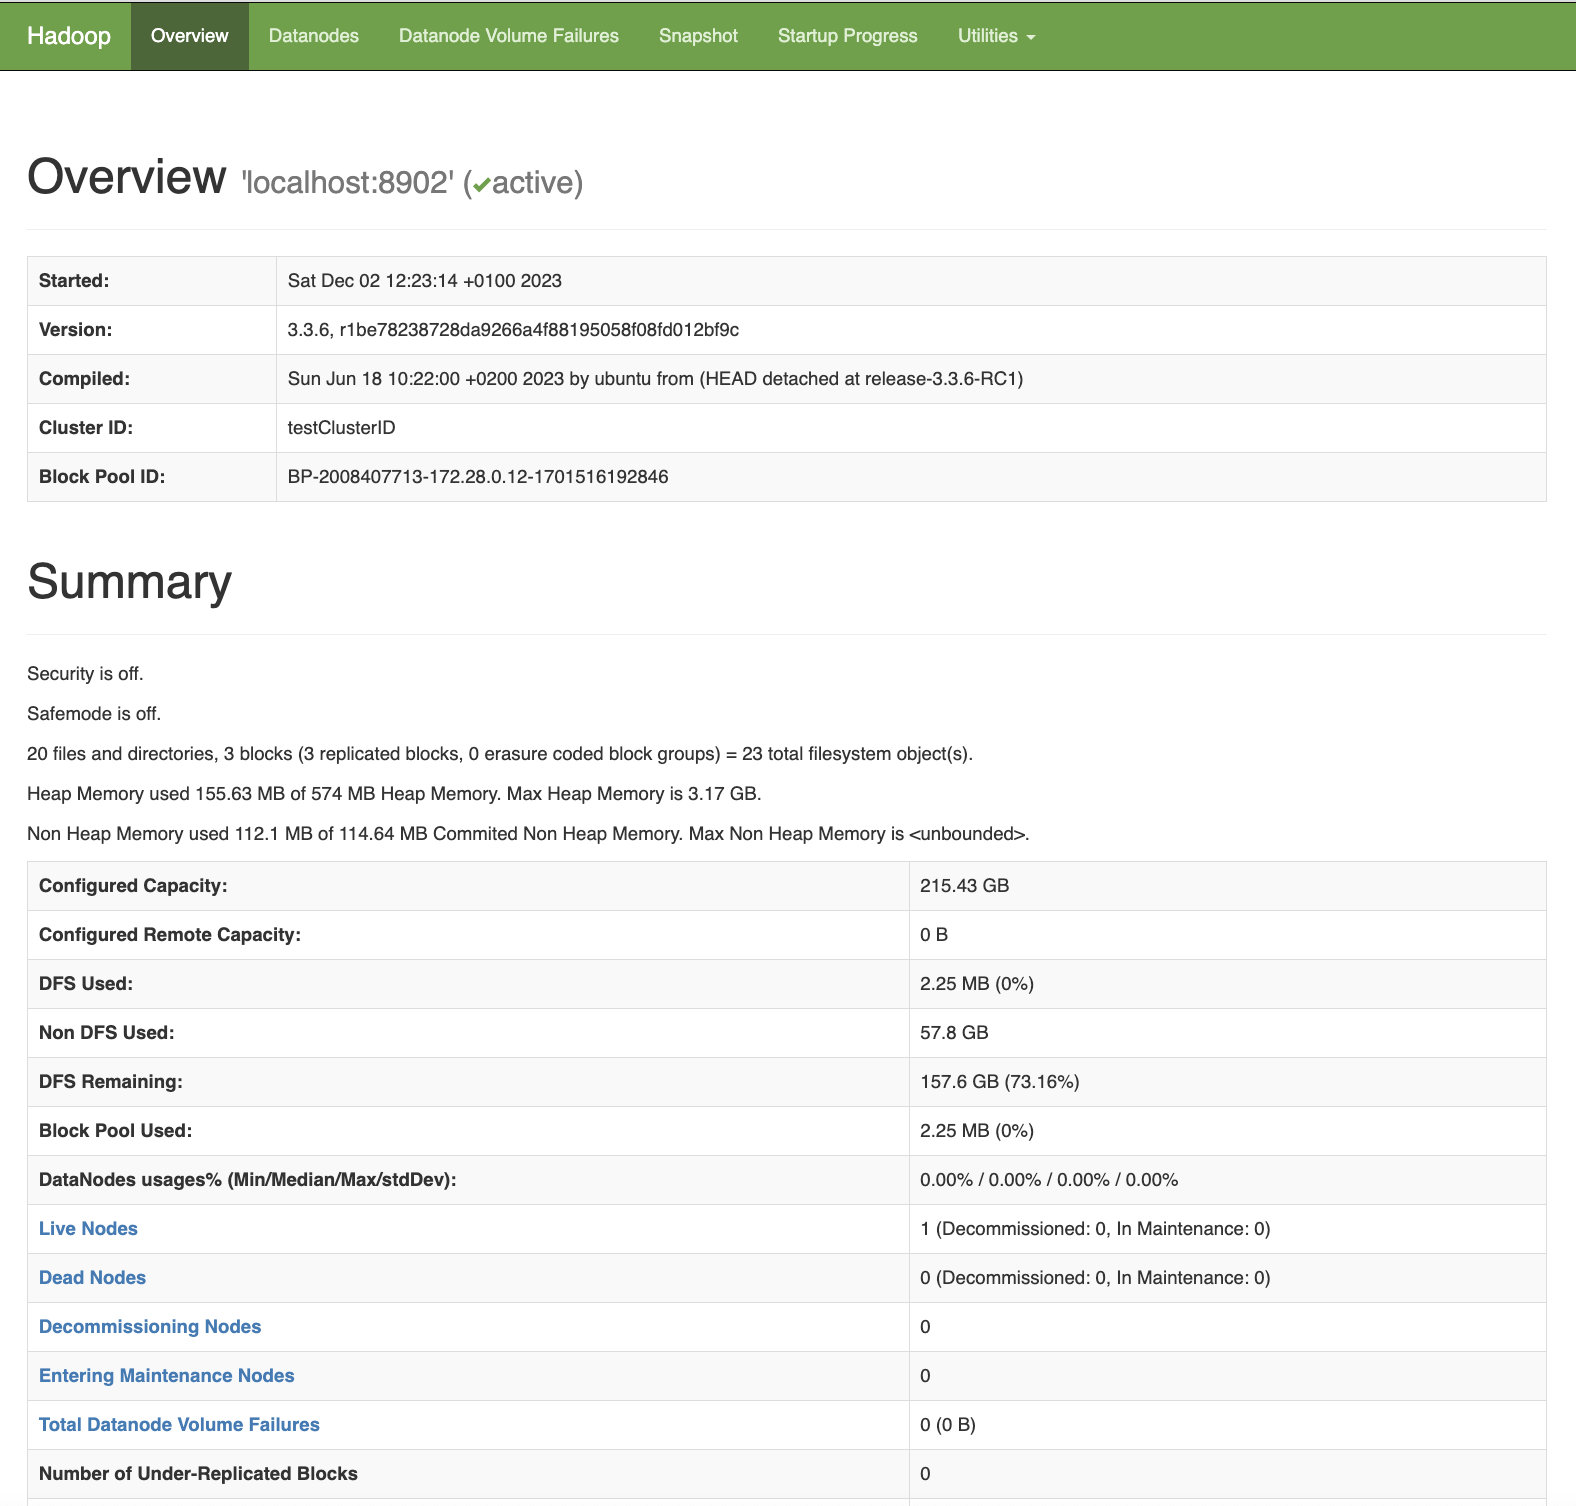

# Test the HDFS filesystem

## Create a directory

**Note:**  in order to use the MiniCluster's Hadoop filesystem you need to specify the full path prepending `hdfs://localhost:8902/` otherwise `hdfs` will write to the local filesystem.

In [39]:
%%bash
# create a folder my_dir
hdfs dfs -mkdir hdfs://localhost:8902/my_dir

List the contents of `my_dir` (should be empty).

In [40]:
!hdfs dfs -ls hdfs://localhost:8902/my_dir

Upload the local folder `sample_data` to `my_dir` on HDFS

In [41]:
!ls -lh sample_data

ls: cannot access 'sample_data': No such file or directory


Check the total size of the local folder `sample_data` using the command `du` ("du" stands for "disk usage" and the `-h` option stands for "human" as it will format file sizes in a “human-readable” fashion, e.g 55M instead of 55508) .

In [42]:
!du -h sample_data

du: cannot access 'sample_data': No such file or directory


Upload `sample_data` to HDFS.

In [43]:
!hdfs dfs -put sample_data hdfs://localhost:8902/my_dir/

put: `sample_data': No such file or directory


Check

In [44]:
!hdfs dfs -ls hdfs://localhost:8902/my_dir

Check the size of `my_dir` on HDFS using the [HDFS equivalent of `du`](https://hadoop.apache.org/docs/stable/hadoop-project-dist/hadoop-common/FileSystemShell.html#du).

In [45]:
!hdfs dfs -du -h hdfs://localhost:8902/my_dir

Check the contents of the HDFS folder `my_dir`

In [46]:
!hdfs dfs -ls -R -h hdfs://localhost:8902/my_dir

You should now see in the Web interface that the "DFS used" has increased (you might need to refresh the NameNode UI Web page):

![dfs_used.png](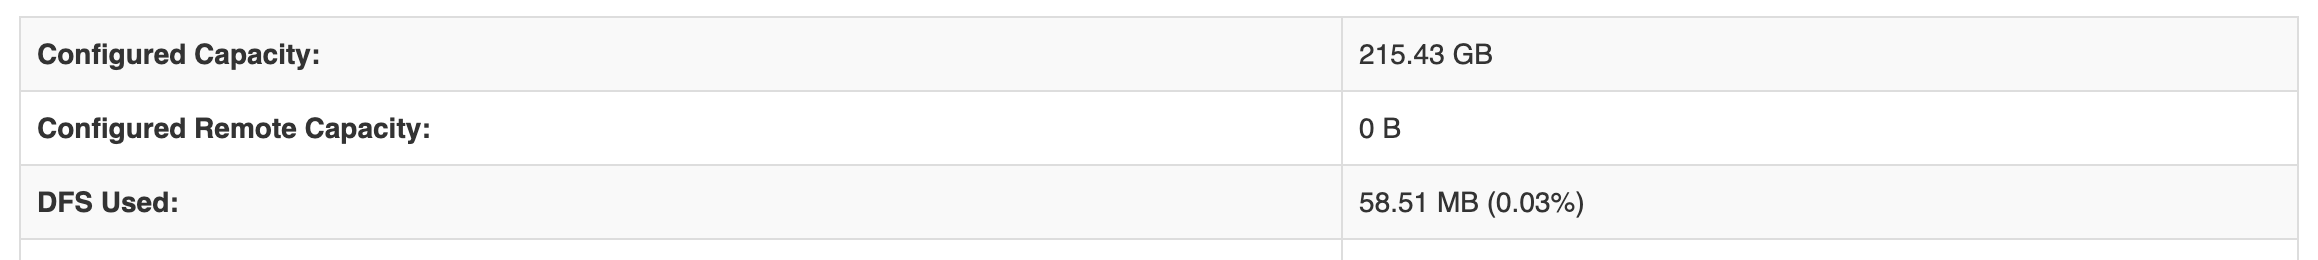
)

Remove the folder `my_dir`

In [47]:
!hdfs dfs -rm -r hdfs://localhost:8902/my_dir

Deleted hdfs://localhost:8902/my_dir


Now the DFS used should be back to ~$4$MB.


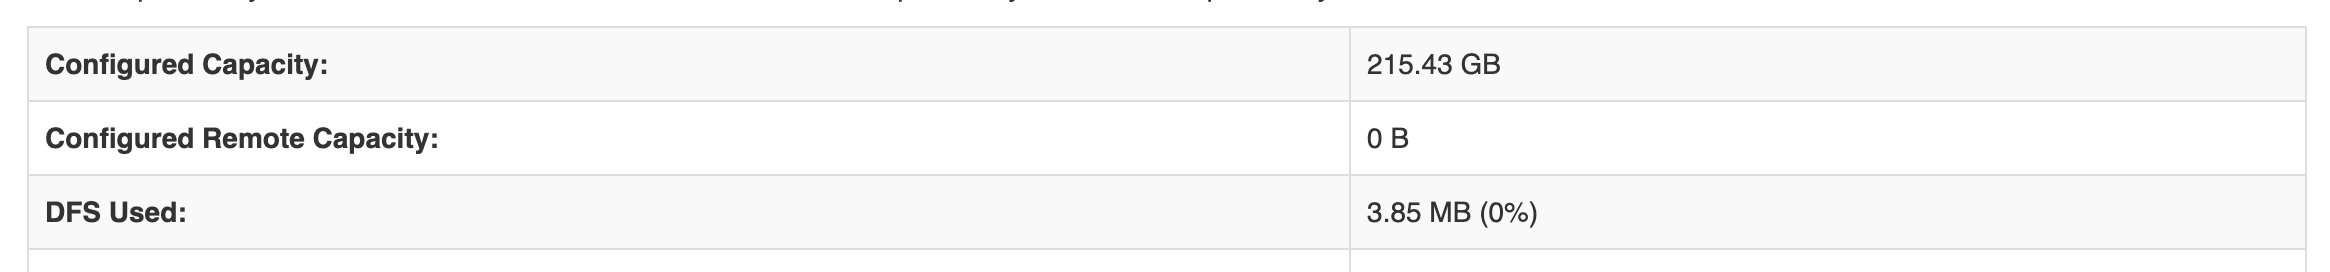


## The default filesystem

By default, `hdfs` will use the local filesystem so you need to prepend `hdfs://...` if you want to use the HDFS filesystem.

If you do not want to use the prefix `hdfs://localhost:8902/` in the filenames, you could set the property `fs.defaultFS` in `core-site.xml` or else use the option `-fs` like this:

    hdfs dfs -fs hdfs://localhost:8902/

In [48]:
!hdfs dfs -fs hdfs://localhost:8902/ -ls /

Found 2 items
drwxrwxrwx   - runner supergroup          0 2024-10-13 09:40 /home
drwxr-xr-x   - runner supergroup          0 2024-10-13 09:40 /user


This is the same as

In [49]:
!hdfs dfs -ls hdfs://localhost:8902/

Found 2 items
drwxrwxrwx   - runner supergroup          0 2024-10-13 09:40 hdfs://localhost:8902/home
drwxr-xr-x   - runner supergroup          0 2024-10-13 09:40 hdfs://localhost:8902/user


And also the same as

In [50]:
!hdfs dfs -D fs.defaultFS=hdfs://localhost:8902/ -ls /

Found 2 items
drwxrwxrwx   - runner supergroup          0 2024-10-13 09:40 /home
drwxr-xr-x   - runner supergroup          0 2024-10-13 09:40 /user


With the option `-D` we can set any variable on the fly (in this case we set `fs.defaultFS` to be the HDFS filesystem).

**Note:** the `-D` option should come before any other option.

If you configure the property `fs.defaultFS` in `core-site.xml`, you can also use `hdfs dfs -ls /`.

In [51]:
with open(os.environ['HADOOP_HOME']+'/etc/hadoop/core-site.xml', 'w') as file:
  file.write("""<configuration>
  <property>
    <name>fs.defaultFS</name>
    <value>hdfs://localhost:8902/</value>
  </property>
</configuration>""")

In [52]:
!cat $HADOOP_HOME/etc/hadoop/core-site.xml

<configuration>
  <property>
    <name>fs.defaultFS</name>
    <value>hdfs://localhost:8902/</value>
  </property>
</configuration>

In [53]:
!hdfs dfs -ls /

Found 2 items
drwxrwxrwx   - runner supergroup          0 2024-10-13 09:40 /home
drwxr-xr-x   - runner supergroup          0 2024-10-13 09:40 /user


Let us set the local filesystem as default (`file:///` means the local filesystem `file://` and the extra slash `/` indicates the root folder).

In [54]:
with open(os.environ['HADOOP_HOME']+'/etc/hadoop/core-site.xml', 'w') as file:
  file.write("""
<configuration>
  <property>
    <name>fs.defaultFS</name>
    <value>file:///</value>
  </property>
</configuration>""")

Now run `!hdfs dfs -ls /` as before. This time we are going to be listing the local filesystem and not the HDFS.

In [55]:
!hdfs dfs -ls /

Found 25 items


drwxr-xr-x   - root root      69632 2024-10-07 16:10 /bin
drwxr-xr-x   - root root       4096 2024-10-02 02:17 /boot
drwxr-xr-x   - root root       4096 2024-10-13 09:35 /data
drwxr-xr-x   - root root       3980 2024-10-13 09:30 /dev
drwxr-xr-x   - root root      12288 2024-10-13 09:30 /etc
drwxr-xr-x   - root root       4096 2024-10-07 16:07 /home
drwxr-xr-x   - root root       4096 2024-10-07 06:58 /imagegeneration
drwxr-xr-x   - root root       4096 2024-10-07 06:25 /lib
drwxr-xr-x   - root root       4096 2024-10-07 05:51 /lib32
drwxr-xr-x   - root root       4096 2024-10-07 06:17 /lib64
drwxr-xr-x   - root root       4096 2024-10-02 02:10 /libx32
drwx------   - root root      16384 2024-10-02 02:14 /lost+found
drwxr-xr-x   - root root       4096 2024-10-02 02:10 /media
drwxr-xr-x   - root root       4096 2024-10-13 09:30 /mnt
drwxrwxrwx   - root root       4096 2024-10-13 09:30 /opt
dr-xr-xr-x   - root root          0 2024-10-13 09:30 /proc
drwx------   - root root       4096 2024

I advise to get used to the fact that Hadoop interprets a file path as HDFS (`hdfs://`) vs. local (`file://`) depending on the setting of the variable `fs.defaultFS`, since this is often a source of confusion.

## Show status of HDFS with `hdfs dfsadmin`

The command `hdfs dfsadmin` allows to run administration tasks on the Hadoop filesystem.

In [56]:
!hdfs dfsadmin -h

h: Unknown command
Usage: hdfs dfsadmin
Note: Administrative commands can only be run as the HDFS superuser.
	[-report [-live] [-dead] [-decommissioning] [-enteringmaintenance] [-inmaintenance] [-slownodes]]
	[-safemode <enter | leave | get | wait | forceExit>]
	[-saveNamespace [-beforeShutdown]]
	[-rollEdits]
	[-restoreFailedStorage true|false|check]
	[-refreshNodes]
	[-setQuota <quota> <dirname>...<dirname>]
	[-clrQuota <dirname>...<dirname>]
	[-setSpaceQuota <quota> [-storageType <storagetype>] <dirname>...<dirname>]
	[-clrSpaceQuota [-storageType <storagetype>] <dirname>...<dirname>]
	[-finalizeUpgrade]
	[-rollingUpgrade [<query|prepare|finalize>]]
	[-upgrade <query | finalize>]
	[-refreshServiceAcl]
	[-refreshUserToGroupsMappings]
	[-refreshSuperUserGroupsConfiguration]
	[-refreshCallQueue]
	[-refresh <host:ipc_port> <key> [arg1..argn]
	[-reconfig <namenode|datanode> <host:ipc_port|livenodes> <start|status|properties>]
	[-printTopology]
	[-refreshNamenodes datanode_host:ipc_port]


The comand `hdfs dfsadmin -report` shows the current status of the Hadoop filesystem. In order to run it on our MiniCluster HDFS we need to pass the option

    -fs hdfs://localhost:8902/


    
Alternatively, we can configure the default filesystem (the URI of the namenode) in `core-site.xml` (see discussion in [The default filesystem)](#scrollTo=The_default_filesystem).

In [57]:
!hdfs dfsadmin -fs hdfs://localhost:8902/ -report

Configured Capacity: 155702509568 (145.01 GB)
Present Capacity: 31647035461 (29.47 GB)
DFS Remaining: 31644712960 (29.47 GB)
DFS Used: 2322501 (2.21 MB)
DFS Used%: 0.01%
Replicated Blocks:
	Under replicated blocks: 0
	Blocks with corrupt replicas: 0
	Missing blocks: 0
	Missing blocks (with replication factor 1): 0
	Low redundancy blocks with highest priority to recover: 0
	Pending deletion blocks: 0
Erasure Coded Block Groups: 
	Low redundancy block groups: 0
	Block groups with corrupt internal blocks: 0
	Missing block groups: 0
	Low redundancy blocks with highest priority to recover: 0
	Pending deletion blocks: 0

-------------------------------------------------


Live datanodes (1):

Name: 127.0.0.1:38697 (localhost)
Hostname: 127.0.0.1
Decommission Status : Normal
Configured Capacity: 155702509568 (145.01 GB)
DFS Used: 2322501 (2.21 MB)
Non DFS Used: 124021919675 (115.50 GB)
DFS Remaining: 31644712960 (29.47 GB)
DFS Used%: 0.00%
DFS Remaining%: 20.32%
Configured Cache Capacity: 0 (0 B)
Cache Used: 0 (0 B)
Cache Remaining: 0 (0 B)
Cache Used%: 100.00%
Cache Remaining%: 0.00%
Xceivers: 0
Last contact: Sun Oct 13 09:40:57 UTC 2024
Last Block Report: Sun Oct 13 09:40:09 UTC 2024
Num of Blocks: 3




The information displayed by `hdfs dfsadmin` corresponds to what is presented in the [NameNode Web UI](#scrollTo=Start_the_NameNode_Web_UI).

# Test MapReduce

Find the MapReduce examples that come with the Hadoop distribution.

## Run the `pi` example

In [58]:
!find . -name "*examples*.jar"

./hadoop-3.4.0/share/hadoop/mapreduce/sources/hadoop-mapreduce-examples-3.4.0-sources.jar
./hadoop-3.4.0/share/hadoop/mapreduce/sources/hadoop-mapreduce-examples-3.4.0-test-sources.jar
./hadoop-3.4.0/share/hadoop/mapreduce/hadoop-mapreduce-examples-3.4.0.jar
./spark-3.5.3-bin-hadoop3/examples/jars/spark-examples_2.12-3.5.3.jar
./spark-3.5.3-bin-hadoop3/work/app-20241013093607-0000/0/spark-examples_2.12-3.5.3.jar
./spark-3.5.3-bin-hadoop3/work/app-20241013093626-0000/0/spark-examples_2.12-3.5.3.jar
./spark-3.5.3-bin-hadoop3/work/app-20241013093635-0001/0/spark-examples_2.12-3.5.3.jar


Check if the cluster is still running, if not you will need to restart it! (from the cell cell [Configure the MiniCluster's ports](#scrollTo=Configure_the_MiniCluster_s_ports)).

In [59]:
!lsof -n -i -P +c0 -sTCP:LISTEN -ac java

COMMAND  PID   USER   FD   TYPE DEVICE SIZE/OFF NODE NAME
java    5129 runner  341u  IPv4  84793      0t0  TCP 127.0.0.1:8901 (LISTEN)
java    5129 runner  354u  IPv4  79164      0t0  TCP 127.0.0.1:8902 (LISTEN)
java    5129 runner  364u  IPv4  87194      0t0  TCP 127.0.0.1:38697 (LISTEN)
java    5129 runner  367u  IPv4  87197      0t0  TCP 127.0.0.1:41527 (LISTEN)
java    5129 runner  420u  IPv4  87216      0t0  TCP 127.0.0.1:38035 (LISTEN)
java    5129 runner  421u  IPv4  87220      0t0  TCP 127.0.0.1:36527 (LISTEN)
java    5129 runner  444u  IPv4  93129      0t0  TCP *:8031 (LISTEN)
java    5129 runner  473u  IPv4  88768      0t0  TCP *:10033 (LISTEN)
java    5129 runner  483u  IPv4  89164      0t0  TCP *:19888 (LISTEN)
java    5129 runner  485u  IPv4  94167      0t0  TCP *:8088 (LISTEN)
java    5129 runner  499u  IPv4  88773      0t0  TCP 127.0.0.1:8900 (LISTEN)
java    5129 runner  509u  IPv4  94174      0t0  TCP *:8033 (LISTEN)
java    5129 runner  529u  IPv4  93134      0t0  TCP

Here's ChatGPT 3.5's poem inspired by
`lsof -n -i -P +c0 -sTCP:LISTEN`:

In [60]:
# @title
from IPython.core.display import HTML
HTML("""
<div style="background-color:rgb(16, 163, 127,.2);border:2px solid rgb(16, 163, 127,.3);padding:3px;">
<svg fill="none" xmlns="http://www.w3.org/2000/svg" viewBox="0 0 320 320"  style="width:32px;height:32px;">
 <g fill="currentColor">
  <path d="m297.06 130.97c7.26-21.79 4.76-45.66-6.85-65.48-17.46-30.4-52.56-46.04-86.84-38.68-15.25-17.18-37.16-26.95-60.13-26.81-35.04-.08-66.13 22.48-76.91 55.82-22.51 4.61-41.94 18.7-53.31 38.67-17.59 30.32-13.58 68.54 9.92 94.54-7.26 21.79-4.76 45.66 6.85 65.48 17.46 30.4 52.56 46.04 86.84 38.68 15.24 17.18 37.16 26.95 60.13 26.8 35.06.09 66.16-22.49 76.94-55.86 22.51-4.61 41.94-18.7 53.31-38.67 17.57-30.32 13.55-68.51-9.94-94.51zm-120.28 168.11c-14.03.02-27.62-4.89-38.39-13.88.49-.26 1.34-.73 1.89-1.07l63.72-36.8c3.26-1.85 5.26-5.32 5.24-9.07v-89.83l26.93 15.55c.29.14.48.42.52.74v74.39c-.04 33.08-26.83 59.9-59.91 59.97zm-128.84-55.03c-7.03-12.14-9.56-26.37-7.15-40.18.47.28 1.3.79 1.89 1.13l63.72 36.8c3.23 1.89 7.23 1.89 10.47 0l77.79-44.92v31.1c.02.32-.13.63-.38.83l-64.41 37.19c-28.69 16.52-65.33 6.7-81.92-21.95zm-16.77-139.09c7-12.16 18.05-21.46 31.21-26.29 0 .55-.03 1.52-.03 2.2v73.61c-.02 3.74 1.98 7.21 5.23 9.06l77.79 44.91-26.93 15.55c-.27.18-.61.21-.91.08l-64.42-37.22c-28.63-16.58-38.45-53.21-21.95-81.89zm221.26 51.49-77.79-44.92 26.93-15.54c.27-.18.61-.21.91-.08l64.42 37.19c28.68 16.57 38.51 53.26 21.94 81.94-7.01 12.14-18.05 21.44-31.2 26.28v-75.81c.03-3.74-1.96-7.2-5.2-9.06zm26.8-40.34c-.47-.29-1.3-.79-1.89-1.13l-63.72-36.8c-3.23-1.89-7.23-1.89-10.47 0l-77.79 44.92v-31.1c-.02-.32.13-.63.38-.83l64.41-37.16c28.69-16.55 65.37-6.7 81.91 22 6.99 12.12 9.52 26.31 7.15 40.1zm-168.51 55.43-26.94-15.55c-.29-.14-.48-.42-.52-.74v-74.39c.02-33.12 26.89-59.96 60.01-59.94 14.01 0 27.57 4.92 38.34 13.88-.49.26-1.33.73-1.89 1.07l-63.72 36.8c-3.26 1.85-5.26 5.31-5.24 9.06l-.04 89.79zm14.63-31.54 34.65-20.01 34.65 20v40.01l-34.65 20-34.65-20z"></path>
  </svg>


<p>
In the realm of <span style="color: #00f;">networks</span>, where processes twine,<br>
A <code>command</code> unfolds, a <em>symphony</em> of lines.<br>
"<strong>Lsof</strong>," it whispers, with a mystic hum,<br>
A dance of flags, each one has its own drum.<br>
<p>
"<code>-n -i -P</code>," the conductor commands,<br>
Navigate swiftly, across distant lands.<br>
"<code>+c0</code>" echoes softly, a chorus of glee,<br>
Embrace all processes, as far as eyes can see.<br>
<p>
"<code>-sTCP:LISTEN</code>," a stanza profound,<br>
Seeking the echoes of ports, a network's sound.<br>
Processes in repose, in a state so keen,<br>
A tapestry of <span style="font-style: italic;">LISTEN</span>, a poetic scene.<br>
</div>
""")

Apart from this poetic digression, I consider `lsof` an exceptionally valuable command.

Use the following command to get the list of available examples in the jar file.

In [61]:
!yarn jar ./hadoop-3.4.0/share/hadoop/mapreduce/hadoop-mapreduce-examples-3.4.0.jar

An example program must be given as the first argument.
Valid program names are:
  aggregatewordcount: An Aggregate based map/reduce program that counts the words in the input files.
  aggregatewordhist: An Aggregate based map/reduce program that computes the histogram of the words in the input files.
  bbp: A map/reduce program that uses Bailey-Borwein-Plouffe to compute exact digits of Pi.
  dbcount: An example job that count the pageview counts from a database.
  distbbp: A map/reduce program that uses a BBP-type formula to compute exact bits of Pi.
  grep: A map/reduce program that counts the matches of a regex in the input.
  join: A job that effects a join over sorted, equally partitioned datasets
  multifilewc: A job that counts words from several files.
  pentomino: A map/reduce tile laying program to find solutions to pentomino problems.
  pi: A map/reduce program that estimates Pi using a quasi-Monte Carlo method.
  randomtextwriter: A map/reduce program that writes 10GB of r

Let us run the `pi` example (here we call it without arguments in order to get a usage message) through `yarn`.

In [62]:
!yarn jar ./hadoop-3.4.0/share/hadoop/mapreduce/hadoop-mapreduce-examples-3.4.0.jar pi

Usage: org.apache.hadoop.examples.QuasiMonteCarlo <nMaps> <nSamples>
Generic options supported are:
-conf <configuration file>        specify an application configuration file
-D <property=value>               define a value for a given property
-fs <file:///|hdfs://namenode:port> specify default filesystem URL to use, overrides 'fs.defaultFS' property from configurations.
-jt <local|resourcemanager:port>  specify a ResourceManager
-files <file1,...>                specify a comma-separated list of files to be copied to the map reduce cluster
-libjars <jar1,...>               specify a comma-separated list of jar files to be included in the classpath
-archives <archive1,...>          specify a comma-separated list of archives to be unarchived on the compute machines

The general command line syntax is:
command [genericOptions] [commandOptions]



The command takes `[genericOptions]` and `[commandOptions]`.

The command options are:

*   `nMaps`, the number of mappers
*   `nSamples`, the number of iterations per mapper


In [63]:
!yarn jar ./hadoop-3.4.0/share/hadoop/mapreduce/hadoop-mapreduce-examples-3.4.0.jar pi \
       5 1000

Number of Maps  = 5
Samples per Map = 1000


Wrote input for Map #0
Wrote input for Map #1
Wrote input for Map #2
Wrote input for Map #3
Wrote input for Map #4
Starting Job


2024-10-13 09:41:03,210 INFO impl.MetricsConfig: Loaded properties from hadoop-metrics2.properties


2024-10-13 09:41:03,291 INFO impl.MetricsSystemImpl: Scheduled Metric snapshot period at 10 second(s).
2024-10-13 09:41:03,291 INFO impl.MetricsSystemImpl: JobTracker metrics system started


2024-10-13 09:41:03,367 INFO input.FileInputFormat: Total input files to process : 5
2024-10-13 09:41:03,374 INFO mapreduce.JobSubmitter: number of splits:5


2024-10-13 09:41:03,719 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_local94321816_0001
2024-10-13 09:41:03,719 INFO mapreduce.JobSubmitter: Executing with tokens: []


2024-10-13 09:41:03,841 INFO mapreduce.Job: The url to track the job: http://localhost:8080/
2024-10-13 09:41:03,841 INFO mapreduce.Job: Running job: job_local94321816_0001
2024-10-13 09:41:03,847 INFO mapred.LocalJobRunner: OutputCommitter set in config null
2024-10-13 09:41:03,854 INFO output.PathOutputCommitterFactory: No output committer factory defined, defaulting to FileOutputCommitterFactory
2024-10-13 09:41:03,855 INFO output.FileOutputCommitter: File Output Committer Algorithm version is 2
2024-10-13 09:41:03,855 INFO output.FileOutputCommitter: FileOutputCommitter skip cleanup _temporary folders under output directory:false, ignore cleanup failures: false


2024-10-13 09:41:03,857 INFO mapred.LocalJobRunner: OutputCommitter is org.apache.hadoop.mapreduce.lib.output.FileOutputCommitter
2024-10-13 09:41:03,905 INFO mapred.LocalJobRunner: Waiting for map tasks
2024-10-13 09:41:03,906 INFO mapred.LocalJobRunner: Starting task: attempt_local94321816_0001_m_000000_0


2024-10-13 09:41:03,925 INFO output.PathOutputCommitterFactory: No output committer factory defined, defaulting to FileOutputCommitterFactory
2024-10-13 09:41:03,926 INFO output.FileOutputCommitter: File Output Committer Algorithm version is 2
2024-10-13 09:41:03,926 INFO output.FileOutputCommitter: FileOutputCommitter skip cleanup _temporary folders under output directory:false, ignore cleanup failures: false
2024-10-13 09:41:03,940 INFO mapred.Task:  Using ResourceCalculatorProcessTree : [ ]
2024-10-13 09:41:03,943 INFO mapred.MapTask: Processing split: file:/home/runner/work/big_data/big_data/QuasiMonteCarlo_1728812462737_605532646/in/part1:0+118


2024-10-13 09:41:03,962 INFO mapred.MapTask: (EQUATOR) 0 kvi 26214396(104857584)
2024-10-13 09:41:03,962 INFO mapred.MapTask: mapreduce.task.io.sort.mb: 100
2024-10-13 09:41:03,962 INFO mapred.MapTask: soft limit at 83886080
2024-10-13 09:41:03,962 INFO mapred.MapTask: bufstart = 0; bufvoid = 104857600
2024-10-13 09:41:03,962 INFO mapred.MapTask: kvstart = 26214396; length = 6553600
2024-10-13 09:41:03,965 INFO mapred.MapTask: Map output collector class = org.apache.hadoop.mapred.MapTask$MapOutputBuffer
2024-10-13 09:41:03,976 INFO mapred.LocalJobRunner: 
2024-10-13 09:41:03,976 INFO mapred.MapTask: Starting flush of map output
2024-10-13 09:41:03,976 INFO mapred.MapTask: Spilling map output
2024-10-13 09:41:03,976 INFO mapred.MapTask: bufstart = 0; bufend = 18; bufvoid = 104857600
2024-10-13 09:41:03,976 INFO mapred.MapTask: kvstart = 26214396(104857584); kvend = 26214392(104857568); length = 5/6553600
2024-10-13 09:41:03,981 INFO mapred.MapTask: Finished spill 0
2024-10-13 09:41:03,9

2024-10-13 09:41:04,009 INFO mapred.MapTask: soft limit at 83886080
2024-10-13 09:41:04,009 INFO mapred.MapTask: bufstart = 0; bufvoid = 104857600
2024-10-13 09:41:04,009 INFO mapred.MapTask: kvstart = 26214396; length = 6553600
2024-10-13 09:41:04,010 INFO mapred.MapTask: Map output collector class = org.apache.hadoop.mapred.MapTask$MapOutputBuffer
2024-10-13 09:41:04,011 INFO mapred.LocalJobRunner: 
2024-10-13 09:41:04,012 INFO mapred.MapTask: Starting flush of map output
2024-10-13 09:41:04,012 INFO mapred.MapTask: Spilling map output
2024-10-13 09:41:04,012 INFO mapred.MapTask: bufstart = 0; bufend = 18; bufvoid = 104857600
2024-10-13 09:41:04,012 INFO mapred.MapTask: kvstart = 26214396(104857584); kvend = 26214392(104857568); length = 5/6553600
2024-10-13 09:41:04,013 INFO mapred.MapTask: Finished spill 0
2024-10-13 09:41:04,015 INFO mapred.Task: Task:attempt_local94321816_0001_m_000001_0 is done. And is in the process of committing
2024-10-13 09:41:04,017 INFO mapred.LocalJobRunn

2024-10-13 09:41:04,061 INFO mapred.Task: Task:attempt_local94321816_0001_m_000003_0 is done. And is in the process of committing
2024-10-13 09:41:04,063 INFO mapred.LocalJobRunner: Generated 1000 samples.
2024-10-13 09:41:04,064 INFO mapred.Task: Task 'attempt_local94321816_0001_m_000003_0' done.
2024-10-13 09:41:04,064 INFO mapred.Task: Final Counters for attempt_local94321816_0001_m_000003_0: Counters: 17
	File System Counters
		FILE: Number of bytes read=285395
		FILE: Number of bytes written=994526
		FILE: Number of read operations=0
		FILE: Number of large read operations=0
		FILE: Number of write operations=0
	Map-Reduce Framework
		Map input records=1
		Map output records=2
		Map output bytes=18
		Map output materialized bytes=28
		Input split bytes=154
		Combine input records=0
		Spilled Records=2
		Failed Shuffles=0
		Merged Map outputs=0
		GC time elapsed (ms)=0
		Total committed heap usage (bytes)=314572800
	File Input Format Counters 
		Bytes Read=130
2024-10-13 09:41:04,0

2024-10-13 09:41:04,113 INFO reduce.MergeManagerImpl: MergerManager: memoryLimit=2933076736, maxSingleShuffleLimit=733269184, mergeThreshold=1935830784, ioSortFactor=10, memToMemMergeOutputsThreshold=10
2024-10-13 09:41:04,115 INFO reduce.EventFetcher: attempt_local94321816_0001_r_000000_0 Thread started: EventFetcher for fetching Map Completion Events
2024-10-13 09:41:04,137 INFO reduce.LocalFetcher: localfetcher#1 about to shuffle output of map attempt_local94321816_0001_m_000004_0 decomp: 24 len: 28 to MEMORY
2024-10-13 09:41:04,139 INFO reduce.InMemoryMapOutput: Read 24 bytes from map-output for attempt_local94321816_0001_m_000004_0
2024-10-13 09:41:04,139 INFO reduce.MergeManagerImpl: closeInMemoryFile -> map-output of size: 24, inMemoryMapOutputs.size() -> 1, commitMemory -> 0, usedMemory ->24
2024-10-13 09:41:04,142 INFO reduce.LocalFetcher: localfetcher#1 about to shuffle output of map attempt_local94321816_0001_m_000000_0 decomp: 24 len: 28 to MEMORY
2024-10-13 09:41:04,143 IN

2024-10-13 09:41:04,166 INFO mapred.Task: Task:attempt_local94321816_0001_r_000000_0 is done. And is in the process of committing
2024-10-13 09:41:04,167 INFO mapred.LocalJobRunner: 5 / 5 copied.
2024-10-13 09:41:04,167 INFO mapred.Task: Task attempt_local94321816_0001_r_000000_0 is allowed to commit now
2024-10-13 09:41:04,168 INFO output.FileOutputCommitter: Saved output of task 'attempt_local94321816_0001_r_000000_0' to file:/home/runner/work/big_data/big_data/QuasiMonteCarlo_1728812462737_605532646/out
2024-10-13 09:41:04,169 INFO mapred.LocalJobRunner: reduce > reduce
2024-10-13 09:41:04,169 INFO mapred.Task: Task 'attempt_local94321816_0001_r_000000_0' done.
2024-10-13 09:41:04,170 INFO mapred.Task: Final Counters for attempt_local94321816_0001_r_000000_0: Counters: 24
	File System Counters
		FILE: Number of bytes read=286222
		FILE: Number of bytes written=994941
		FILE: Number of read operations=0
		FILE: Number of large read operations=0
		FILE: Number of write operations=0
	M

2024-10-13 09:41:04,845 INFO mapreduce.Job: Job job_local94321816_0001 running in uber mode : false
2024-10-13 09:41:04,846 INFO mapreduce.Job:  map 100% reduce 100%
2024-10-13 09:41:04,847 INFO mapreduce.Job: Job job_local94321816_0001 completed successfully
2024-10-13 09:41:04,855 INFO mapreduce.Job: Counters: 30
	File System Counters
		FILE: Number of bytes read=1708070
		FILE: Number of bytes written=5967271
		FILE: Number of read operations=0
		FILE: Number of large read operations=0
		FILE: Number of write operations=0
	Map-Reduce Framework
		Map input records=5
		Map output records=10
		Map output bytes=90
		Map output materialized bytes=140
		Input split bytes=770
		Combine input records=0
		Combine output records=0
		Reduce input groups=2
		Reduce shuffle bytes=140
		Reduce input records=10
		Reduce output records=0
		Spilled Records=20
		Shuffled Maps =5
		Failed Shuffles=0
		Merged Map outputs=5
		GC time elapsed (ms)=16
		Total committed heap usage (bytes)=1887436800
	Shuff

The job completed successfully, however it did not run on the MiniCluster because we did not specify the MiniCluster's Yarn Resource Manager address.


In fact, `yarn application -list` returns no apps (neither running nor finished).


In [64]:
!yarn application -D yarn.resourcemanager.address=localhost:8903 -list -appStates ALL

2024-10-13 09:41:05,813 INFO client.DefaultNoHARMFailoverProxyProvider: Connecting to ResourceManager at localhost/127.0.0.1:8903


Total number of applications (application-types: [], states: [NEW, NEW_SAVING, SUBMITTED, ACCEPTED, RUNNING, FINISHED, FAILED, KILLED] and tags: []):0
                Application-Id	    Application-Name	    Application-Type	      User	     Queue	             State	       Final-State	       Progress	                       Tracking-URL


## Local configuration files

In order to be able to submit the job to the MiniCluster with YARN we need to edit three files:


*   `mapred-site.xml`
*   `core-site.xml`
*   `yarn-site.xml`

(see  https://hadoop.apache.org/docs/current/hadoop-project-dist/hadoop-common/SingleCluster.html#YARN_on_a_Single_Node)


In [65]:
file_mapred_site = os.path.join(os.environ['HADOOP_HOME'],'etc/hadoop/mapred-site.xml')
file_core_site = os.path.join(os.environ['HADOOP_HOME'],'etc/hadoop/core-site.xml')
file_yarn_site = os.path.join(os.environ['HADOOP_HOME'],'etc/hadoop/yarn-site.xml')

In [66]:
%%bash
cat > $HADOOP_HOME/'etc/hadoop/mapred-site.xml' << 🐸
<configuration>
    <property>
        <name>mapreduce.framework.name</name>
        <value>yarn</value>
    </property>
    <property>
        <name>mapreduce.application.classpath</name>
        <value>${HADOOP_HOME}/share/hadoop/mapreduce/*:${HADOOP_HOME}/share/hadoop/mapreduce/lib/*</value>
    </property>
</configuration>
🐸

In [67]:
!cat $HADOOP_HOME/'etc/hadoop/mapred-site.xml'

<configuration>
    <property>
        <name>mapreduce.framework.name</name>
        <value>yarn</value>
    </property>
    <property>
        <name>mapreduce.application.classpath</name>
        <value>/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/mapreduce/*:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/mapreduce/lib/*</value>
    </property>
</configuration>


Set the default filesystem as the MiniCluster's filesystem in `core-site.xml`. This is necessary in order to allow YARN to save the applications logs to HDFS and this is why we create the directory `/tmp/logs` on HDFS.

In [68]:
with open(file_core_site, 'w') as file:
  file.write("""
<configuration>
  <property>
    <name>fs.defaultFS</name>
    <value>hdfs://localhost:8902/</value>
  </property>
</configuration>""")

Set `yarn.resourcemanager.address=localhost:8903` in `yarn-site.xml`.

In [69]:
with open(file_yarn_site, 'w') as file:
 file.write("""
<configuration>
<property>
    <name>yarn.resourcemanager.address</name>
    <value>localhost:8903</value>
</property>
<property>
    <name>yarn.log-aggregation-enable</name>
    <value>true</value>
</property>
</configuration>""")


It might be necessary at this point to re-start the cluster.

In [70]:
process.kill()
!pkill -f java # kill java processes

In [71]:
with open('out.txt', "w") as stdout_file, open('err.txt', "w") as stderr_file:
    process = subprocess.Popen(
        ["mapred", "minicluster", "-format", "-jhsport", "8900", "-nnhttpport", "8901", "-nnport", "8902", "-rmport", "8903"],
        stdout=stdout_file,
        stderr=stderr_file
    )

Verify that the MiniCluster is running.

In [72]:
for att in range(10):
    with open('err.txt') as myfile:
         if 'Started MiniMRCluster' in myfile.read():
             print('MiniCluster is up and running')
             break
         else:
             time.sleep(2)


MiniCluster is up and running


In [73]:
!lsof -n -i -P +c0 -sTCP:LISTEN -ac java

COMMAND  PID   USER   FD   TYPE DEVICE SIZE/OFF NODE NAME
java    6559 runner  341u  IPv4 101970      0t0  TCP 127.0.0.1:8901 (LISTEN)
java    6559 runner  354u  IPv4 101973      0t0  TCP 127.0.0.1:8902 (LISTEN)
java    6559 runner  364u  IPv4 104606      0t0  TCP 127.0.0.1:33677 (LISTEN)
java    6559 runner  367u  IPv4 104609      0t0  TCP 127.0.0.1:45041 (LISTEN)
java    6559 runner  420u  IPv4 102010      0t0  TCP 127.0.0.1:41225 (LISTEN)
java    6559 runner  421u  IPv4 103905      0t0  TCP 127.0.0.1:45413 (LISTEN)
java    6559 runner  447u  IPv4 111667      0t0  TCP *:8031 (LISTEN)
java    6559 runner  473u  IPv4 111655      0t0  TCP *:10033 (LISTEN)
java    6559 runner  483u  IPv4 104642      0t0  TCP *:19888 (LISTEN)
java    6559 runner  485u  IPv4 111660      0t0  TCP *:8088 (LISTEN)
java    6559 runner  499u  IPv4 113063      0t0  TCP 127.0.0.1:8900 (LISTEN)
java    6559 runner  509u  IPv4 104649      0t0  TCP *:8033 (LISTEN)
java    6559 runner  529u  IPv4 104652      0t0  TCP

Submit the app again. You should see at the very beginning of the output:

```
Connecting to ResourceManager at localhost/127.0.0.1:8903
```

This means that YARN has read its configuration file.

## Run the `pi` app on the MiniCluster with YARN

Let us run the job on the MiniCluster. 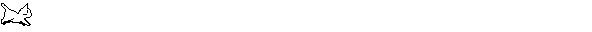



In [74]:
!yarn jar ./hadoop-3.4.0/share/hadoop/mapreduce/hadoop-mapreduce-examples-3.4.0.jar pi \
       5 1000

Number of Maps  = 5
Samples per Map = 1000


Wrote input for Map #0


Wrote input for Map #1


Wrote input for Map #2


Wrote input for Map #3
Wrote input for Map #4
Starting Job


2024-10-13 09:41:17,110 INFO client.DefaultNoHARMFailoverProxyProvider: Connecting to ResourceManager at localhost/127.0.0.1:8903


2024-10-13 09:41:17,317 INFO mapreduce.JobResourceUploader: Disabling Erasure Coding for path: /tmp/hadoop-yarn/staging/runner/.staging/job_1728812472654_0001


2024-10-13 09:41:17,828 INFO input.FileInputFormat: Total input files to process : 5


2024-10-13 09:41:17,859 INFO mapreduce.JobSubmitter: number of splits:5


2024-10-13 09:41:18,033 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_1728812472654_0001
2024-10-13 09:41:18,033 INFO mapreduce.JobSubmitter: Executing with tokens: []


2024-10-13 09:41:18,165 INFO conf.Configuration: resource-types.xml not found
2024-10-13 09:41:18,165 INFO resource.ResourceUtils: Unable to find 'resource-types.xml'.


2024-10-13 09:41:18,568 INFO impl.YarnClientImpl: Submitted application application_1728812472654_0001
2024-10-13 09:41:18,589 INFO mapreduce.Job: The url to track the job: http://fv-az837-567:8088/proxy/application_1728812472654_0001/
2024-10-13 09:41:18,590 INFO mapreduce.Job: Running job: job_1728812472654_0001


2024-10-13 09:41:24,684 INFO mapreduce.Job: Job job_1728812472654_0001 running in uber mode : false
2024-10-13 09:41:24,685 INFO mapreduce.Job:  map 0% reduce 0%


2024-10-13 09:41:30,776 INFO mapreduce.Job:  map 40% reduce 0%


2024-10-13 09:41:33,798 INFO mapreduce.Job:  map 60% reduce 0%


2024-10-13 09:41:34,808 INFO mapreduce.Job:  map 80% reduce 0%


2024-10-13 09:41:36,829 INFO mapreduce.Job:  map 100% reduce 0%


2024-10-13 09:41:39,843 INFO mapreduce.Job:  map 100% reduce 100%
2024-10-13 09:41:39,849 INFO mapreduce.Job: Job job_1728812472654_0001 completed successfully


2024-10-13 09:41:39,910 INFO mapreduce.Job: Counters: 54
	File System Counters
		FILE: Number of bytes read=116
		FILE: Number of bytes written=1858029
		FILE: Number of read operations=0
		FILE: Number of large read operations=0
		FILE: Number of write operations=0
		HDFS: Number of bytes read=1325
		HDFS: Number of bytes written=215
		HDFS: Number of read operations=25
		HDFS: Number of large read operations=0
		HDFS: Number of write operations=3
		HDFS: Number of bytes read erasure-coded=0
	Job Counters 
		Launched map tasks=5
		Launched reduce tasks=1
		Data-local map tasks=5
		Total time spent by all maps in occupied slots (ms)=15744
		Total time spent by all reduces in occupied slots (ms)=2703
		Total time spent by all map tasks (ms)=15744
		Total time spent by all reduce tasks (ms)=2703
		Total vcore-milliseconds taken by all map tasks=15744
		Total vcore-milliseconds taken by all reduce tasks=2703
		Total megabyte-milliseconds taken by all map tasks=16121856
		Total megabyte-mi

Estimated value of Pi is 3.14160000000000000000


We can now see the finished app listed in the YARN resource manager (note that this time we do not need to specify the Resource Manager's address with the option `-D yarn.resourcemanager.address=localhost:8903`).

In [75]:
!yarn application -list -appStates ALL

2024-10-13 09:41:41,260 INFO client.DefaultNoHARMFailoverProxyProvider: Connecting to ResourceManager at localhost/127.0.0.1:8903


Total number of applications (application-types: [], states: [NEW, NEW_SAVING, SUBMITTED, ACCEPTED, RUNNING, FINISHED, FAILED, KILLED] and tags: []):1
                Application-Id	    Application-Name	    Application-Type	      User	     Queue	             State	       Final-State	       Progress	                       Tracking-URL
application_1728812472654_0001	     QuasiMonteCarlo	           MAPREDUCE	    runner	root.default	          FINISHED	         SUCCEEDED	           100%	http://fv-az837-567.ymagj3ilz1se1nskuisabcixse.ex.internal.cloudapp.net:19888/jobhistory/job/job_1728812472654_0001


## Run the `pi` app in the background

Let us run the `pi` app in the background (as a subprocess) and with more mappers, so that it lasts longer and we are able to monitor its progress with the `yarn` command-line.

In [76]:
with open('job_out.txt', "w") as stdout_file, open('job_err.txt', "w") as stderr_file:
    process = subprocess.Popen(
        ["yarn", "jar", "./hadoop-3.4.0/share/hadoop/mapreduce/hadoop-mapreduce-examples-3.4.0.jar", "pi",
         "-D", "localhost:8903",
         "50", "1000000"],
        stdout=stdout_file,
        stderr=stderr_file
    )

In [77]:
time.sleep(10)

In [78]:
!yarn application -list -appStates ALL

2024-10-13 09:41:53,107 INFO client.DefaultNoHARMFailoverProxyProvider: Connecting to ResourceManager at localhost/127.0.0.1:8903


Total number of applications (application-types: [], states: [NEW, NEW_SAVING, SUBMITTED, ACCEPTED, RUNNING, FINISHED, FAILED, KILLED] and tags: []):2
                Application-Id	    Application-Name	    Application-Type	      User	     Queue	             State	       Final-State	       Progress	                       Tracking-URL
application_1728812472654_0002	     QuasiMonteCarlo	           MAPREDUCE	    runner	root.default	           RUNNING	         UNDEFINED	             0%	             http://localhost:45305
application_1728812472654_0001	     QuasiMonteCarlo	           MAPREDUCE	    runner	root.default	          FINISHED	         SUCCEEDED	           100%	http://fv-az837-567.ymagj3ilz1se1nskuisabcixse.ex.internal.cloudapp.net:19888/jobhistory/job/job_1728812472654_0001


If you do not see the newly submitted application in the YARN queue yet, give it some time and re-run the `yarn application -list` command! 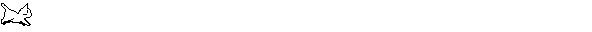



In [79]:
!yarn application -list -appStates ALL

2024-10-13 09:41:54,513 INFO client.DefaultNoHARMFailoverProxyProvider: Connecting to ResourceManager at localhost/127.0.0.1:8903


Total number of applications (application-types: [], states: [NEW, NEW_SAVING, SUBMITTED, ACCEPTED, RUNNING, FINISHED, FAILED, KILLED] and tags: []):2
                Application-Id	    Application-Name	    Application-Type	      User	     Queue	             State	       Final-State	       Progress	                       Tracking-URL
application_1728812472654_0002	     QuasiMonteCarlo	           MAPREDUCE	    runner	root.default	           RUNNING	         UNDEFINED	             5%	             http://localhost:45305
application_1728812472654_0001	     QuasiMonteCarlo	           MAPREDUCE	    runner	root.default	          FINISHED	         SUCCEEDED	           100%	http://fv-az837-567.ymagj3ilz1se1nskuisabcixse.ex.internal.cloudapp.net:19888/jobhistory/job/job_1728812472654_0001


You should now see something like this:
```
Total number of applications (application-types: [], states: [NEW, NEW_SAVING, SUBMITTED, ACCEPTED, RUNNING, FINISHED, FAILED, KILLED] and tags: []):2
                Application-Id	    Application-Name	    Application-Type	      User	     Queue	             State	       Final-State	       Progress	                       Tracking-URL
application_1707941943926_0001	     QuasiMonteCarlo	           MAPREDUCE	      root	   default	          FINISHED	         SUCCEEDED	           100%	http://c532258dcee8:19888/jobhistory/job/job_1707941943926_0001
application_1707941943926_0002	     QuasiMonteCarlo	           MAPREDUCE	      root	   default	           RUNNING	         UNDEFINED	          5.18%	             http://localhost:43121
```

The application in status `RUNNING` is the most recently submitted.

# View the logs of an application

To view the logs of a finished application use:

```
yarn logs -applicationID <your app ID>
```

For the sake of this demo, we are going to pick the id if the first successfully finished app with the following shell command:

In [80]:
!yarn application -list -appStates FINISHED 2>/dev/null|grep SUCCEEDED|tail -1| cut -f1

application_1728812472654_0001


View the logs for the selected application id (warning: it's a large file!).

In [81]:
%%bash
app_id=$(yarn application -list -appStates FINISHED 2>/dev/null|grep SUCCEEDED|tail -1| cut -f1)
yarn logs -applicationId $app_id

2024-10-13 09:42:01,262 INFO client.DefaultNoHARMFailoverProxyProvider: Connecting to ResourceManager at localhost/127.0.0.1:8903


Container: container_1728812472654_0001_01_000004 on localhost_37587


LogAggregationType: AGGREGATED


LogType:directory.info


LogLastModifiedTime:Sun Oct 13 09:41:46 +0000 2024


LogLength:2187


LogContents:


ls -l:


total 36


-rw-r--r-- 1 runner docker  129 Oct 13 09:41 container_tokens


-rwx------ 1 runner docker 1074 Oct 13 09:41 default_container_executor_session.sh


-rwx------ 1 runner docker 1129 Oct 13 09:41 default_container_executor.sh


lrwxrwxrwx 1 runner docker  208 Oct 13 09:41 job.jar -> /home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_0/usercache/runner/appcache/application_1728812472654_0001/filecache/11/job.jar


lrwxrwxrwx 1 runner docker  208 Oct 13 09:41 job.xml -> /home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_2/usercache/runner/appcache/application_1728812472654_0001/filecache/13/job.xml


-rwx------ 1 runner docker 9490 Oct 13 09:41 launch_container.sh


drwx--x--- 2 runner docker 4096 Oct 13 09:41 tmp


find -L . -maxdepth 5 -ls:


   854789      4 drwx--x---   3 runner   docker       4096 Oct 13 09:41 .


   837440      4 -rwx------   1 runner   docker       1074 Oct 13 09:41 ./default_container_executor_session.sh


   837433      4 -rw-r--r--   1 runner   docker         12 Oct 13 09:41 ./.container_tokens.crc


   837393    260 -r-x------   1 runner   docker     264422 Oct 13 09:41 ./job.xml


   837441      4 -rw-r--r--   1 runner   docker         20 Oct 13 09:41 ./.default_container_executor_session.sh.crc


   854795      4 drwx--x---   2 runner   docker       4096 Oct 13 09:41 ./tmp


   840444      4 drwx------   2 runner   docker       4096 Oct 13 09:41 ./job.jar


   837390    276 -r-x------   1 runner   docker     281609 Oct 13 09:41 ./job.jar/job.jar


   837442      4 -rwx------   1 runner   docker       1129 Oct 13 09:41 ./default_container_executor.sh


   837438     12 -rwx------   1 runner   docker       9490 Oct 13 09:41 ./launch_container.sh


   837443      4 -rw-r--r--   1 runner   docker         20 Oct 13 09:41 ./.default_container_executor.sh.crc


   837439      4 -rw-r--r--   1 runner   docker         84 Oct 13 09:41 ./.launch_container.sh.crc


   837432      4 -rw-r--r--   1 runner   docker        129 Oct 13 09:41 ./container_tokens


broken symlinks(find -L . -maxdepth 5 -type l -ls):


End of LogType:directory.info


*******************************************************************************


Container: container_1728812472654_0001_01_000004 on localhost_37587


LogAggregationType: AGGREGATED


LogType:launch_container.sh


LogLastModifiedTime:Sun Oct 13 09:41:46 +0000 2024


LogLength:9490


LogContents:


#!/bin/bash


set -o pipefail -e


export PRELAUNCH_OUT="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_1/application_1728812472654_0001/container_1728812472654_0001_01_000004/prelaunch.out"


exec >"${PRELAUNCH_OUT}"


export PRELAUNCH_ERR="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_1/application_1728812472654_0001/container_1728812472654_0001_01_000004/prelaunch.err"


exec 2>"${PRELAUNCH_ERR}"


echo "Setting up env variables"


export JAVA_HOME=${JAVA_HOME:-"/usr/lib/jvm/temurin-11-jdk-amd64"}


export HADOOP_COMMON_HOME=${HADOOP_COMMON_HOME:-"/home/runner/work/big_data/big_data/hadoop-3.4.0"}


export HADOOP_HDFS_HOME=${HADOOP_HDFS_HOME:-"/home/runner/work/big_data/big_data/hadoop-3.4.0"}


export HADOOP_CONF_DIR=${HADOOP_CONF_DIR:-"/home/runner/work/big_data/big_data/hadoop-3.4.0/etc/hadoop"}


export HADOOP_YARN_HOME=${HADOOP_YARN_HOME:-"/home/runner/work/big_data/big_data/hadoop-3.4.0"}


export HADOOP_HOME=${HADOOP_HOME:-"/home/runner/work/big_data/big_data/hadoop-3.4.0"}


export PATH=${PATH:-"/home/runner/work/big_data/big_data/hadoop-3.4.0/bin:/opt/hostedtoolcache/Java_Temurin-Hotspot_jdk/11.0.24-8/x64/bin:/opt/hostedtoolcache/Python/3.8.18/x64/bin:/opt/hostedtoolcache/Python/3.8.18/x64:/snap/bin:/home/runner/.local/bin:/opt/pipx_bin:/home/runner/.cargo/bin:/home/runner/.config/composer/vendor/bin:/usr/local/.ghcup/bin:/home/runner/.dotnet/tools:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin"}


export LANG=${LANG:-"en_US.UTF-8"}


export HADOOP_TOKEN_FILE_LOCATION="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_2/usercache/runner/appcache/application_1728812472654_0001/container_1728812472654_0001_01_000004/container_tokens"


export CONTAINER_ID="container_1728812472654_0001_01_000004"


export NM_PORT="37587"


export NM_HOST="localhost"


export NM_HTTP_PORT="43433"


export LOCAL_DIRS="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_0/usercache/runner/appcache/application_1728812472654_0001,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_1/usercache/runner/appcache/application_1728812472654_0001,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_2/usercache/runner/appcache/application_1728812472654_0001,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_3/usercache/runner/appcache/application_1728812472654_0001"


export LOCAL_USER_DIRS="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_0/usercache/runner/,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_1/usercache/runner/,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_2/usercache/runner/,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_3/usercache/runner/"


export LOG_DIRS="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_0/application_1728812472654_0001/container_1728812472654_0001_01_000004,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_1/application_1728812472654_0001/container_1728812472654_0001_01_000004,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_2/application_1728812472654_0001/container_1728812472654_0001_01_000004,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_3/application_1728812472654_0001/container_1728812472654_0001_01_000004"


export USER="runner"


export LOGNAME="runner"


export HOME="/home/"


export PWD="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_2/usercache/runner/appcache/application_1728812472654_0001/container_1728812472654_0001_01_000004"


export LOCALIZATION_COUNTERS="0,548107,0,2,1"


export JVM_PID="$$"


export NM_AUX_SERVICE_mapreduce_shuffle="AACl0QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA="


export STDOUT_LOGFILE_ENV="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_1/application_1728812472654_0001/container_1728812472654_0001_01_000004/stdout"


export SHELL="/bin/bash"


export HADOOP_ROOT_LOGGER="INFO,console"


export CLASSPATH="$PWD:$HADOOP_CONF_DIR:$HADOOP_COMMON_HOME/share/hadoop/common/*:$HADOOP_COMMON_HOME/share/hadoop/common/lib/*:$HADOOP_HDFS_HOME/share/hadoop/hdfs/*:$HADOOP_HDFS_HOME/share/hadoop/hdfs/lib/*:$HADOOP_YARN_HOME/share/hadoop/yarn/*:$HADOOP_YARN_HOME/share/hadoop/yarn/lib/*:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/mapreduce/*:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/mapreduce/lib/*:job.jar/*:job.jar/classes/:job.jar/lib/*:$PWD/*"


export LD_LIBRARY_PATH="$PWD:$HADOOP_COMMON_HOME/lib/native"


export STDERR_LOGFILE_ENV="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_1/application_1728812472654_0001/container_1728812472654_0001_01_000004/stderr"


export HADOOP_CLIENT_OPTS=""


export MALLOC_ARENA_MAX="4"


echo "Setting up job resources"


ln -sf -- "/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_0/usercache/runner/appcache/application_1728812472654_0001/filecache/11/job.jar" "job.jar"


ln -sf -- "/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_2/usercache/runner/appcache/application_1728812472654_0001/filecache/13/job.xml" "job.xml"


echo "Copying debugging information"


# Creating copy of launch script


cp "launch_container.sh" "/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_1/application_1728812472654_0001/container_1728812472654_0001_01_000004/launch_container.sh"


chmod 640 "/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_1/application_1728812472654_0001/container_1728812472654_0001_01_000004/launch_container.sh"


# Determining directory contents


echo "ls -l:" 1>"/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_1/application_1728812472654_0001/container_1728812472654_0001_01_000004/directory.info"


ls -l 1>>"/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_1/application_1728812472654_0001/container_1728812472654_0001_01_000004/directory.info"


echo "find -L . -maxdepth 5 -ls:" 1>>"/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_1/application_1728812472654_0001/container_1728812472654_0001_01_000004/directory.info"


find -L . -maxdepth 5 -ls 1>>"/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_1/application_1728812472654_0001/container_1728812472654_0001_01_000004/directory.info"


echo "broken symlinks(find -L . -maxdepth 5 -type l -ls):" 1>>"/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_1/application_1728812472654_0001/container_1728812472654_0001_01_000004/directory.info"


find -L . -maxdepth 5 -type l -ls 1>>"/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_1/application_1728812472654_0001/container_1728812472654_0001_01_000004/directory.info"


echo "Launching container"


exec /bin/bash -c "$JAVA_HOME/bin/java -Djava.net.preferIPv4Stack=true -Dhadoop.metrics.log.level=WARN   -Xmx820m  -Djava.io.tmpdir=$PWD/tmp -Dlog4j.configuration=container-log4j.properties -Dyarn.app.container.log.dir=/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_1/application_1728812472654_0001/container_1728812472654_0001_01_000004 -Dyarn.app.container.log.filesize=0 -Dhadoop.root.logger=INFO,CLA -Dhadoop.root.logfile=syslog org.apache.hadoop.mapred.YarnChild 127.0.0.1 38841 attempt_1728812472654_0001_m_000002_0 4 1>/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_1/application_1728812472654_0001/container_1728812472654_0001_01_000004/stdout 2>/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_1/application_1728812472654_0001/container_1728812472654_00

End of LogType:launch_container.sh


************************************************************************************


Container: container_1728812472654_0001_01_000004 on localhost_37587


LogAggregationType: AGGREGATED


LogType:prelaunch.err


LogLastModifiedTime:Sun Oct 13 09:41:46 +0000 2024


LogLength:0


LogContents:


End of LogType:prelaunch.err


******************************************************************************


Container: container_1728812472654_0001_01_000004 on localhost_37587


LogAggregationType: AGGREGATED


LogType:prelaunch.out


LogLastModifiedTime:Sun Oct 13 09:41:46 +0000 2024


LogLength:100


LogContents:


Setting up env variables


Setting up job resources


Copying debugging information


Launching container


End of LogType:prelaunch.out


******************************************************************************


Container: container_1728812472654_0001_01_000004 on localhost_37587


LogAggregationType: AGGREGATED


LogType:stderr


LogLastModifiedTime:Sun Oct 13 09:41:46 +0000 2024


LogLength:0


LogContents:


End of LogType:stderr


***********************************************************************


Container: container_1728812472654_0001_01_000004 on localhost_37587


LogAggregationType: AGGREGATED


LogType:stdout


LogLastModifiedTime:Sun Oct 13 09:41:46 +0000 2024


LogLength:0


LogContents:


End of LogType:stdout


***********************************************************************


Container: container_1728812472654_0001_01_000004 on localhost_37587


LogAggregationType: AGGREGATED


LogType:syslog


LogLastModifiedTime:Sun Oct 13 09:41:46 +0000 2024


LogLength:40620


LogContents:


2024-10-13 09:41:30,619 INFO [main] org.apache.hadoop.security.SecurityUtil: Updating Configuration


2024-10-13 09:41:30,759 INFO [main] org.apache.hadoop.metrics2.impl.MetricsConfig: Loaded properties from hadoop-metrics2.properties


2024-10-13 09:41:30,931 INFO [main] org.apache.hadoop.metrics2.impl.MetricsSystemImpl: Scheduled Metric snapshot period at 10 second(s).


2024-10-13 09:41:30,931 INFO [main] org.apache.hadoop.metrics2.impl.MetricsSystemImpl: MapTask metrics system started


2024-10-13 09:41:30,999 INFO [main] org.apache.hadoop.mapred.YarnChild: Executing with tokens: [Kind: mapreduce.job, Service: job_1728812472654_0001, Ident: (org.apache.hadoop.mapreduce.security.token.JobTokenIdentifier@39ad977d)]


2024-10-13 09:41:31,033 INFO [main] org.apache.hadoop.mapred.YarnChild: Sleeping for 0ms before retrying again. Got null now.


2024-10-13 09:41:31,298 INFO [main] org.apache.hadoop.mapred.YarnChild: mapreduce.cluster.local.dir for child: /home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_0/usercache/runner/appcache/application_1728812472654_0001,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_1/usercache/runner/appcache/application_1728812472654_0001,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_2/usercache/runner/appcache/application_1728812472654_0001,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_3/usercache/runner/appcache/application_1728812472654_0001


2024-10-13 09:41:31,837 INFO [main] org.apache.hadoop.mapred.YarnChild: 


/************************************************************


[system properties]


os.name: Linux


os.version: 6.5.0-1025-azure


java.home: /usr/lib/jvm/temurin-11-jdk-amd64


java.runtime.version: 11.0.24+8


java.vendor: Eclipse Adoptium


java.version: 11.0.24


java.vm.name: OpenJDK 64-Bit Server VM


java.class.path: /home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_2/usercache/runner/appcache/application_1728812472654_0001/container_1728812472654_0001_01_000004:/home/runner/work/big_data/big_data/hadoop-3.4.0/etc/hadoop:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/common/hadoop-kms-3.4.0.jar:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/common/hadoop-nfs-3.4.0.jar:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/common/hadoop-common-3.4.0-tests.jar:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/common/hadoop-common-3.4.0.jar:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/common/hadoop-registry-3.4.0.jar:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/common/lib/hadoop-shaded-protobuf_3_21-1.2.0.jar:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/common/lib/netty-codec-http-4.1.100.Final.jar:/home/runn

java.io.tmpdir: /home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_2/usercache/runner/appcache/application_1728812472654_0001/container_1728812472654_0001_01_000004/tmp


user.dir: /home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_2/usercache/runner/appcache/application_1728812472654_0001/container_1728812472654_0001_01_000004


user.name: runner


************************************************************/


2024-10-13 09:41:31,837 INFO [main] org.apache.hadoop.conf.Configuration.deprecation: session.id is deprecated. Instead, use dfs.metrics.session-id


2024-10-13 09:41:32,349 INFO [main] org.apache.hadoop.mapreduce.lib.output.PathOutputCommitterFactory: No output committer factory defined, defaulting to FileOutputCommitterFactory


2024-10-13 09:41:32,350 INFO [main] org.apache.hadoop.mapreduce.lib.output.FileOutputCommitter: File Output Committer Algorithm version is 2


2024-10-13 09:41:32,350 INFO [main] org.apache.hadoop.mapreduce.lib.output.FileOutputCommitter: FileOutputCommitter skip cleanup _temporary folders under output directory:false, ignore cleanup failures: false


2024-10-13 09:41:32,377 INFO [main] org.apache.hadoop.mapred.Task:  Using ResourceCalculatorProcessTree : [ ]


2024-10-13 09:41:32,571 INFO [main] org.apache.hadoop.mapred.MapTask: Processing split: hdfs://localhost:8902/user/runner/QuasiMonteCarlo_1728812475360_539527031/in/part2:0+118


2024-10-13 09:41:32,602 INFO [main] org.apache.hadoop.mapred.MapTask: (EQUATOR) 0 kvi 26214396(104857584)


2024-10-13 09:41:32,602 INFO [main] org.apache.hadoop.mapred.MapTask: mapreduce.task.io.sort.mb: 100


2024-10-13 09:41:32,602 INFO [main] org.apache.hadoop.mapred.MapTask: soft limit at 83886080


2024-10-13 09:41:32,602 INFO [main] org.apache.hadoop.mapred.MapTask: bufstart = 0; bufvoid = 104857600


2024-10-13 09:41:32,602 INFO [main] org.apache.hadoop.mapred.MapTask: kvstart = 26214396; length = 6553600


2024-10-13 09:41:32,612 INFO [main] org.apache.hadoop.mapred.MapTask: Map output collector class = org.apache.hadoop.mapred.MapTask$MapOutputBuffer


2024-10-13 09:41:32,651 INFO [main] org.apache.hadoop.mapred.MapTask: Starting flush of map output


2024-10-13 09:41:32,651 INFO [main] org.apache.hadoop.mapred.MapTask: Spilling map output


2024-10-13 09:41:32,651 INFO [main] org.apache.hadoop.mapred.MapTask: bufstart = 0; bufend = 18; bufvoid = 104857600


2024-10-13 09:41:32,651 INFO [main] org.apache.hadoop.mapred.MapTask: kvstart = 26214396(104857584); kvend = 26214392(104857568); length = 5/6553600


2024-10-13 09:41:32,666 INFO [main] org.apache.hadoop.mapred.MapTask: Finished spill 0


2024-10-13 09:41:32,717 INFO [main] org.apache.hadoop.mapred.Task: Task:attempt_1728812472654_0001_m_000002_0 is done. And is in the process of committing


2024-10-13 09:41:32,763 INFO [main] org.apache.hadoop.mapred.Task: Task 'attempt_1728812472654_0001_m_000002_0' done.


2024-10-13 09:41:32,774 INFO [main] org.apache.hadoop.mapred.Task: Final Counters for attempt_1728812472654_0001_m_000002_0: Counters: 28


	File System Counters


		FILE: Number of bytes read=0


		FILE: Number of bytes written=309666


		FILE: Number of read operations=0


		FILE: Number of large read operations=0


		FILE: Number of write operations=0


		HDFS: Number of bytes read=265


		HDFS: Number of bytes written=0


		HDFS: Number of read operations=4


		HDFS: Number of large read operations=0


		HDFS: Number of write operations=0


		HDFS: Number of bytes read erasure-coded=0


	Map-Reduce Framework


		Map input records=1


		Map output records=2


		Map output bytes=18


		Map output materialized bytes=28


		Input split bytes=147


		Combine input records=0


		Spilled Records=2


		Failed Shuffles=0


		Merged Map outputs=0


		GC time elapsed (ms)=26


		CPU time spent (ms)=550


		Physical memory (bytes) snapshot=348700672


		Virtual memory (bytes) snapshot=2752598016


		Total committed heap usage (bytes)=262144000


		Peak Map Physical memory (bytes)=348700672


		Peak Map Virtual memory (bytes)=2752598016


	File Input Format Counters 


		Bytes Read=118


2024-10-13 09:41:32,779 INFO [main] org.apache.hadoop.metrics2.impl.MetricsSystemImpl: Stopping MapTask metrics system...


2024-10-13 09:41:32,780 INFO [main] org.apache.hadoop.metrics2.impl.MetricsSystemImpl: MapTask metrics system stopped.


2024-10-13 09:41:32,780 INFO [main] org.apache.hadoop.metrics2.impl.MetricsSystemImpl: MapTask metrics system shutdown complete.


End of LogType:syslog


***********************************************************************


Container: container_1728812472654_0001_01_000003 on localhost_37587


LogAggregationType: AGGREGATED


LogType:directory.info


LogLastModifiedTime:Sun Oct 13 09:41:46 +0000 2024


LogLength:2187


LogContents:


ls -l:


total 36


-rw-r--r-- 1 runner docker  129 Oct 13 09:41 container_tokens


-rwx------ 1 runner docker 1074 Oct 13 09:41 default_container_executor_session.sh


-rwx------ 1 runner docker 1129 Oct 13 09:41 default_container_executor.sh


lrwxrwxrwx 1 runner docker  208 Oct 13 09:41 job.jar -> /home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_0/usercache/runner/appcache/application_1728812472654_0001/filecache/11/job.jar


lrwxrwxrwx 1 runner docker  208 Oct 13 09:41 job.xml -> /home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_2/usercache/runner/appcache/application_1728812472654_0001/filecache/13/job.xml


-rwx------ 1 runner docker 9490 Oct 13 09:41 launch_container.sh


drwx--x--- 2 runner docker 4096 Oct 13 09:41 tmp


find -L . -maxdepth 5 -ls:


   840481      4 drwx--x---   3 runner   docker       4096 Oct 13 09:41 .


   837440      4 -rwx------   1 runner   docker       1074 Oct 13 09:41 ./default_container_executor_session.sh


   837437      4 -rw-r--r--   1 runner   docker         12 Oct 13 09:41 ./.container_tokens.crc


   837393    260 -r-x------   1 runner   docker     264422 Oct 13 09:41 ./job.xml


   837441      4 -rw-r--r--   1 runner   docker         20 Oct 13 09:41 ./.default_container_executor_session.sh.crc


   840489      4 drwx--x---   2 runner   docker       4096 Oct 13 09:41 ./tmp


   840444      4 drwx------   2 runner   docker       4096 Oct 13 09:41 ./job.jar


   837390    276 -r-x------   1 runner   docker     281609 Oct 13 09:41 ./job.jar/job.jar


   837442      4 -rwx------   1 runner   docker       1129 Oct 13 09:41 ./default_container_executor.sh


   837438     12 -rwx------   1 runner   docker       9490 Oct 13 09:41 ./launch_container.sh


   837443      4 -rw-r--r--   1 runner   docker         20 Oct 13 09:41 ./.default_container_executor.sh.crc


   837439      4 -rw-r--r--   1 runner   docker         84 Oct 13 09:41 ./.launch_container.sh.crc


   837436      4 -rw-r--r--   1 runner   docker        129 Oct 13 09:41 ./container_tokens


broken symlinks(find -L . -maxdepth 5 -type l -ls):


End of LogType:directory.info


*******************************************************************************


Container: container_1728812472654_0001_01_000003 on localhost_37587


LogAggregationType: AGGREGATED


LogType:launch_container.sh


LogLastModifiedTime:Sun Oct 13 09:41:46 +0000 2024


LogLength:9490


LogContents:


#!/bin/bash


set -o pipefail -e


export PRELAUNCH_OUT="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_0/application_1728812472654_0001/container_1728812472654_0001_01_000003/prelaunch.out"


exec >"${PRELAUNCH_OUT}"


export PRELAUNCH_ERR="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_0/application_1728812472654_0001/container_1728812472654_0001_01_000003/prelaunch.err"


exec 2>"${PRELAUNCH_ERR}"


echo "Setting up env variables"


export JAVA_HOME=${JAVA_HOME:-"/usr/lib/jvm/temurin-11-jdk-amd64"}


export HADOOP_COMMON_HOME=${HADOOP_COMMON_HOME:-"/home/runner/work/big_data/big_data/hadoop-3.4.0"}


export HADOOP_HDFS_HOME=${HADOOP_HDFS_HOME:-"/home/runner/work/big_data/big_data/hadoop-3.4.0"}


export HADOOP_CONF_DIR=${HADOOP_CONF_DIR:-"/home/runner/work/big_data/big_data/hadoop-3.4.0/etc/hadoop"}


export HADOOP_YARN_HOME=${HADOOP_YARN_HOME:-"/home/runner/work/big_data/big_data/hadoop-3.4.0"}


export HADOOP_HOME=${HADOOP_HOME:-"/home/runner/work/big_data/big_data/hadoop-3.4.0"}


export PATH=${PATH:-"/home/runner/work/big_data/big_data/hadoop-3.4.0/bin:/opt/hostedtoolcache/Java_Temurin-Hotspot_jdk/11.0.24-8/x64/bin:/opt/hostedtoolcache/Python/3.8.18/x64/bin:/opt/hostedtoolcache/Python/3.8.18/x64:/snap/bin:/home/runner/.local/bin:/opt/pipx_bin:/home/runner/.cargo/bin:/home/runner/.config/composer/vendor/bin:/usr/local/.ghcup/bin:/home/runner/.dotnet/tools:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin"}


export LANG=${LANG:-"en_US.UTF-8"}


export HADOOP_TOKEN_FILE_LOCATION="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_0/usercache/runner/appcache/application_1728812472654_0001/container_1728812472654_0001_01_000003/container_tokens"


export CONTAINER_ID="container_1728812472654_0001_01_000003"


export NM_PORT="37587"


export NM_HOST="localhost"


export NM_HTTP_PORT="43433"


export LOCAL_DIRS="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_0/usercache/runner/appcache/application_1728812472654_0001,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_1/usercache/runner/appcache/application_1728812472654_0001,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_2/usercache/runner/appcache/application_1728812472654_0001,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_3/usercache/runner/appcache/application_1728812472654_0001"


export LOCAL_USER_DIRS="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_0/usercache/runner/,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_1/usercache/runner/,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_2/usercache/runner/,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_3/usercache/runner/"


export LOG_DIRS="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_0/application_1728812472654_0001/container_1728812472654_0001_01_000003,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_1/application_1728812472654_0001/container_1728812472654_0001_01_000003,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_2/application_1728812472654_0001/container_1728812472654_0001_01_000003,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_3/application_1728812472654_0001/container_1728812472654_0001_01_000003"


export USER="runner"


export LOGNAME="runner"


export HOME="/home/"


export PWD="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_0/usercache/runner/appcache/application_1728812472654_0001/container_1728812472654_0001_01_000003"


export LOCALIZATION_COUNTERS="0,548107,0,2,3"


export JVM_PID="$$"


export NM_AUX_SERVICE_mapreduce_shuffle="AACl0QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA="


export STDOUT_LOGFILE_ENV="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_0/application_1728812472654_0001/container_1728812472654_0001_01_000003/stdout"


export SHELL="/bin/bash"


export HADOOP_ROOT_LOGGER="INFO,console"


export CLASSPATH="$PWD:$HADOOP_CONF_DIR:$HADOOP_COMMON_HOME/share/hadoop/common/*:$HADOOP_COMMON_HOME/share/hadoop/common/lib/*:$HADOOP_HDFS_HOME/share/hadoop/hdfs/*:$HADOOP_HDFS_HOME/share/hadoop/hdfs/lib/*:$HADOOP_YARN_HOME/share/hadoop/yarn/*:$HADOOP_YARN_HOME/share/hadoop/yarn/lib/*:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/mapreduce/*:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/mapreduce/lib/*:job.jar/*:job.jar/classes/:job.jar/lib/*:$PWD/*"


export LD_LIBRARY_PATH="$PWD:$HADOOP_COMMON_HOME/lib/native"


export STDERR_LOGFILE_ENV="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_0/application_1728812472654_0001/container_1728812472654_0001_01_000003/stderr"


export HADOOP_CLIENT_OPTS=""


export MALLOC_ARENA_MAX="4"


echo "Setting up job resources"


ln -sf -- "/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_0/usercache/runner/appcache/application_1728812472654_0001/filecache/11/job.jar" "job.jar"


ln -sf -- "/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_2/usercache/runner/appcache/application_1728812472654_0001/filecache/13/job.xml" "job.xml"


echo "Copying debugging information"


# Creating copy of launch script


cp "launch_container.sh" "/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_0/application_1728812472654_0001/container_1728812472654_0001_01_000003/launch_container.sh"


chmod 640 "/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_0/application_1728812472654_0001/container_1728812472654_0001_01_000003/launch_container.sh"


# Determining directory contents


echo "ls -l:" 1>"/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_0/application_1728812472654_0001/container_1728812472654_0001_01_000003/directory.info"


ls -l 1>>"/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_0/application_1728812472654_0001/container_1728812472654_0001_01_000003/directory.info"


echo "find -L . -maxdepth 5 -ls:" 1>>"/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_0/application_1728812472654_0001/container_1728812472654_0001_01_000003/directory.info"


find -L . -maxdepth 5 -ls 1>>"/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_0/application_1728812472654_0001/container_1728812472654_0001_01_000003/directory.info"


echo "broken symlinks(find -L . -maxdepth 5 -type l -ls):" 1>>"/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_0/application_1728812472654_0001/container_1728812472654_0001_01_000003/directory.info"


find -L . -maxdepth 5 -type l -ls 1>>"/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_0/application_1728812472654_0001/container_1728812472654_0001_01_000003/directory.info"


echo "Launching container"


exec /bin/bash -c "$JAVA_HOME/bin/java -Djava.net.preferIPv4Stack=true -Dhadoop.metrics.log.level=WARN   -Xmx820m  -Djava.io.tmpdir=$PWD/tmp -Dlog4j.configuration=container-log4j.properties -Dyarn.app.container.log.dir=/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_0/application_1728812472654_0001/container_1728812472654_0001_01_000003 -Dyarn.app.container.log.filesize=0 -Dhadoop.root.logger=INFO,CLA -Dhadoop.root.logfile=syslog org.apache.hadoop.mapred.YarnChild 127.0.0.1 38841 attempt_1728812472654_0001_m_000001_0 3 1>/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_0/application_1728812472654_0001/container_1728812472654_0001_01_000003/stdout 2>/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_0/application_1728812472654_0001/container_1728812472654_00

End of LogType:launch_container.sh


************************************************************************************


Container: container_1728812472654_0001_01_000003 on localhost_37587


LogAggregationType: AGGREGATED


LogType:prelaunch.err


LogLastModifiedTime:Sun Oct 13 09:41:46 +0000 2024


LogLength:0


LogContents:


End of LogType:prelaunch.err


******************************************************************************


Container: container_1728812472654_0001_01_000003 on localhost_37587


LogAggregationType: AGGREGATED


LogType:prelaunch.out


LogLastModifiedTime:Sun Oct 13 09:41:46 +0000 2024


LogLength:100


LogContents:


Setting up env variables


Setting up job resources


Copying debugging information


Launching container


End of LogType:prelaunch.out


******************************************************************************


Container: container_1728812472654_0001_01_000003 on localhost_37587


LogAggregationType: AGGREGATED


LogType:stderr


LogLastModifiedTime:Sun Oct 13 09:41:46 +0000 2024


LogLength:0


LogContents:


End of LogType:stderr


***********************************************************************


Container: container_1728812472654_0001_01_000003 on localhost_37587


LogAggregationType: AGGREGATED


LogType:stdout


LogLastModifiedTime:Sun Oct 13 09:41:46 +0000 2024


LogLength:0


LogContents:


End of LogType:stdout


***********************************************************************


Container: container_1728812472654_0001_01_000003 on localhost_37587


LogAggregationType: AGGREGATED


LogType:syslog


LogLastModifiedTime:Sun Oct 13 09:41:46 +0000 2024


LogLength:40620


LogContents:


2024-10-13 09:41:26,618 INFO [main] org.apache.hadoop.security.SecurityUtil: Updating Configuration


2024-10-13 09:41:26,782 INFO [main] org.apache.hadoop.metrics2.impl.MetricsConfig: Loaded properties from hadoop-metrics2.properties


2024-10-13 09:41:26,929 INFO [main] org.apache.hadoop.metrics2.impl.MetricsSystemImpl: Scheduled Metric snapshot period at 10 second(s).


2024-10-13 09:41:26,929 INFO [main] org.apache.hadoop.metrics2.impl.MetricsSystemImpl: MapTask metrics system started


2024-10-13 09:41:27,004 INFO [main] org.apache.hadoop.mapred.YarnChild: Executing with tokens: [Kind: mapreduce.job, Service: job_1728812472654_0001, Ident: (org.apache.hadoop.mapreduce.security.token.JobTokenIdentifier@20a14b55)]


2024-10-13 09:41:27,065 INFO [main] org.apache.hadoop.mapred.YarnChild: Sleeping for 0ms before retrying again. Got null now.


2024-10-13 09:41:27,384 INFO [main] org.apache.hadoop.mapred.YarnChild: mapreduce.cluster.local.dir for child: /home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_0/usercache/runner/appcache/application_1728812472654_0001,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_1/usercache/runner/appcache/application_1728812472654_0001,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_2/usercache/runner/appcache/application_1728812472654_0001,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_3/usercache/runner/appcache/application_1728812472654_0001


2024-10-13 09:41:27,933 INFO [main] org.apache.hadoop.mapred.YarnChild: 


/************************************************************


[system properties]


os.name: Linux


os.version: 6.5.0-1025-azure


java.home: /usr/lib/jvm/temurin-11-jdk-amd64


java.runtime.version: 11.0.24+8


java.vendor: Eclipse Adoptium


java.version: 11.0.24


java.vm.name: OpenJDK 64-Bit Server VM


java.class.path: /home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_0/usercache/runner/appcache/application_1728812472654_0001/container_1728812472654_0001_01_000003:/home/runner/work/big_data/big_data/hadoop-3.4.0/etc/hadoop:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/common/hadoop-kms-3.4.0.jar:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/common/hadoop-nfs-3.4.0.jar:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/common/hadoop-common-3.4.0-tests.jar:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/common/hadoop-common-3.4.0.jar:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/common/hadoop-registry-3.4.0.jar:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/common/lib/hadoop-shaded-protobuf_3_21-1.2.0.jar:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/common/lib/netty-codec-http-4.1.100.Final.jar:/home/runn

java.io.tmpdir: /home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_0/usercache/runner/appcache/application_1728812472654_0001/container_1728812472654_0001_01_000003/tmp


user.dir: /home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_0/usercache/runner/appcache/application_1728812472654_0001/container_1728812472654_0001_01_000003


user.name: runner


************************************************************/


2024-10-13 09:41:27,933 INFO [main] org.apache.hadoop.conf.Configuration.deprecation: session.id is deprecated. Instead, use dfs.metrics.session-id


2024-10-13 09:41:28,422 INFO [main] org.apache.hadoop.mapreduce.lib.output.PathOutputCommitterFactory: No output committer factory defined, defaulting to FileOutputCommitterFactory


2024-10-13 09:41:28,422 INFO [main] org.apache.hadoop.mapreduce.lib.output.FileOutputCommitter: File Output Committer Algorithm version is 2


2024-10-13 09:41:28,422 INFO [main] org.apache.hadoop.mapreduce.lib.output.FileOutputCommitter: FileOutputCommitter skip cleanup _temporary folders under output directory:false, ignore cleanup failures: false


2024-10-13 09:41:28,451 INFO [main] org.apache.hadoop.mapred.Task:  Using ResourceCalculatorProcessTree : [ ]


2024-10-13 09:41:28,618 INFO [main] org.apache.hadoop.mapred.MapTask: Processing split: hdfs://localhost:8902/user/runner/QuasiMonteCarlo_1728812475360_539527031/in/part1:0+118


2024-10-13 09:41:28,655 INFO [main] org.apache.hadoop.mapred.MapTask: (EQUATOR) 0 kvi 26214396(104857584)


2024-10-13 09:41:28,655 INFO [main] org.apache.hadoop.mapred.MapTask: mapreduce.task.io.sort.mb: 100


2024-10-13 09:41:28,655 INFO [main] org.apache.hadoop.mapred.MapTask: soft limit at 83886080


2024-10-13 09:41:28,655 INFO [main] org.apache.hadoop.mapred.MapTask: bufstart = 0; bufvoid = 104857600


2024-10-13 09:41:28,655 INFO [main] org.apache.hadoop.mapred.MapTask: kvstart = 26214396; length = 6553600


2024-10-13 09:41:28,665 INFO [main] org.apache.hadoop.mapred.MapTask: Map output collector class = org.apache.hadoop.mapred.MapTask$MapOutputBuffer


2024-10-13 09:41:28,711 INFO [main] org.apache.hadoop.mapred.MapTask: Starting flush of map output


2024-10-13 09:41:28,711 INFO [main] org.apache.hadoop.mapred.MapTask: Spilling map output


2024-10-13 09:41:28,711 INFO [main] org.apache.hadoop.mapred.MapTask: bufstart = 0; bufend = 18; bufvoid = 104857600


2024-10-13 09:41:28,712 INFO [main] org.apache.hadoop.mapred.MapTask: kvstart = 26214396(104857584); kvend = 26214392(104857568); length = 5/6553600


2024-10-13 09:41:28,717 INFO [main] org.apache.hadoop.mapred.MapTask: Finished spill 0


2024-10-13 09:41:28,783 INFO [main] org.apache.hadoop.mapred.Task: Task:attempt_1728812472654_0001_m_000001_0 is done. And is in the process of committing


2024-10-13 09:41:28,822 INFO [main] org.apache.hadoop.mapred.Task: Task 'attempt_1728812472654_0001_m_000001_0' done.


2024-10-13 09:41:28,831 INFO [main] org.apache.hadoop.mapred.Task: Final Counters for attempt_1728812472654_0001_m_000001_0: Counters: 28


	File System Counters


		FILE: Number of bytes read=0


		FILE: Number of bytes written=309666


		FILE: Number of read operations=0


		FILE: Number of large read operations=0


		FILE: Number of write operations=0


		HDFS: Number of bytes read=265


		HDFS: Number of bytes written=0


		HDFS: Number of read operations=4


		HDFS: Number of large read operations=0


		HDFS: Number of write operations=0


		HDFS: Number of bytes read erasure-coded=0


	Map-Reduce Framework


		Map input records=1


		Map output records=2


		Map output bytes=18


		Map output materialized bytes=28


		Input split bytes=147


		Combine input records=0


		Spilled Records=2


		Failed Shuffles=0


		Merged Map outputs=0


		GC time elapsed (ms)=14


		CPU time spent (ms)=440


		Physical memory (bytes) snapshot=342265856


		Virtual memory (bytes) snapshot=2745556992


		Total committed heap usage (bytes)=262144000


		Peak Map Physical memory (bytes)=342265856


		Peak Map Virtual memory (bytes)=2745556992


	File Input Format Counters 


		Bytes Read=118


2024-10-13 09:41:28,833 INFO [main] org.apache.hadoop.metrics2.impl.MetricsSystemImpl: Stopping MapTask metrics system...


2024-10-13 09:41:28,833 INFO [main] org.apache.hadoop.metrics2.impl.MetricsSystemImpl: MapTask metrics system stopped.


2024-10-13 09:41:28,834 INFO [main] org.apache.hadoop.metrics2.impl.MetricsSystemImpl: MapTask metrics system shutdown complete.


End of LogType:syslog


***********************************************************************


Container: container_1728812472654_0001_01_000002 on localhost_37587


LogAggregationType: AGGREGATED


LogType:directory.info


LogLastModifiedTime:Sun Oct 13 09:41:46 +0000 2024


LogLength:2187


LogContents:


ls -l:


total 36


-rw-r--r-- 1 runner docker  129 Oct 13 09:41 container_tokens


-rwx------ 1 runner docker 1074 Oct 13 09:41 default_container_executor_session.sh


-rwx------ 1 runner docker 1129 Oct 13 09:41 default_container_executor.sh


lrwxrwxrwx 1 runner docker  208 Oct 13 09:41 job.jar -> /home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_0/usercache/runner/appcache/application_1728812472654_0001/filecache/11/job.jar


lrwxrwxrwx 1 runner docker  208 Oct 13 09:41 job.xml -> /home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_2/usercache/runner/appcache/application_1728812472654_0001/filecache/13/job.xml


-rwx------ 1 runner docker 9491 Oct 13 09:41 launch_container.sh


drwx--x--- 2 runner docker 4096 Oct 13 09:41 tmp


find -L . -maxdepth 5 -ls:


   840472      4 drwx--x---   3 runner   docker       4096 Oct 13 09:41 .


   837428      4 -rwx------   1 runner   docker       1074 Oct 13 09:41 ./default_container_executor_session.sh


   837425      4 -rw-r--r--   1 runner   docker         12 Oct 13 09:41 ./.container_tokens.crc


   837393    260 -r-x------   1 runner   docker     264422 Oct 13 09:41 ./job.xml


   837429      4 -rw-r--r--   1 runner   docker         20 Oct 13 09:41 ./.default_container_executor_session.sh.crc


   840477      4 drwx--x---   2 runner   docker       4096 Oct 13 09:41 ./tmp


   840444      4 drwx------   2 runner   docker       4096 Oct 13 09:41 ./job.jar


   837390    276 -r-x------   1 runner   docker     281609 Oct 13 09:41 ./job.jar/job.jar


   837431      4 -rwx------   1 runner   docker       1129 Oct 13 09:41 ./default_container_executor.sh


   837426     12 -rwx------   1 runner   docker       9491 Oct 13 09:41 ./launch_container.sh


   837433      4 -rw-r--r--   1 runner   docker         20 Oct 13 09:41 ./.default_container_executor.sh.crc


   837427      4 -rw-r--r--   1 runner   docker         84 Oct 13 09:41 ./.launch_container.sh.crc


   837424      4 -rw-r--r--   1 runner   docker        129 Oct 13 09:41 ./container_tokens


broken symlinks(find -L . -maxdepth 5 -type l -ls):


End of LogType:directory.info


*******************************************************************************


Container: container_1728812472654_0001_01_000002 on localhost_37587


LogAggregationType: AGGREGATED


LogType:launch_container.sh


LogLastModifiedTime:Sun Oct 13 09:41:46 +0000 2024


LogLength:9491


LogContents:


#!/bin/bash


set -o pipefail -e


export PRELAUNCH_OUT="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_0/application_1728812472654_0001/container_1728812472654_0001_01_000002/prelaunch.out"


exec >"${PRELAUNCH_OUT}"


export PRELAUNCH_ERR="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_0/application_1728812472654_0001/container_1728812472654_0001_01_000002/prelaunch.err"


exec 2>"${PRELAUNCH_ERR}"


echo "Setting up env variables"


export JAVA_HOME=${JAVA_HOME:-"/usr/lib/jvm/temurin-11-jdk-amd64"}


export HADOOP_COMMON_HOME=${HADOOP_COMMON_HOME:-"/home/runner/work/big_data/big_data/hadoop-3.4.0"}


export HADOOP_HDFS_HOME=${HADOOP_HDFS_HOME:-"/home/runner/work/big_data/big_data/hadoop-3.4.0"}


export HADOOP_CONF_DIR=${HADOOP_CONF_DIR:-"/home/runner/work/big_data/big_data/hadoop-3.4.0/etc/hadoop"}


export HADOOP_YARN_HOME=${HADOOP_YARN_HOME:-"/home/runner/work/big_data/big_data/hadoop-3.4.0"}


export HADOOP_HOME=${HADOOP_HOME:-"/home/runner/work/big_data/big_data/hadoop-3.4.0"}


export PATH=${PATH:-"/home/runner/work/big_data/big_data/hadoop-3.4.0/bin:/opt/hostedtoolcache/Java_Temurin-Hotspot_jdk/11.0.24-8/x64/bin:/opt/hostedtoolcache/Python/3.8.18/x64/bin:/opt/hostedtoolcache/Python/3.8.18/x64:/snap/bin:/home/runner/.local/bin:/opt/pipx_bin:/home/runner/.cargo/bin:/home/runner/.config/composer/vendor/bin:/usr/local/.ghcup/bin:/home/runner/.dotnet/tools:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin"}


export LANG=${LANG:-"en_US.UTF-8"}


export HADOOP_TOKEN_FILE_LOCATION="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_3/usercache/runner/appcache/application_1728812472654_0001/container_1728812472654_0001_01_000002/container_tokens"


export CONTAINER_ID="container_1728812472654_0001_01_000002"


export NM_PORT="37587"


export NM_HOST="localhost"


export NM_HTTP_PORT="43433"


export LOCAL_DIRS="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_0/usercache/runner/appcache/application_1728812472654_0001,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_1/usercache/runner/appcache/application_1728812472654_0001,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_2/usercache/runner/appcache/application_1728812472654_0001,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_3/usercache/runner/appcache/application_1728812472654_0001"


export LOCAL_USER_DIRS="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_0/usercache/runner/,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_1/usercache/runner/,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_2/usercache/runner/,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_3/usercache/runner/"


export LOG_DIRS="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_0/application_1728812472654_0001/container_1728812472654_0001_01_000002,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_1/application_1728812472654_0001/container_1728812472654_0001_01_000002,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_2/application_1728812472654_0001/container_1728812472654_0001_01_000002,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_3/application_1728812472654_0001/container_1728812472654_0001_01_000002"


export USER="runner"


export LOGNAME="runner"


export HOME="/home/"


export PWD="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_3/usercache/runner/appcache/application_1728812472654_0001/container_1728812472654_0001_01_000002"


export LOCALIZATION_COUNTERS="0,548107,0,2,12"


export JVM_PID="$$"


export NM_AUX_SERVICE_mapreduce_shuffle="AACl0QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA="


export STDOUT_LOGFILE_ENV="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_0/application_1728812472654_0001/container_1728812472654_0001_01_000002/stdout"


export SHELL="/bin/bash"


export HADOOP_ROOT_LOGGER="INFO,console"


export CLASSPATH="$PWD:$HADOOP_CONF_DIR:$HADOOP_COMMON_HOME/share/hadoop/common/*:$HADOOP_COMMON_HOME/share/hadoop/common/lib/*:$HADOOP_HDFS_HOME/share/hadoop/hdfs/*:$HADOOP_HDFS_HOME/share/hadoop/hdfs/lib/*:$HADOOP_YARN_HOME/share/hadoop/yarn/*:$HADOOP_YARN_HOME/share/hadoop/yarn/lib/*:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/mapreduce/*:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/mapreduce/lib/*:job.jar/*:job.jar/classes/:job.jar/lib/*:$PWD/*"


export LD_LIBRARY_PATH="$PWD:$HADOOP_COMMON_HOME/lib/native"


export STDERR_LOGFILE_ENV="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_0/application_1728812472654_0001/container_1728812472654_0001_01_000002/stderr"


export HADOOP_CLIENT_OPTS=""


export MALLOC_ARENA_MAX="4"


echo "Setting up job resources"


ln -sf -- "/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_0/usercache/runner/appcache/application_1728812472654_0001/filecache/11/job.jar" "job.jar"


ln -sf -- "/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_2/usercache/runner/appcache/application_1728812472654_0001/filecache/13/job.xml" "job.xml"


echo "Copying debugging information"


# Creating copy of launch script


cp "launch_container.sh" "/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_0/application_1728812472654_0001/container_1728812472654_0001_01_000002/launch_container.sh"


chmod 640 "/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_0/application_1728812472654_0001/container_1728812472654_0001_01_000002/launch_container.sh"


# Determining directory contents


echo "ls -l:" 1>"/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_0/application_1728812472654_0001/container_1728812472654_0001_01_000002/directory.info"


ls -l 1>>"/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_0/application_1728812472654_0001/container_1728812472654_0001_01_000002/directory.info"


echo "find -L . -maxdepth 5 -ls:" 1>>"/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_0/application_1728812472654_0001/container_1728812472654_0001_01_000002/directory.info"


find -L . -maxdepth 5 -ls 1>>"/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_0/application_1728812472654_0001/container_1728812472654_0001_01_000002/directory.info"


echo "broken symlinks(find -L . -maxdepth 5 -type l -ls):" 1>>"/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_0/application_1728812472654_0001/container_1728812472654_0001_01_000002/directory.info"


find -L . -maxdepth 5 -type l -ls 1>>"/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_0/application_1728812472654_0001/container_1728812472654_0001_01_000002/directory.info"


echo "Launching container"


exec /bin/bash -c "$JAVA_HOME/bin/java -Djava.net.preferIPv4Stack=true -Dhadoop.metrics.log.level=WARN   -Xmx820m  -Djava.io.tmpdir=$PWD/tmp -Dlog4j.configuration=container-log4j.properties -Dyarn.app.container.log.dir=/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_0/application_1728812472654_0001/container_1728812472654_0001_01_000002 -Dyarn.app.container.log.filesize=0 -Dhadoop.root.logger=INFO,CLA -Dhadoop.root.logfile=syslog org.apache.hadoop.mapred.YarnChild 127.0.0.1 38841 attempt_1728812472654_0001_m_000000_0 2 1>/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_0/application_1728812472654_0001/container_1728812472654_0001_01_000002/stdout 2>/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_0/application_1728812472654_0001/container_1728812472654_00

End of LogType:launch_container.sh


************************************************************************************


Container: container_1728812472654_0001_01_000002 on localhost_37587


LogAggregationType: AGGREGATED


LogType:prelaunch.err


LogLastModifiedTime:Sun Oct 13 09:41:46 +0000 2024


LogLength:0


LogContents:


End of LogType:prelaunch.err


******************************************************************************


Container: container_1728812472654_0001_01_000002 on localhost_37587


LogAggregationType: AGGREGATED


LogType:prelaunch.out


LogLastModifiedTime:Sun Oct 13 09:41:46 +0000 2024


LogLength:100


LogContents:


Setting up env variables


Setting up job resources


Copying debugging information


Launching container


End of LogType:prelaunch.out


******************************************************************************


Container: container_1728812472654_0001_01_000002 on localhost_37587


LogAggregationType: AGGREGATED


LogType:stderr


LogLastModifiedTime:Sun Oct 13 09:41:46 +0000 2024


LogLength:0


LogContents:


End of LogType:stderr


***********************************************************************


Container: container_1728812472654_0001_01_000002 on localhost_37587


LogAggregationType: AGGREGATED


LogType:stdout


LogLastModifiedTime:Sun Oct 13 09:41:46 +0000 2024


LogLength:0


LogContents:


End of LogType:stdout


***********************************************************************


Container: container_1728812472654_0001_01_000002 on localhost_37587


LogAggregationType: AGGREGATED


LogType:syslog


LogLastModifiedTime:Sun Oct 13 09:41:46 +0000 2024


LogLength:40620


LogContents:


2024-10-13 09:41:26,666 INFO [main] org.apache.hadoop.security.SecurityUtil: Updating Configuration


2024-10-13 09:41:26,802 INFO [main] org.apache.hadoop.metrics2.impl.MetricsConfig: Loaded properties from hadoop-metrics2.properties


2024-10-13 09:41:26,943 INFO [main] org.apache.hadoop.metrics2.impl.MetricsSystemImpl: Scheduled Metric snapshot period at 10 second(s).


2024-10-13 09:41:26,946 INFO [main] org.apache.hadoop.metrics2.impl.MetricsSystemImpl: MapTask metrics system started


2024-10-13 09:41:27,022 INFO [main] org.apache.hadoop.mapred.YarnChild: Executing with tokens: [Kind: mapreduce.job, Service: job_1728812472654_0001, Ident: (org.apache.hadoop.mapreduce.security.token.JobTokenIdentifier@39ad977d)]


2024-10-13 09:41:27,077 INFO [main] org.apache.hadoop.mapred.YarnChild: Sleeping for 0ms before retrying again. Got null now.


2024-10-13 09:41:27,349 INFO [main] org.apache.hadoop.mapred.YarnChild: mapreduce.cluster.local.dir for child: /home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_0/usercache/runner/appcache/application_1728812472654_0001,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_1/usercache/runner/appcache/application_1728812472654_0001,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_2/usercache/runner/appcache/application_1728812472654_0001,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_3/usercache/runner/appcache/application_1728812472654_0001


2024-10-13 09:41:27,949 INFO [main] org.apache.hadoop.mapred.YarnChild: 


/************************************************************


[system properties]


os.name: Linux


os.version: 6.5.0-1025-azure


java.home: /usr/lib/jvm/temurin-11-jdk-amd64


java.runtime.version: 11.0.24+8


java.vendor: Eclipse Adoptium


java.version: 11.0.24


java.vm.name: OpenJDK 64-Bit Server VM


java.class.path: /home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_3/usercache/runner/appcache/application_1728812472654_0001/container_1728812472654_0001_01_000002:/home/runner/work/big_data/big_data/hadoop-3.4.0/etc/hadoop:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/common/hadoop-kms-3.4.0.jar:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/common/hadoop-nfs-3.4.0.jar:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/common/hadoop-common-3.4.0-tests.jar:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/common/hadoop-common-3.4.0.jar:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/common/hadoop-registry-3.4.0.jar:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/common/lib/hadoop-shaded-protobuf_3_21-1.2.0.jar:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/common/lib/netty-codec-http-4.1.100.Final.jar:/home/runn

java.io.tmpdir: /home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_3/usercache/runner/appcache/application_1728812472654_0001/container_1728812472654_0001_01_000002/tmp


user.dir: /home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_3/usercache/runner/appcache/application_1728812472654_0001/container_1728812472654_0001_01_000002


user.name: runner


************************************************************/


2024-10-13 09:41:27,950 INFO [main] org.apache.hadoop.conf.Configuration.deprecation: session.id is deprecated. Instead, use dfs.metrics.session-id


2024-10-13 09:41:28,397 INFO [main] org.apache.hadoop.mapreduce.lib.output.PathOutputCommitterFactory: No output committer factory defined, defaulting to FileOutputCommitterFactory


2024-10-13 09:41:28,398 INFO [main] org.apache.hadoop.mapreduce.lib.output.FileOutputCommitter: File Output Committer Algorithm version is 2


2024-10-13 09:41:28,398 INFO [main] org.apache.hadoop.mapreduce.lib.output.FileOutputCommitter: FileOutputCommitter skip cleanup _temporary folders under output directory:false, ignore cleanup failures: false


2024-10-13 09:41:28,421 INFO [main] org.apache.hadoop.mapred.Task:  Using ResourceCalculatorProcessTree : [ ]


2024-10-13 09:41:28,587 INFO [main] org.apache.hadoop.mapred.MapTask: Processing split: hdfs://localhost:8902/user/runner/QuasiMonteCarlo_1728812475360_539527031/in/part0:0+118


2024-10-13 09:41:28,623 INFO [main] org.apache.hadoop.mapred.MapTask: (EQUATOR) 0 kvi 26214396(104857584)


2024-10-13 09:41:28,623 INFO [main] org.apache.hadoop.mapred.MapTask: mapreduce.task.io.sort.mb: 100


2024-10-13 09:41:28,623 INFO [main] org.apache.hadoop.mapred.MapTask: soft limit at 83886080


2024-10-13 09:41:28,623 INFO [main] org.apache.hadoop.mapred.MapTask: bufstart = 0; bufvoid = 104857600


2024-10-13 09:41:28,623 INFO [main] org.apache.hadoop.mapred.MapTask: kvstart = 26214396; length = 6553600


2024-10-13 09:41:28,634 INFO [main] org.apache.hadoop.mapred.MapTask: Map output collector class = org.apache.hadoop.mapred.MapTask$MapOutputBuffer


2024-10-13 09:41:28,674 INFO [main] org.apache.hadoop.mapred.MapTask: Starting flush of map output


2024-10-13 09:41:28,674 INFO [main] org.apache.hadoop.mapred.MapTask: Spilling map output


2024-10-13 09:41:28,674 INFO [main] org.apache.hadoop.mapred.MapTask: bufstart = 0; bufend = 18; bufvoid = 104857600


2024-10-13 09:41:28,674 INFO [main] org.apache.hadoop.mapred.MapTask: kvstart = 26214396(104857584); kvend = 26214392(104857568); length = 5/6553600


2024-10-13 09:41:28,679 INFO [main] org.apache.hadoop.mapred.MapTask: Finished spill 0


2024-10-13 09:41:28,715 INFO [main] org.apache.hadoop.mapred.Task: Task:attempt_1728812472654_0001_m_000000_0 is done. And is in the process of committing


2024-10-13 09:41:28,763 INFO [main] org.apache.hadoop.mapred.Task: Task 'attempt_1728812472654_0001_m_000000_0' done.


2024-10-13 09:41:28,779 INFO [main] org.apache.hadoop.mapred.Task: Final Counters for attempt_1728812472654_0001_m_000000_0: Counters: 28


	File System Counters


		FILE: Number of bytes read=0


		FILE: Number of bytes written=309666


		FILE: Number of read operations=0


		FILE: Number of large read operations=0


		FILE: Number of write operations=0


		HDFS: Number of bytes read=265


		HDFS: Number of bytes written=0


		HDFS: Number of read operations=4


		HDFS: Number of large read operations=0


		HDFS: Number of write operations=0


		HDFS: Number of bytes read erasure-coded=0


	Map-Reduce Framework


		Map input records=1


		Map output records=2


		Map output bytes=18


		Map output materialized bytes=28


		Input split bytes=147


		Combine input records=0


		Spilled Records=2


		Failed Shuffles=0


		Merged Map outputs=0


		GC time elapsed (ms)=16


		CPU time spent (ms)=490


		Physical memory (bytes) snapshot=333639680


		Virtual memory (bytes) snapshot=2754797568


		Total committed heap usage (bytes)=262144000


		Peak Map Physical memory (bytes)=333639680


		Peak Map Virtual memory (bytes)=2754797568


	File Input Format Counters 


		Bytes Read=118


2024-10-13 09:41:28,781 INFO [main] org.apache.hadoop.metrics2.impl.MetricsSystemImpl: Stopping MapTask metrics system...


2024-10-13 09:41:28,782 INFO [main] org.apache.hadoop.metrics2.impl.MetricsSystemImpl: MapTask metrics system stopped.


2024-10-13 09:41:28,782 INFO [main] org.apache.hadoop.metrics2.impl.MetricsSystemImpl: MapTask metrics system shutdown complete.


End of LogType:syslog


***********************************************************************


Container: container_1728812472654_0001_01_000001 on localhost_37587


LogAggregationType: AGGREGATED


LogType:directory.info


LogLastModifiedTime:Sun Oct 13 09:41:46 +0000 2024


LogLength:2534


LogContents:


ls -l:


total 40


-rw-r--r-- 1 runner docker  100 Oct 13 09:41 container_tokens


-rwx------ 1 runner docker 1074 Oct 13 09:41 default_container_executor_session.sh


-rwx------ 1 runner docker 1129 Oct 13 09:41 default_container_executor.sh


lrwxrwxrwx 1 runner docker  208 Oct 13 09:41 job.jar -> /home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_0/usercache/runner/appcache/application_1728812472654_0001/filecache/11/job.jar


drwxr-xr-x 2 runner docker 4096 Oct 13 09:41 jobSubmitDir


lrwxrwxrwx 1 runner docker  208 Oct 13 09:41 job.xml -> /home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_2/usercache/runner/appcache/application_1728812472654_0001/filecache/13/job.xml


-rwx------ 1 runner docker 9519 Oct 13 09:41 launch_container.sh


drwx--x--- 2 runner docker 4096 Oct 13 09:41 tmp


find -L . -maxdepth 5 -ls:


   840454      4 drwx--x---   4 runner   docker       4096 Oct 13 09:41 .


   840463      4 drwxr-xr-x   2 runner   docker       4096 Oct 13 09:41 ./jobSubmitDir


   837388      4 -r-x------   1 runner   docker         82 Oct 13 09:41 ./jobSubmitDir/job.splitmetainfo


   837391      4 -r-x------   1 runner   docker        742 Oct 13 09:41 ./jobSubmitDir/job.split


   837403      4 -rwx------   1 runner   docker       1074 Oct 13 09:41 ./default_container_executor_session.sh


   837400      4 -rw-r--r--   1 runner   docker         12 Oct 13 09:41 ./.container_tokens.crc


   837393    260 -r-x------   1 runner   docker     264422 Oct 13 09:41 ./job.xml


   837404      4 -rw-r--r--   1 runner   docker         20 Oct 13 09:41 ./.default_container_executor_session.sh.crc


   840462      4 drwx--x---   2 runner   docker       4096 Oct 13 09:41 ./tmp


   840444      4 drwx------   2 runner   docker       4096 Oct 13 09:41 ./job.jar


   837390    276 -r-x------   1 runner   docker     281609 Oct 13 09:41 ./job.jar/job.jar


   837405      4 -rwx------   1 runner   docker       1129 Oct 13 09:41 ./default_container_executor.sh


   837401     12 -rwx------   1 runner   docker       9519 Oct 13 09:41 ./launch_container.sh


   837406      4 -rw-r--r--   1 runner   docker         20 Oct 13 09:41 ./.default_container_executor.sh.crc


   837402      4 -rw-r--r--   1 runner   docker         84 Oct 13 09:41 ./.launch_container.sh.crc


   837399      4 -rw-r--r--   1 runner   docker        100 Oct 13 09:41 ./container_tokens


broken symlinks(find -L . -maxdepth 5 -type l -ls):


End of LogType:directory.info


*******************************************************************************


Container: container_1728812472654_0001_01_000001 on localhost_37587


LogAggregationType: AGGREGATED


LogType:launch_container.sh


LogLastModifiedTime:Sun Oct 13 09:41:46 +0000 2024


LogLength:9519


LogContents:


#!/bin/bash


set -o pipefail -e


export PRELAUNCH_OUT="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_2/application_1728812472654_0001/container_1728812472654_0001_01_000001/prelaunch.out"


exec >"${PRELAUNCH_OUT}"


export PRELAUNCH_ERR="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_2/application_1728812472654_0001/container_1728812472654_0001_01_000001/prelaunch.err"


exec 2>"${PRELAUNCH_ERR}"


echo "Setting up env variables"


export JAVA_HOME=${JAVA_HOME:-"/usr/lib/jvm/temurin-11-jdk-amd64"}


export HADOOP_COMMON_HOME=${HADOOP_COMMON_HOME:-"/home/runner/work/big_data/big_data/hadoop-3.4.0"}


export HADOOP_HDFS_HOME=${HADOOP_HDFS_HOME:-"/home/runner/work/big_data/big_data/hadoop-3.4.0"}


export HADOOP_CONF_DIR=${HADOOP_CONF_DIR:-"/home/runner/work/big_data/big_data/hadoop-3.4.0/etc/hadoop"}


export HADOOP_YARN_HOME=${HADOOP_YARN_HOME:-"/home/runner/work/big_data/big_data/hadoop-3.4.0"}


export HADOOP_HOME=${HADOOP_HOME:-"/home/runner/work/big_data/big_data/hadoop-3.4.0"}


export PATH=${PATH:-"/home/runner/work/big_data/big_data/hadoop-3.4.0/bin:/opt/hostedtoolcache/Java_Temurin-Hotspot_jdk/11.0.24-8/x64/bin:/opt/hostedtoolcache/Python/3.8.18/x64/bin:/opt/hostedtoolcache/Python/3.8.18/x64:/snap/bin:/home/runner/.local/bin:/opt/pipx_bin:/home/runner/.cargo/bin:/home/runner/.config/composer/vendor/bin:/usr/local/.ghcup/bin:/home/runner/.dotnet/tools:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin"}


export LANG=${LANG:-"en_US.UTF-8"}


export HADOOP_TOKEN_FILE_LOCATION="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_0/usercache/runner/appcache/application_1728812472654_0001/container_1728812472654_0001_01_000001/container_tokens"


export CONTAINER_ID="container_1728812472654_0001_01_000001"


export NM_PORT="37587"


export NM_HOST="localhost"


export NM_HTTP_PORT="43433"


export LOCAL_DIRS="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_0/usercache/runner/appcache/application_1728812472654_0001,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_1/usercache/runner/appcache/application_1728812472654_0001,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_2/usercache/runner/appcache/application_1728812472654_0001,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_3/usercache/runner/appcache/application_1728812472654_0001"


export LOCAL_USER_DIRS="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_0/usercache/runner/,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_1/usercache/runner/,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_2/usercache/runner/,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_3/usercache/runner/"


export LOG_DIRS="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_0/application_1728812472654_0001/container_1728812472654_0001_01_000001,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_1/application_1728812472654_0001/container_1728812472654_0001_01_000001,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_2/application_1728812472654_0001/container_1728812472654_0001_01_000001,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_3/application_1728812472654_0001/container_1728812472654_0001_01_000001"


export USER="runner"


export LOGNAME="runner"


export HOME="/home/"


export PWD="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_0/usercache/runner/appcache/application_1728812472654_0001/container_1728812472654_0001_01_000001"


export LOCALIZATION_COUNTERS="548959,0,4,0,245"


export JVM_PID="$$"


export NM_AUX_SERVICE_mapreduce_shuffle="AACl0QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA="


export APPLICATION_WEB_PROXY_BASE="/proxy/application_1728812472654_0001"


export SHELL="/bin/bash"


export CLASSPATH="$PWD:$HADOOP_CONF_DIR:$HADOOP_COMMON_HOME/share/hadoop/common/*:$HADOOP_COMMON_HOME/share/hadoop/common/lib/*:$HADOOP_HDFS_HOME/share/hadoop/hdfs/*:$HADOOP_HDFS_HOME/share/hadoop/hdfs/lib/*:$HADOOP_YARN_HOME/share/hadoop/yarn/*:$HADOOP_YARN_HOME/share/hadoop/yarn/lib/*:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/mapreduce/*:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/mapreduce/lib/*:job.jar/*:job.jar/classes/:job.jar/lib/*:$PWD/*"


export APP_SUBMIT_TIME_ENV="1728812478242"


export LD_LIBRARY_PATH="$PWD:$HADOOP_COMMON_HOME/lib/native"


export MALLOC_ARENA_MAX="4"


echo "Setting up job resources"


ln -sf -- "/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_0/usercache/runner/appcache/application_1728812472654_0001/filecache/11/job.jar" "job.jar"


mkdir -p jobSubmitDir


ln -sf -- "/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_3/usercache/runner/appcache/application_1728812472654_0001/filecache/12/job.split" "jobSubmitDir/job.split"


ln -sf -- "/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_2/usercache/runner/appcache/application_1728812472654_0001/filecache/13/job.xml" "job.xml"


mkdir -p jobSubmitDir


ln -sf -- "/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_3/usercache/runner/appcache/application_1728812472654_0001/filecache/10/job.splitmetainfo" "jobSubmitDir/job.splitmetainfo"


echo "Copying debugging information"


# Creating copy of launch script


cp "launch_container.sh" "/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_2/application_1728812472654_0001/container_1728812472654_0001_01_000001/launch_container.sh"


chmod 640 "/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_2/application_1728812472654_0001/container_1728812472654_0001_01_000001/launch_container.sh"


# Determining directory contents


echo "ls -l:" 1>"/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_2/application_1728812472654_0001/container_1728812472654_0001_01_000001/directory.info"


ls -l 1>>"/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_2/application_1728812472654_0001/container_1728812472654_0001_01_000001/directory.info"


echo "find -L . -maxdepth 5 -ls:" 1>>"/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_2/application_1728812472654_0001/container_1728812472654_0001_01_000001/directory.info"


find -L . -maxdepth 5 -ls 1>>"/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_2/application_1728812472654_0001/container_1728812472654_0001_01_000001/directory.info"


echo "broken symlinks(find -L . -maxdepth 5 -type l -ls):" 1>>"/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_2/application_1728812472654_0001/container_1728812472654_0001_01_000001/directory.info"


find -L . -maxdepth 5 -type l -ls 1>>"/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_2/application_1728812472654_0001/container_1728812472654_0001_01_000001/directory.info"


echo "Launching container"


exec /bin/bash -c "$JAVA_HOME/bin/java -Djava.io.tmpdir=$PWD/tmp -Dlog4j.configuration=container-log4j.properties -Dyarn.app.container.log.dir=/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_2/application_1728812472654_0001/container_1728812472654_0001_01_000001 -Dyarn.app.container.log.filesize=0 -Dhadoop.root.logger=INFO,CLA -Dhadoop.root.logfile=syslog  -Xmx1024m  org.apache.hadoop.mapreduce.v2.app.MRAppMaster 1>/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_2/application_1728812472654_0001/container_1728812472654_0001_01_000001/stdout 2>/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_2/application_1728812472654_0001/container_1728812472654_0001_01_000001/stderr "


End of LogType:launch_container.sh


************************************************************************************


Container: container_1728812472654_0001_01_000001 on localhost_37587


LogAggregationType: AGGREGATED


LogType:prelaunch.err


LogLastModifiedTime:Sun Oct 13 09:41:46 +0000 2024


LogLength:0


LogContents:


End of LogType:prelaunch.err


******************************************************************************


Container: container_1728812472654_0001_01_000001 on localhost_37587


LogAggregationType: AGGREGATED


LogType:prelaunch.out


LogLastModifiedTime:Sun Oct 13 09:41:46 +0000 2024


LogLength:100


LogContents:


Setting up env variables


Setting up job resources


Copying debugging information


Launching container


End of LogType:prelaunch.out


******************************************************************************


Container: container_1728812472654_0001_01_000001 on localhost_37587


LogAggregationType: AGGREGATED


LogType:stderr


LogLastModifiedTime:Sun Oct 13 09:41:46 +0000 2024


LogLength:2371


LogContents:


Oct 13, 2024 9:41:22 AM com.sun.jersey.guice.spi.container.GuiceComponentProviderFactory register


INFO: Registering org.apache.hadoop.mapreduce.v2.app.webapp.JAXBContextResolver as a provider class


Oct 13, 2024 9:41:22 AM com.sun.jersey.guice.spi.container.GuiceComponentProviderFactory register


INFO: Registering org.apache.hadoop.yarn.webapp.GenericExceptionHandler as a provider class


Oct 13, 2024 9:41:22 AM com.sun.jersey.guice.spi.container.GuiceComponentProviderFactory register


INFO: Registering org.apache.hadoop.mapreduce.v2.app.webapp.AMWebServices as a root resource class


Oct 13, 2024 9:41:22 AM com.sun.jersey.server.impl.application.WebApplicationImpl _initiate


INFO: Initiating Jersey application, version 'Jersey: 1.19.4 05/24/2017 03:20 PM'


Oct 13, 2024 9:41:22 AM com.sun.jersey.guice.spi.container.GuiceComponentProviderFactory getComponentProvider


INFO: Binding org.apache.hadoop.mapreduce.v2.app.webapp.JAXBContextResolver to GuiceManagedComponentProvider with the scope "Singleton"


Oct 13, 2024 9:41:22 AM com.sun.jersey.guice.spi.container.GuiceComponentProviderFactory getComponentProvider


INFO: Binding org.apache.hadoop.yarn.webapp.GenericExceptionHandler to GuiceManagedComponentProvider with the scope "Singleton"


Oct 13, 2024 9:41:23 AM com.sun.jersey.guice.spi.container.GuiceComponentProviderFactory getComponentProvider


INFO: Binding org.apache.hadoop.mapreduce.v2.app.webapp.AMWebServices to GuiceManagedComponentProvider with the scope "PerRequest"


log4j:WARN No appenders could be found for logger (org.apache.hadoop.mapreduce.v2.app.MRAppMaster).


log4j:WARN Please initialize the log4j system properly.


log4j:WARN See http://logging.apache.org/log4j/1.2/faq.html#noconfig for more info.


End of LogType:stderr


***********************************************************************


Container: container_1728812472654_0001_01_000001 on localhost_37587


LogAggregationType: AGGREGATED


LogType:stdout


LogLastModifiedTime:Sun Oct 13 09:41:46 +0000 2024


LogLength:0


LogContents:


End of LogType:stdout


***********************************************************************


Container: container_1728812472654_0001_01_000001 on localhost_37587


LogAggregationType: AGGREGATED


LogType:syslog


LogLastModifiedTime:Sun Oct 13 09:41:46 +0000 2024


LogLength:98830


LogContents:


2024-10-13 09:41:20,624 INFO [main] org.apache.hadoop.mapreduce.v2.app.MRAppMaster: Created MRAppMaster for application appattempt_1728812472654_0001_000001


2024-10-13 09:41:20,712 INFO [main] org.apache.hadoop.mapreduce.v2.app.MRAppMaster: 


/************************************************************


[system properties]


os.name: Linux


os.version: 6.5.0-1025-azure


java.home: /usr/lib/jvm/temurin-11-jdk-amd64


java.runtime.version: 11.0.24+8


java.vendor: Eclipse Adoptium


java.version: 11.0.24


java.vm.name: OpenJDK 64-Bit Server VM


java.class.path: /home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_0/usercache/runner/appcache/application_1728812472654_0001/container_1728812472654_0001_01_000001:/home/runner/work/big_data/big_data/hadoop-3.4.0/etc/hadoop:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/common/hadoop-kms-3.4.0.jar:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/common/hadoop-nfs-3.4.0.jar:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/common/hadoop-common-3.4.0-tests.jar:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/common/hadoop-common-3.4.0.jar:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/common/hadoop-registry-3.4.0.jar:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/common/lib/hadoop-shaded-protobuf_3_21-1.2.0.jar:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/common/lib/netty-codec-http-4.1.100.Final.jar:/home/runn

java.io.tmpdir: /home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_0/usercache/runner/appcache/application_1728812472654_0001/container_1728812472654_0001_01_000001/tmp


user.dir: /home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_0/usercache/runner/appcache/application_1728812472654_0001/container_1728812472654_0001_01_000001


user.name: runner


************************************************************/


2024-10-13 09:41:20,759 INFO [main] org.apache.hadoop.security.SecurityUtil: Updating Configuration


2024-10-13 09:41:20,887 INFO [main] org.apache.hadoop.mapreduce.v2.app.MRAppMaster: Executing with tokens: [Kind: YARN_AM_RM_TOKEN, Service: , Ident: (appAttemptId { application_id { id: 1 cluster_timestamp: 1728812472654 } attemptId: 1 } keyId: 1566390857)]


2024-10-13 09:41:20,924 INFO [main] org.apache.hadoop.conf.Configuration: resource-types.xml not found


2024-10-13 09:41:20,925 INFO [main] org.apache.hadoop.yarn.util.resource.ResourceUtils: Unable to find 'resource-types.xml'.


2024-10-13 09:41:20,934 INFO [main] org.apache.hadoop.mapreduce.v2.app.MRAppMaster: Using mapred newApiCommitter.


2024-10-13 09:41:20,936 INFO [main] org.apache.hadoop.mapreduce.v2.app.MRAppMaster: OutputCommitter set in config null


2024-10-13 09:41:20,964 INFO [main] org.apache.hadoop.mapreduce.lib.output.PathOutputCommitterFactory: No output committer factory defined, defaulting to FileOutputCommitterFactory


2024-10-13 09:41:20,965 INFO [main] org.apache.hadoop.mapreduce.lib.output.FileOutputCommitter: File Output Committer Algorithm version is 2


2024-10-13 09:41:20,965 INFO [main] org.apache.hadoop.mapreduce.lib.output.FileOutputCommitter: FileOutputCommitter skip cleanup _temporary folders under output directory:false, ignore cleanup failures: false


2024-10-13 09:41:21,347 INFO [main] org.apache.hadoop.mapreduce.v2.app.MRAppMaster: OutputCommitter is org.apache.hadoop.mapreduce.lib.output.FileOutputCommitter


2024-10-13 09:41:21,448 INFO [main] org.apache.hadoop.yarn.event.AsyncDispatcher: Registering class org.apache.hadoop.mapreduce.jobhistory.EventType for class org.apache.hadoop.mapreduce.jobhistory.JobHistoryEventHandler


2024-10-13 09:41:21,449 INFO [main] org.apache.hadoop.yarn.event.AsyncDispatcher: Registering class org.apache.hadoop.mapreduce.v2.app.job.event.JobEventType for class org.apache.hadoop.mapreduce.v2.app.MRAppMaster$JobEventDispatcher


2024-10-13 09:41:21,450 INFO [main] org.apache.hadoop.yarn.event.AsyncDispatcher: Registering class org.apache.hadoop.mapreduce.v2.app.job.event.TaskEventType for class org.apache.hadoop.mapreduce.v2.app.MRAppMaster$TaskEventDispatcher


2024-10-13 09:41:21,450 INFO [main] org.apache.hadoop.yarn.event.AsyncDispatcher: Registering class org.apache.hadoop.mapreduce.v2.app.job.event.TaskAttemptEventType for class org.apache.hadoop.mapreduce.v2.app.MRAppMaster$TaskAttemptEventDispatcher


2024-10-13 09:41:21,451 INFO [main] org.apache.hadoop.yarn.event.AsyncDispatcher: Registering class org.apache.hadoop.mapreduce.v2.app.commit.CommitterEventType for class org.apache.hadoop.mapreduce.v2.app.commit.CommitterEventHandler


2024-10-13 09:41:21,451 INFO [main] org.apache.hadoop.yarn.event.AsyncDispatcher: Registering class org.apache.hadoop.mapreduce.v2.app.speculate.Speculator$EventType for class org.apache.hadoop.mapreduce.v2.app.MRAppMaster$SpeculatorEventDispatcher


2024-10-13 09:41:21,452 INFO [main] org.apache.hadoop.yarn.event.AsyncDispatcher: Registering class org.apache.hadoop.mapreduce.v2.app.rm.ContainerAllocator$EventType for class org.apache.hadoop.mapreduce.v2.app.MRAppMaster$ContainerAllocatorRouter


2024-10-13 09:41:21,452 INFO [main] org.apache.hadoop.yarn.event.AsyncDispatcher: Registering class org.apache.hadoop.mapreduce.v2.app.launcher.ContainerLauncher$EventType for class org.apache.hadoop.mapreduce.v2.app.MRAppMaster$ContainerLauncherRouter


2024-10-13 09:41:21,473 INFO [main] org.apache.hadoop.mapreduce.v2.jobhistory.JobHistoryUtils: Default file system [hdfs://localhost:8902]


2024-10-13 09:41:21,483 INFO [main] org.apache.hadoop.mapreduce.v2.jobhistory.JobHistoryUtils: Default file system [hdfs://localhost:8902]


2024-10-13 09:41:21,492 INFO [main] org.apache.hadoop.mapreduce.v2.jobhistory.JobHistoryUtils: Default file system [hdfs://localhost:8902]


2024-10-13 09:41:21,497 INFO [main] org.apache.hadoop.mapreduce.jobhistory.JobHistoryEventHandler: Creating intermediate history logDir: [hdfs://localhost:8902/tmp/hadoop-yarn/staging/history/done_intermediate] + based on conf. Should ideally be created by the JobHistoryServer: yarn.app.mapreduce.am.create-intermediate-jh-base-dir


2024-10-13 09:41:21,504 INFO [main] org.apache.hadoop.mapreduce.jobhistory.JobHistoryEventHandler: Perms after creating 493, Expected: 1023


2024-10-13 09:41:21,504 INFO [main] org.apache.hadoop.mapreduce.jobhistory.JobHistoryEventHandler: Explicitly setting permissions to : 1023, rwxrwxrwt


2024-10-13 09:41:21,512 INFO [main] org.apache.hadoop.mapreduce.jobhistory.JobHistoryEventHandler: Perms after creating 488, Expected: 504


2024-10-13 09:41:21,512 INFO [main] org.apache.hadoop.mapreduce.jobhistory.JobHistoryEventHandler: Explicitly setting permissions to : 504, rwxrwx---


2024-10-13 09:41:21,513 INFO [main] org.apache.hadoop.mapreduce.jobhistory.JobHistoryEventHandler: Emitting job history data to the timeline server is not enabled


2024-10-13 09:41:21,535 INFO [main] org.apache.hadoop.yarn.event.AsyncDispatcher: Registering class org.apache.hadoop.mapreduce.v2.app.job.event.JobFinishEvent$Type for class org.apache.hadoop.mapreduce.v2.app.MRAppMaster$JobFinishEventHandler


2024-10-13 09:41:21,735 INFO [main] org.apache.hadoop.metrics2.impl.MetricsConfig: Loaded properties from hadoop-metrics2.properties


2024-10-13 09:41:21,813 INFO [main] org.apache.hadoop.metrics2.impl.MetricsSystemImpl: Scheduled Metric snapshot period at 10 second(s).


2024-10-13 09:41:21,813 INFO [main] org.apache.hadoop.metrics2.impl.MetricsSystemImpl: MRAppMaster metrics system started


2024-10-13 09:41:21,819 INFO [main] org.apache.hadoop.mapreduce.v2.app.job.impl.JobImpl: Adding job token for job_1728812472654_0001 to jobTokenSecretManager


2024-10-13 09:41:21,919 INFO [main] org.apache.hadoop.mapreduce.v2.app.job.impl.JobImpl: Not uberizing job_1728812472654_0001 because: not enabled;


2024-10-13 09:41:21,931 INFO [main] org.apache.hadoop.mapreduce.v2.app.job.impl.JobImpl: Input size for job job_1728812472654_0001 = 590. Number of splits = 5


2024-10-13 09:41:21,931 INFO [main] org.apache.hadoop.mapreduce.v2.app.job.impl.JobImpl: Number of reduces for job job_1728812472654_0001 = 1


2024-10-13 09:41:21,931 INFO [main] org.apache.hadoop.mapreduce.v2.app.job.impl.JobImpl: job_1728812472654_0001Job Transitioned from NEW to INITED


2024-10-13 09:41:21,932 INFO [main] org.apache.hadoop.mapreduce.v2.app.MRAppMaster: MRAppMaster launching normal, non-uberized, multi-container job job_1728812472654_0001.


2024-10-13 09:41:21,947 INFO [main] org.apache.hadoop.ipc.CallQueueManager: Using callQueue: class java.util.concurrent.LinkedBlockingQueue, queueCapacity: 100, scheduler: class org.apache.hadoop.ipc.DefaultRpcScheduler, ipcBackoff: false, ipcFailOver: false.


2024-10-13 09:41:21,951 INFO [main] org.apache.hadoop.ipc.Server: Listener at 0.0.0.0:40557


2024-10-13 09:41:21,952 INFO [Socket Reader #1 for port 0] org.apache.hadoop.ipc.Server: Starting Socket Reader #1 for port 0


2024-10-13 09:41:21,978 INFO [main] org.apache.hadoop.yarn.factories.impl.pb.RpcServerFactoryPBImpl: Adding protocol org.apache.hadoop.mapreduce.v2.api.MRClientProtocolPB to the server


2024-10-13 09:41:21,979 INFO [IPC Server Responder] org.apache.hadoop.ipc.Server: IPC Server Responder: starting


2024-10-13 09:41:21,979 INFO [IPC Server listener on 0] org.apache.hadoop.ipc.Server: IPC Server listener on 0: starting


2024-10-13 09:41:21,980 INFO [main] org.apache.hadoop.mapreduce.v2.app.client.MRClientService: Instantiated MRClientService at localhost/127.0.0.1:40557


2024-10-13 09:41:21,999 INFO [main] org.eclipse.jetty.util.log: Logging initialized @2108ms to org.eclipse.jetty.util.log.Slf4jLog


2024-10-13 09:41:22,057 WARN [main] org.apache.hadoop.security.authentication.server.AuthenticationFilter: Unable to initialize FileSignerSecretProvider, falling back to use random secrets. Reason: Could not read signature secret file: /home/runner/hadoop-http-auth-signature-secret


2024-10-13 09:41:22,080 INFO [main] org.apache.hadoop.http.HttpServer2: Added global filter 'safety' (class=org.apache.hadoop.http.HttpServer2$QuotingInputFilter)


2024-10-13 09:41:22,099 INFO [main] org.apache.hadoop.http.HttpServer2: Added filter AM_PROXY_FILTER (class=org.apache.hadoop.yarn.server.webproxy.amfilter.AmIpFilter) to context mapreduce


2024-10-13 09:41:22,099 INFO [main] org.apache.hadoop.http.HttpServer2: Added filter AM_PROXY_FILTER (class=org.apache.hadoop.yarn.server.webproxy.amfilter.AmIpFilter) to context static


2024-10-13 09:41:22,101 INFO [main] org.apache.hadoop.http.HttpServer2: ASYNC_PROFILER_HOME environment variable and async.profiler.home system property not specified. Disabling /prof endpoint.


2024-10-13 09:41:22,366 INFO [main] org.apache.hadoop.yarn.webapp.WebApps: Registered webapp guice modules


2024-10-13 09:41:22,367 INFO [main] org.apache.hadoop.http.HttpServer2: Jetty bound to port 39449


2024-10-13 09:41:22,368 INFO [main] org.eclipse.jetty.server.Server: jetty-9.4.53.v20231009; built: 2023-10-09T12:29:09.265Z; git: 27bde00a0b95a1d5bbee0eae7984f891d2d0f8c9; jvm 11.0.24+8


2024-10-13 09:41:22,387 INFO [main] org.eclipse.jetty.server.session: DefaultSessionIdManager workerName=node0


2024-10-13 09:41:22,387 INFO [main] org.eclipse.jetty.server.session: No SessionScavenger set, using defaults


2024-10-13 09:41:22,388 INFO [main] org.eclipse.jetty.server.session: node0 Scavenging every 660000ms


2024-10-13 09:41:22,398 INFO [main] org.eclipse.jetty.server.handler.ContextHandler: Started o.e.j.s.ServletContextHandler@7f7c420c{static,/static,jar:file:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/yarn/hadoop-yarn-common-3.4.0.jar!/webapps/static,AVAILABLE}


2024-10-13 09:41:23,084 INFO [main] org.eclipse.jetty.server.handler.ContextHandler: Started o.e.j.w.WebAppContext@34eaf9c1{mapreduce,/,file:///home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_0/usercache/runner/appcache/application_1728812472654_0001/container_1728812472654_0001_01_000001/tmp/jetty-0_0_0_0-39449-hadoop-yarn-common-3_4_0_jar-_-any-3913643004356098776/webapp/,AVAILABLE}{jar:file:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/yarn/hadoop-yarn-common-3.4.0.jar!/webapps/mapreduce}


2024-10-13 09:41:23,092 INFO [main] org.eclipse.jetty.server.AbstractConnector: Started ServerConnector@5700c9db{HTTP/1.1, (http/1.1)}{0.0.0.0:39449}


2024-10-13 09:41:23,092 INFO [main] org.eclipse.jetty.server.Server: Started @3201ms


2024-10-13 09:41:23,095 INFO [main] org.apache.hadoop.yarn.webapp.WebApps: Web app mapreduce started at 39449


2024-10-13 09:41:23,099 INFO [main] org.apache.hadoop.ipc.CallQueueManager: Using callQueue: class java.util.concurrent.LinkedBlockingQueue, queueCapacity: 3000, scheduler: class org.apache.hadoop.ipc.DefaultRpcScheduler, ipcBackoff: false, ipcFailOver: false.


2024-10-13 09:41:23,099 INFO [main] org.apache.hadoop.ipc.Server: Listener at 0.0.0.0:38841


2024-10-13 09:41:23,099 INFO [Socket Reader #1 for port 0] org.apache.hadoop.ipc.Server: Starting Socket Reader #1 for port 0


2024-10-13 09:41:23,103 INFO [IPC Server Responder] org.apache.hadoop.ipc.Server: IPC Server Responder: starting


2024-10-13 09:41:23,104 INFO [IPC Server listener on 0] org.apache.hadoop.ipc.Server: IPC Server listener on 0: starting


2024-10-13 09:41:23,122 INFO [main] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerRequestor: nodeBlacklistingEnabled:true


2024-10-13 09:41:23,122 INFO [main] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerRequestor: maxTaskFailuresPerNode is 3


2024-10-13 09:41:23,122 INFO [main] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerRequestor: blacklistDisablePercent is 33


2024-10-13 09:41:23,124 INFO [main] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator: 0% of the mappers will be scheduled using OPPORTUNISTIC containers


2024-10-13 09:41:23,146 INFO [main] org.apache.hadoop.yarn.client.DefaultNoHARMFailoverProxyProvider: Connecting to ResourceManager at /0.0.0.0:8030


2024-10-13 09:41:23,219 INFO [main] org.apache.hadoop.mapreduce.v2.app.rm.RMCommunicator: maxContainerCapability: <memory:4096, vCores:4>


2024-10-13 09:41:23,219 INFO [main] org.apache.hadoop.mapreduce.v2.app.rm.RMCommunicator: queue: root.default


2024-10-13 09:41:23,222 INFO [main] org.apache.hadoop.mapreduce.v2.app.launcher.ContainerLauncherImpl: Upper limit on the thread pool size is 500


2024-10-13 09:41:23,222 INFO [main] org.apache.hadoop.mapreduce.v2.app.launcher.ContainerLauncherImpl: The thread pool initial size is 10


2024-10-13 09:41:23,230 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.JobImpl: job_1728812472654_0001Job Transitioned from INITED to SETUP


2024-10-13 09:41:23,231 INFO [CommitterEvent Processor #0] org.apache.hadoop.mapreduce.v2.app.commit.CommitterEventHandler: Processing the event EventType: JOB_SETUP


2024-10-13 09:41:23,238 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.JobImpl: job_1728812472654_0001Job Transitioned from SETUP to RUNNING


2024-10-13 09:41:23,264 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskAttemptImpl: Resource capability of task type MAP is set to <memory:1024, vCores:1>


2024-10-13 09:41:23,283 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskImpl: task_1728812472654_0001_m_000000 Task Transitioned from NEW to SCHEDULED


2024-10-13 09:41:23,283 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskImpl: task_1728812472654_0001_m_000001 Task Transitioned from NEW to SCHEDULED


2024-10-13 09:41:23,284 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskImpl: task_1728812472654_0001_m_000002 Task Transitioned from NEW to SCHEDULED


2024-10-13 09:41:23,284 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskImpl: task_1728812472654_0001_m_000003 Task Transitioned from NEW to SCHEDULED


2024-10-13 09:41:23,284 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskImpl: task_1728812472654_0001_m_000004 Task Transitioned from NEW to SCHEDULED


2024-10-13 09:41:23,286 INFO [eventHandlingThread] org.apache.hadoop.mapreduce.jobhistory.JobHistoryEventHandler: Event Writer setup for JobId: job_1728812472654_0001, File: hdfs://localhost:8902/tmp/hadoop-yarn/staging/runner/.staging/job_1728812472654_0001/job_1728812472654_0001_1.jhist


2024-10-13 09:41:23,290 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskAttemptImpl: Resource capability of task type REDUCE is set to <memory:1024, vCores:1>


2024-10-13 09:41:23,290 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskImpl: task_1728812472654_0001_r_000000 Task Transitioned from NEW to SCHEDULED


2024-10-13 09:41:23,292 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskAttemptImpl: attempt_1728812472654_0001_m_000000_0 TaskAttempt Transitioned from NEW to UNASSIGNED


2024-10-13 09:41:23,292 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskAttemptImpl: attempt_1728812472654_0001_m_000001_0 TaskAttempt Transitioned from NEW to UNASSIGNED


2024-10-13 09:41:23,292 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskAttemptImpl: attempt_1728812472654_0001_m_000002_0 TaskAttempt Transitioned from NEW to UNASSIGNED


2024-10-13 09:41:23,292 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskAttemptImpl: attempt_1728812472654_0001_m_000003_0 TaskAttempt Transitioned from NEW to UNASSIGNED


2024-10-13 09:41:23,293 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskAttemptImpl: attempt_1728812472654_0001_m_000004_0 TaskAttempt Transitioned from NEW to UNASSIGNED


2024-10-13 09:41:23,293 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskAttemptImpl: attempt_1728812472654_0001_r_000000_0 TaskAttempt Transitioned from NEW to UNASSIGNED


2024-10-13 09:41:23,295 INFO [Thread-57] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator: mapResourceRequest:<memory:1024, vCores:1>


2024-10-13 09:41:23,308 INFO [Thread-57] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator: reduceResourceRequest:<memory:1024, vCores:1>


2024-10-13 09:41:24,221 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator: Before Scheduling: PendingReds:1 ScheduledMaps:5 ScheduledReds:0 AssignedMaps:0 AssignedReds:0 CompletedMaps:0 CompletedReds:0 ContAlloc:0 ContRel:0 HostLocal:0 RackLocal:0


2024-10-13 09:41:24,252 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerRequestor: applicationId=application_1728812472654_0001: ask=3 release=0 newContainers=0 finishedContainers=0 resourceLimit=<memory:2048, vCores:7> knownNMs=1


2024-10-13 09:41:24,253 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator: Recalculating schedule, headroom=<memory:2048, vCores:7>


2024-10-13 09:41:24,253 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator: Reduce slow start threshold not met. completedMapsForReduceSlowstart 1


2024-10-13 09:41:25,265 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator: Got allocated containers 2


2024-10-13 09:41:25,266 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator: Assigned container container_1728812472654_0001_01_000002 to attempt_1728812472654_0001_m_000000_0


2024-10-13 09:41:25,267 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator: Assigned container container_1728812472654_0001_01_000003 to attempt_1728812472654_0001_m_000001_0


2024-10-13 09:41:25,267 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator: Recalculating schedule, headroom=<memory:0, vCores:5>


2024-10-13 09:41:25,267 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator: Reduce slow start threshold not met. completedMapsForReduceSlowstart 1


2024-10-13 09:41:25,267 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator: After Scheduling: PendingReds:1 ScheduledMaps:3 ScheduledReds:0 AssignedMaps:2 AssignedReds:0 CompletedMaps:0 CompletedReds:0 ContAlloc:2 ContRel:0 HostLocal:2 RackLocal:0


2024-10-13 09:41:25,301 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskAttemptImpl: The job-jar file on the remote FS is hdfs://localhost:8902/tmp/hadoop-yarn/staging/runner/.staging/job_1728812472654_0001/job.jar


2024-10-13 09:41:25,304 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskAttemptImpl: The job-conf file on the remote FS is /tmp/hadoop-yarn/staging/runner/.staging/job_1728812472654_0001/job.xml


2024-10-13 09:41:25,305 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskAttemptImpl: Adding #0 tokens and #1 secret keys for NM use for launching container


2024-10-13 09:41:25,305 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskAttemptImpl: Size of containertokens_dob is 1


2024-10-13 09:41:25,305 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskAttemptImpl: Putting shuffle token in serviceData


2024-10-13 09:41:25,340 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapred.JobConf: Task java-opts do not specify heap size. Setting task attempt jvm max heap size to -Xmx820m


2024-10-13 09:41:25,342 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskAttemptImpl: attempt_1728812472654_0001_m_000000_0 TaskAttempt Transitioned from UNASSIGNED to ASSIGNED


2024-10-13 09:41:25,345 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapred.JobConf: Task java-opts do not specify heap size. Setting task attempt jvm max heap size to -Xmx820m


2024-10-13 09:41:25,345 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskAttemptImpl: attempt_1728812472654_0001_m_000001_0 TaskAttempt Transitioned from UNASSIGNED to ASSIGNED


2024-10-13 09:41:25,346 INFO [ContainerLauncher #0] org.apache.hadoop.mapreduce.v2.app.launcher.ContainerLauncherImpl: Processing the event EventType: CONTAINER_REMOTE_LAUNCH for container container_1728812472654_0001_01_000002 taskAttempt attempt_1728812472654_0001_m_000000_0


2024-10-13 09:41:25,346 INFO [ContainerLauncher #1] org.apache.hadoop.mapreduce.v2.app.launcher.ContainerLauncherImpl: Processing the event EventType: CONTAINER_REMOTE_LAUNCH for container container_1728812472654_0001_01_000003 taskAttempt attempt_1728812472654_0001_m_000001_0


2024-10-13 09:41:25,347 INFO [ContainerLauncher #1] org.apache.hadoop.mapreduce.v2.app.launcher.ContainerLauncherImpl: Launching attempt_1728812472654_0001_m_000001_0


2024-10-13 09:41:25,347 INFO [ContainerLauncher #0] org.apache.hadoop.mapreduce.v2.app.launcher.ContainerLauncherImpl: Launching attempt_1728812472654_0001_m_000000_0


2024-10-13 09:41:25,407 INFO [ContainerLauncher #0] org.apache.hadoop.mapreduce.v2.app.launcher.ContainerLauncherImpl: Shuffle port returned by ContainerManager for attempt_1728812472654_0001_m_000000_0 : 42449


2024-10-13 09:41:25,408 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskAttemptImpl: TaskAttempt: [attempt_1728812472654_0001_m_000000_0] using containerId: [container_1728812472654_0001_01_000002 on NM: [localhost:37587]


2024-10-13 09:41:25,408 INFO [ContainerLauncher #1] org.apache.hadoop.mapreduce.v2.app.launcher.ContainerLauncherImpl: Shuffle port returned by ContainerManager for attempt_1728812472654_0001_m_000001_0 : 42449


2024-10-13 09:41:25,411 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskAttemptImpl: attempt_1728812472654_0001_m_000000_0 TaskAttempt Transitioned from ASSIGNED to RUNNING


2024-10-13 09:41:25,411 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskAttemptImpl: TaskAttempt: [attempt_1728812472654_0001_m_000001_0] using containerId: [container_1728812472654_0001_01_000003 on NM: [localhost:37587]


2024-10-13 09:41:25,411 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskAttemptImpl: attempt_1728812472654_0001_m_000001_0 TaskAttempt Transitioned from ASSIGNED to RUNNING


2024-10-13 09:41:25,412 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskImpl: task_1728812472654_0001_m_000000 Task Transitioned from SCHEDULED to RUNNING


2024-10-13 09:41:25,413 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskImpl: task_1728812472654_0001_m_000001 Task Transitioned from SCHEDULED to RUNNING


2024-10-13 09:41:26,273 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerRequestor: applicationId=application_1728812472654_0001: ask=3 release=0 newContainers=0 finishedContainers=0 resourceLimit=<memory:0, vCores:5> knownNMs=1


2024-10-13 09:41:26,273 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator: Recalculating schedule, headroom=<memory:0, vCores:5>


2024-10-13 09:41:26,273 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator: Reduce slow start threshold not met. completedMapsForReduceSlowstart 1


2024-10-13 09:41:27,252 INFO [Socket Reader #1 for port 0] SecurityLogger.org.apache.hadoop.ipc.Server: Auth successful for job_1728812472654_0001 (auth:SIMPLE) from localhost:54734 / 127.0.0.1:54734


2024-10-13 09:41:27,262 INFO [Socket Reader #1 for port 0] SecurityLogger.org.apache.hadoop.ipc.Server: Auth successful for job_1728812472654_0001 (auth:SIMPLE) from localhost:54720 / 127.0.0.1:54720


2024-10-13 09:41:27,273 INFO [IPC Server handler 0 on default port 38841] org.apache.hadoop.mapred.TaskAttemptListenerImpl: JVM with ID : jvm_1728812472654_0001_m_000002 asked for a task


2024-10-13 09:41:27,273 INFO [IPC Server handler 0 on default port 38841] org.apache.hadoop.mapred.TaskAttemptListenerImpl: JVM with ID: jvm_1728812472654_0001_m_000002 given task: attempt_1728812472654_0001_m_000000_0


2024-10-13 09:41:27,274 INFO [IPC Server handler 1 on default port 38841] org.apache.hadoop.mapred.TaskAttemptListenerImpl: JVM with ID : jvm_1728812472654_0001_m_000003 asked for a task


2024-10-13 09:41:27,274 INFO [IPC Server handler 1 on default port 38841] org.apache.hadoop.mapred.TaskAttemptListenerImpl: JVM with ID: jvm_1728812472654_0001_m_000003 given task: attempt_1728812472654_0001_m_000001_0


2024-10-13 09:41:27,276 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator: Recalculating schedule, headroom=<memory:0, vCores:5>


2024-10-13 09:41:27,276 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator: Reduce slow start threshold not met. completedMapsForReduceSlowstart 1


2024-10-13 09:41:28,281 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator: Recalculating schedule, headroom=<memory:0, vCores:5>


2024-10-13 09:41:28,281 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator: Reduce slow start threshold not met. completedMapsForReduceSlowstart 1


2024-10-13 09:41:28,670 INFO [IPC Server handler 2 on default port 38841] org.apache.hadoop.mapred.TaskAttemptListenerImpl: Progress of TaskAttempt attempt_1728812472654_0001_m_000000_0 is : 0.0


2024-10-13 09:41:28,709 INFO [IPC Server handler 3 on default port 38841] org.apache.hadoop.mapred.TaskAttemptListenerImpl: Progress of TaskAttempt attempt_1728812472654_0001_m_000001_0 is : 0.0


2024-10-13 09:41:28,756 INFO [IPC Server handler 4 on default port 38841] org.apache.hadoop.mapred.TaskAttemptListenerImpl: Progress of TaskAttempt attempt_1728812472654_0001_m_000000_0 is : 1.0


2024-10-13 09:41:28,762 INFO [IPC Server handler 16 on default port 38841] org.apache.hadoop.mapred.TaskAttemptListenerImpl: Done acknowledgment from attempt_1728812472654_0001_m_000000_0


2024-10-13 09:41:28,764 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskAttemptImpl: attempt_1728812472654_0001_m_000000_0 TaskAttempt Transitioned from RUNNING to SUCCESS_FINISHING_CONTAINER


2024-10-13 09:41:28,769 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskImpl: Task succeeded with attempt attempt_1728812472654_0001_m_000000_0


2024-10-13 09:41:28,774 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskImpl: task_1728812472654_0001_m_000000 Task Transitioned from RUNNING to SUCCEEDED


2024-10-13 09:41:28,774 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.JobImpl: Num completed Tasks: 1


2024-10-13 09:41:28,815 INFO [IPC Server handler 17 on default port 38841] org.apache.hadoop.mapred.TaskAttemptListenerImpl: Progress of TaskAttempt attempt_1728812472654_0001_m_000001_0 is : 1.0


2024-10-13 09:41:28,818 INFO [IPC Server handler 5 on default port 38841] org.apache.hadoop.mapred.TaskAttemptListenerImpl: Done acknowledgment from attempt_1728812472654_0001_m_000001_0


2024-10-13 09:41:28,819 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskAttemptImpl: attempt_1728812472654_0001_m_000001_0 TaskAttempt Transitioned from RUNNING to SUCCESS_FINISHING_CONTAINER


2024-10-13 09:41:28,819 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskImpl: Task succeeded with attempt attempt_1728812472654_0001_m_000001_0


2024-10-13 09:41:28,819 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskImpl: task_1728812472654_0001_m_000001 Task Transitioned from RUNNING to SUCCEEDED


2024-10-13 09:41:28,819 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.JobImpl: Num completed Tasks: 2


2024-10-13 09:41:29,281 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator: Before Scheduling: PendingReds:1 ScheduledMaps:3 ScheduledReds:0 AssignedMaps:2 AssignedReds:0 CompletedMaps:2 CompletedReds:0 ContAlloc:2 ContRel:0 HostLocal:2 RackLocal:0


2024-10-13 09:41:29,291 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator: Received completed container container_1728812472654_0001_01_000002


2024-10-13 09:41:29,292 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator: Received completed container container_1728812472654_0001_01_000003


2024-10-13 09:41:29,292 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator: Got allocated containers 2


2024-10-13 09:41:29,292 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskAttemptImpl: Diagnostics report from attempt_1728812472654_0001_m_000000_0: 


2024-10-13 09:41:29,292 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskAttemptImpl: attempt_1728812472654_0001_m_000000_0 TaskAttempt Transitioned from SUCCESS_FINISHING_CONTAINER to SUCCEEDED


2024-10-13 09:41:29,292 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator: Assigned container container_1728812472654_0001_01_000004 to attempt_1728812472654_0001_m_000002_0


2024-10-13 09:41:29,292 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskAttemptImpl: Diagnostics report from attempt_1728812472654_0001_m_000001_0: 


2024-10-13 09:41:29,292 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskAttemptImpl: attempt_1728812472654_0001_m_000001_0 TaskAttempt Transitioned from SUCCESS_FINISHING_CONTAINER to SUCCEEDED


2024-10-13 09:41:29,293 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator: Assigned container container_1728812472654_0001_01_000005 to attempt_1728812472654_0001_m_000003_0


2024-10-13 09:41:29,293 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator: Recalculating schedule, headroom=<memory:0, vCores:5>


2024-10-13 09:41:29,293 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator: Reduce slow start threshold reached. Scheduling reduces.


2024-10-13 09:41:29,293 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator: completedMapPercent 0.4 totalResourceLimit:<memory:2048, vCores:7> finalMapResourceLimit:<memory:1229, vCores:5> finalReduceResourceLimit:<memory:819, vCores:2> netScheduledMapResource:<memory:3072, vCores:3> netScheduledReduceResource:<memory:0, vCores:0>


2024-10-13 09:41:29,293 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator: After Scheduling: PendingReds:1 ScheduledMaps:1 ScheduledReds:0 AssignedMaps:2 AssignedReds:0 CompletedMaps:2 CompletedReds:0 ContAlloc:4 ContRel:0 HostLocal:4 RackLocal:0


2024-10-13 09:41:29,293 INFO [ContainerLauncher #2] org.apache.hadoop.mapreduce.v2.app.launcher.ContainerLauncherImpl: Processing the event EventType: CONTAINER_COMPLETED for container container_1728812472654_0001_01_000002 taskAttempt attempt_1728812472654_0001_m_000000_0


2024-10-13 09:41:29,294 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapred.JobConf: Task java-opts do not specify heap size. Setting task attempt jvm max heap size to -Xmx820m


2024-10-13 09:41:29,295 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskAttemptImpl: attempt_1728812472654_0001_m_000002_0 TaskAttempt Transitioned from UNASSIGNED to ASSIGNED


2024-10-13 09:41:29,295 INFO [ContainerLauncher #3] org.apache.hadoop.mapreduce.v2.app.launcher.ContainerLauncherImpl: Processing the event EventType: CONTAINER_COMPLETED for container container_1728812472654_0001_01_000003 taskAttempt attempt_1728812472654_0001_m_000001_0


2024-10-13 09:41:29,296 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapred.JobConf: Task java-opts do not specify heap size. Setting task attempt jvm max heap size to -Xmx820m


2024-10-13 09:41:29,296 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskAttemptImpl: attempt_1728812472654_0001_m_000003_0 TaskAttempt Transitioned from UNASSIGNED to ASSIGNED


2024-10-13 09:41:29,297 INFO [ContainerLauncher #4] org.apache.hadoop.mapreduce.v2.app.launcher.ContainerLauncherImpl: Processing the event EventType: CONTAINER_REMOTE_LAUNCH for container container_1728812472654_0001_01_000004 taskAttempt attempt_1728812472654_0001_m_000002_0


2024-10-13 09:41:29,297 INFO [ContainerLauncher #4] org.apache.hadoop.mapreduce.v2.app.launcher.ContainerLauncherImpl: Launching attempt_1728812472654_0001_m_000002_0


2024-10-13 09:41:29,297 INFO [ContainerLauncher #5] org.apache.hadoop.mapreduce.v2.app.launcher.ContainerLauncherImpl: Processing the event EventType: CONTAINER_REMOTE_LAUNCH for container container_1728812472654_0001_01_000005 taskAttempt attempt_1728812472654_0001_m_000003_0


2024-10-13 09:41:29,297 INFO [ContainerLauncher #5] org.apache.hadoop.mapreduce.v2.app.launcher.ContainerLauncherImpl: Launching attempt_1728812472654_0001_m_000003_0


2024-10-13 09:41:29,312 INFO [ContainerLauncher #5] org.apache.hadoop.mapreduce.v2.app.launcher.ContainerLauncherImpl: Shuffle port returned by ContainerManager for attempt_1728812472654_0001_m_000003_0 : 42449


2024-10-13 09:41:29,312 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskAttemptImpl: TaskAttempt: [attempt_1728812472654_0001_m_000003_0] using containerId: [container_1728812472654_0001_01_000005 on NM: [localhost:37587]


2024-10-13 09:41:29,312 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskAttemptImpl: attempt_1728812472654_0001_m_000003_0 TaskAttempt Transitioned from ASSIGNED to RUNNING


2024-10-13 09:41:29,312 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskImpl: task_1728812472654_0001_m_000003 Task Transitioned from SCHEDULED to RUNNING


2024-10-13 09:41:29,316 INFO [ContainerLauncher #4] org.apache.hadoop.mapreduce.v2.app.launcher.ContainerLauncherImpl: Shuffle port returned by ContainerManager for attempt_1728812472654_0001_m_000002_0 : 42449


2024-10-13 09:41:29,316 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskAttemptImpl: TaskAttempt: [attempt_1728812472654_0001_m_000002_0] using containerId: [container_1728812472654_0001_01_000004 on NM: [localhost:37587]


2024-10-13 09:41:29,316 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskAttemptImpl: attempt_1728812472654_0001_m_000002_0 TaskAttempt Transitioned from ASSIGNED to RUNNING


2024-10-13 09:41:29,316 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskImpl: task_1728812472654_0001_m_000002 Task Transitioned from SCHEDULED to RUNNING


2024-10-13 09:41:30,298 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerRequestor: applicationId=application_1728812472654_0001: ask=3 release=0 newContainers=0 finishedContainers=0 resourceLimit=<memory:0, vCores:5> knownNMs=1


2024-10-13 09:41:30,299 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator: Recalculating schedule, headroom=<memory:0, vCores:5>


2024-10-13 09:41:30,299 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator: completedMapPercent 0.4 totalResourceLimit:<memory:2048, vCores:7> finalMapResourceLimit:<memory:1229, vCores:5> finalReduceResourceLimit:<memory:819, vCores:2> netScheduledMapResource:<memory:3072, vCores:3> netScheduledReduceResource:<memory:0, vCores:0>


2024-10-13 09:41:31,199 INFO [Socket Reader #1 for port 0] SecurityLogger.org.apache.hadoop.ipc.Server: Auth successful for job_1728812472654_0001 (auth:SIMPLE) from localhost:58324 / 127.0.0.1:58324


2024-10-13 09:41:31,213 INFO [IPC Server handler 0 on default port 38841] org.apache.hadoop.mapred.TaskAttemptListenerImpl: JVM with ID : jvm_1728812472654_0001_m_000004 asked for a task


2024-10-13 09:41:31,213 INFO [IPC Server handler 0 on default port 38841] org.apache.hadoop.mapred.TaskAttemptListenerImpl: JVM with ID: jvm_1728812472654_0001_m_000004 given task: attempt_1728812472654_0001_m_000002_0


2024-10-13 09:41:31,275 INFO [Socket Reader #1 for port 0] SecurityLogger.org.apache.hadoop.ipc.Server: Auth successful for job_1728812472654_0001 (auth:SIMPLE) from localhost:58328 / 127.0.0.1:58328


2024-10-13 09:41:31,301 INFO [IPC Server handler 2 on default port 38841] org.apache.hadoop.mapred.TaskAttemptListenerImpl: JVM with ID : jvm_1728812472654_0001_m_000005 asked for a task


2024-10-13 09:41:31,301 INFO [IPC Server handler 2 on default port 38841] org.apache.hadoop.mapred.TaskAttemptListenerImpl: JVM with ID: jvm_1728812472654_0001_m_000005 given task: attempt_1728812472654_0001_m_000003_0


2024-10-13 09:41:31,308 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator: Recalculating schedule, headroom=<memory:0, vCores:5>


2024-10-13 09:41:31,308 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator: completedMapPercent 0.4 totalResourceLimit:<memory:2048, vCores:7> finalMapResourceLimit:<memory:1229, vCores:5> finalReduceResourceLimit:<memory:819, vCores:2> netScheduledMapResource:<memory:3072, vCores:3> netScheduledReduceResource:<memory:0, vCores:0>


2024-10-13 09:41:32,312 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator: Recalculating schedule, headroom=<memory:0, vCores:5>


2024-10-13 09:41:32,312 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator: completedMapPercent 0.4 totalResourceLimit:<memory:2048, vCores:7> finalMapResourceLimit:<memory:1229, vCores:5> finalReduceResourceLimit:<memory:819, vCores:2> netScheduledMapResource:<memory:3072, vCores:3> netScheduledReduceResource:<memory:0, vCores:0>


2024-10-13 09:41:32,648 INFO [IPC Server handler 3 on default port 38841] org.apache.hadoop.mapred.TaskAttemptListenerImpl: Progress of TaskAttempt attempt_1728812472654_0001_m_000002_0 is : 0.0


2024-10-13 09:41:32,688 INFO [IPC Server handler 4 on default port 38841] org.apache.hadoop.mapred.TaskAttemptListenerImpl: Progress of TaskAttempt attempt_1728812472654_0001_m_000003_0 is : 0.0


2024-10-13 09:41:32,760 INFO [IPC Server handler 16 on default port 38841] org.apache.hadoop.mapred.TaskAttemptListenerImpl: Progress of TaskAttempt attempt_1728812472654_0001_m_000002_0 is : 1.0


2024-10-13 09:41:32,762 INFO [IPC Server handler 17 on default port 38841] org.apache.hadoop.mapred.TaskAttemptListenerImpl: Done acknowledgment from attempt_1728812472654_0001_m_000002_0


2024-10-13 09:41:32,764 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskAttemptImpl: attempt_1728812472654_0001_m_000002_0 TaskAttempt Transitioned from RUNNING to SUCCESS_FINISHING_CONTAINER


2024-10-13 09:41:32,764 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskImpl: Task succeeded with attempt attempt_1728812472654_0001_m_000002_0


2024-10-13 09:41:32,764 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskImpl: task_1728812472654_0001_m_000002 Task Transitioned from RUNNING to SUCCEEDED


2024-10-13 09:41:32,764 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.JobImpl: Num completed Tasks: 3


2024-10-13 09:41:32,824 INFO [IPC Server handler 7 on default port 38841] org.apache.hadoop.mapred.TaskAttemptListenerImpl: Progress of TaskAttempt attempt_1728812472654_0001_m_000003_0 is : 1.0


2024-10-13 09:41:32,829 INFO [IPC Server handler 8 on default port 38841] org.apache.hadoop.mapred.TaskAttemptListenerImpl: Done acknowledgment from attempt_1728812472654_0001_m_000003_0


2024-10-13 09:41:32,830 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskAttemptImpl: attempt_1728812472654_0001_m_000003_0 TaskAttempt Transitioned from RUNNING to SUCCESS_FINISHING_CONTAINER


2024-10-13 09:41:32,830 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskImpl: Task succeeded with attempt attempt_1728812472654_0001_m_000003_0


2024-10-13 09:41:32,830 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskImpl: task_1728812472654_0001_m_000003 Task Transitioned from RUNNING to SUCCEEDED


2024-10-13 09:41:32,830 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.JobImpl: Num completed Tasks: 4


2024-10-13 09:41:33,312 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator: Before Scheduling: PendingReds:1 ScheduledMaps:1 ScheduledReds:0 AssignedMaps:2 AssignedReds:0 CompletedMaps:4 CompletedReds:0 ContAlloc:4 ContRel:0 HostLocal:4 RackLocal:0


2024-10-13 09:41:33,317 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator: Received completed container container_1728812472654_0001_01_000004


2024-10-13 09:41:33,317 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator: Received completed container container_1728812472654_0001_01_000005


2024-10-13 09:41:33,318 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator: Got allocated containers 1


2024-10-13 09:41:33,318 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskAttemptImpl: Diagnostics report from attempt_1728812472654_0001_m_000002_0: 


2024-10-13 09:41:33,318 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskAttemptImpl: attempt_1728812472654_0001_m_000002_0 TaskAttempt Transitioned from SUCCESS_FINISHING_CONTAINER to SUCCEEDED


2024-10-13 09:41:33,318 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskAttemptImpl: Diagnostics report from attempt_1728812472654_0001_m_000003_0: 


2024-10-13 09:41:33,318 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator: Assigned container container_1728812472654_0001_01_000006 to attempt_1728812472654_0001_m_000004_0


2024-10-13 09:41:33,318 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskAttemptImpl: attempt_1728812472654_0001_m_000003_0 TaskAttempt Transitioned from SUCCESS_FINISHING_CONTAINER to SUCCEEDED


2024-10-13 09:41:33,318 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator: Recalculating schedule, headroom=<memory:1024, vCores:6>


2024-10-13 09:41:33,318 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator: All maps assigned. Ramping up all remaining reduces:1


2024-10-13 09:41:33,318 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator: After Scheduling: PendingReds:0 ScheduledMaps:0 ScheduledReds:1 AssignedMaps:1 AssignedReds:0 CompletedMaps:4 CompletedReds:0 ContAlloc:5 ContRel:0 HostLocal:5 RackLocal:0


2024-10-13 09:41:33,319 INFO [ContainerLauncher #6] org.apache.hadoop.mapreduce.v2.app.launcher.ContainerLauncherImpl: Processing the event EventType: CONTAINER_COMPLETED for container container_1728812472654_0001_01_000004 taskAttempt attempt_1728812472654_0001_m_000002_0


2024-10-13 09:41:33,320 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapred.JobConf: Task java-opts do not specify heap size. Setting task attempt jvm max heap size to -Xmx820m


2024-10-13 09:41:33,320 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskAttemptImpl: attempt_1728812472654_0001_m_000004_0 TaskAttempt Transitioned from UNASSIGNED to ASSIGNED


2024-10-13 09:41:33,320 INFO [ContainerLauncher #7] org.apache.hadoop.mapreduce.v2.app.launcher.ContainerLauncherImpl: Processing the event EventType: CONTAINER_COMPLETED for container container_1728812472654_0001_01_000005 taskAttempt attempt_1728812472654_0001_m_000003_0


2024-10-13 09:41:33,321 INFO [ContainerLauncher #8] org.apache.hadoop.mapreduce.v2.app.launcher.ContainerLauncherImpl: Processing the event EventType: CONTAINER_REMOTE_LAUNCH for container container_1728812472654_0001_01_000006 taskAttempt attempt_1728812472654_0001_m_000004_0


2024-10-13 09:41:33,321 INFO [ContainerLauncher #8] org.apache.hadoop.mapreduce.v2.app.launcher.ContainerLauncherImpl: Launching attempt_1728812472654_0001_m_000004_0


2024-10-13 09:41:33,330 INFO [ContainerLauncher #8] org.apache.hadoop.mapreduce.v2.app.launcher.ContainerLauncherImpl: Shuffle port returned by ContainerManager for attempt_1728812472654_0001_m_000004_0 : 42449


2024-10-13 09:41:33,330 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskAttemptImpl: TaskAttempt: [attempt_1728812472654_0001_m_000004_0] using containerId: [container_1728812472654_0001_01_000006 on NM: [localhost:37587]


2024-10-13 09:41:33,330 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskAttemptImpl: attempt_1728812472654_0001_m_000004_0 TaskAttempt Transitioned from ASSIGNED to RUNNING


2024-10-13 09:41:33,330 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskImpl: task_1728812472654_0001_m_000004 Task Transitioned from SCHEDULED to RUNNING


2024-10-13 09:41:34,324 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerRequestor: applicationId=application_1728812472654_0001: ask=4 release=0 newContainers=0 finishedContainers=0 resourceLimit=<memory:1024, vCores:6> knownNMs=1


2024-10-13 09:41:34,490 INFO [Socket Reader #1 for port 0] SecurityLogger.org.apache.hadoop.ipc.Server: Auth successful for job_1728812472654_0001 (auth:SIMPLE) from localhost:58332 / 127.0.0.1:58332


2024-10-13 09:41:34,500 INFO [IPC Server handler 3 on default port 38841] org.apache.hadoop.mapred.TaskAttemptListenerImpl: JVM with ID : jvm_1728812472654_0001_m_000006 asked for a task


2024-10-13 09:41:34,500 INFO [IPC Server handler 3 on default port 38841] org.apache.hadoop.mapred.TaskAttemptListenerImpl: JVM with ID: jvm_1728812472654_0001_m_000006 given task: attempt_1728812472654_0001_m_000004_0


2024-10-13 09:41:35,281 INFO [IPC Server handler 2 on default port 38841] org.apache.hadoop.mapred.TaskAttemptListenerImpl: Progress of TaskAttempt attempt_1728812472654_0001_m_000004_0 is : 0.0


2024-10-13 09:41:35,332 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator: Got allocated containers 1


2024-10-13 09:41:35,332 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator: Assigned to reduce


2024-10-13 09:41:35,332 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator: Assigned container container_1728812472654_0001_01_000007 to attempt_1728812472654_0001_r_000000_0


2024-10-13 09:41:35,332 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator: After Scheduling: PendingReds:0 ScheduledMaps:0 ScheduledReds:0 AssignedMaps:1 AssignedReds:1 CompletedMaps:4 CompletedReds:0 ContAlloc:6 ContRel:0 HostLocal:5 RackLocal:0


2024-10-13 09:41:35,335 INFO [IPC Server handler 3 on default port 38841] org.apache.hadoop.mapred.TaskAttemptListenerImpl: Progress of TaskAttempt attempt_1728812472654_0001_m_000004_0 is : 1.0


2024-10-13 09:41:35,340 INFO [IPC Server handler 4 on default port 38841] org.apache.hadoop.mapred.TaskAttemptListenerImpl: Done acknowledgment from attempt_1728812472654_0001_m_000004_0


2024-10-13 09:41:35,342 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapred.JobConf: Task java-opts do not specify heap size. Setting task attempt jvm max heap size to -Xmx820m


2024-10-13 09:41:35,342 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskAttemptImpl: attempt_1728812472654_0001_r_000000_0 TaskAttempt Transitioned from UNASSIGNED to ASSIGNED


2024-10-13 09:41:35,344 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskAttemptImpl: attempt_1728812472654_0001_m_000004_0 TaskAttempt Transitioned from RUNNING to SUCCESS_FINISHING_CONTAINER


2024-10-13 09:41:35,344 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskImpl: Task succeeded with attempt attempt_1728812472654_0001_m_000004_0


2024-10-13 09:41:35,344 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskImpl: task_1728812472654_0001_m_000004 Task Transitioned from RUNNING to SUCCEEDED


2024-10-13 09:41:35,344 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.JobImpl: Num completed Tasks: 5


2024-10-13 09:41:35,347 INFO [ContainerLauncher #9] org.apache.hadoop.mapreduce.v2.app.launcher.ContainerLauncherImpl: Processing the event EventType: CONTAINER_REMOTE_LAUNCH for container container_1728812472654_0001_01_000007 taskAttempt attempt_1728812472654_0001_r_000000_0


2024-10-13 09:41:35,347 INFO [ContainerLauncher #9] org.apache.hadoop.mapreduce.v2.app.launcher.ContainerLauncherImpl: Launching attempt_1728812472654_0001_r_000000_0


2024-10-13 09:41:35,369 INFO [ContainerLauncher #9] org.apache.hadoop.mapreduce.v2.app.launcher.ContainerLauncherImpl: Shuffle port returned by ContainerManager for attempt_1728812472654_0001_r_000000_0 : 42449


2024-10-13 09:41:35,371 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskAttemptImpl: TaskAttempt: [attempt_1728812472654_0001_r_000000_0] using containerId: [container_1728812472654_0001_01_000007 on NM: [localhost:37587]


2024-10-13 09:41:35,378 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskAttemptImpl: attempt_1728812472654_0001_r_000000_0 TaskAttempt Transitioned from ASSIGNED to RUNNING


2024-10-13 09:41:35,378 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskImpl: task_1728812472654_0001_r_000000 Task Transitioned from SCHEDULED to RUNNING


2024-10-13 09:41:36,332 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator: Before Scheduling: PendingReds:0 ScheduledMaps:0 ScheduledReds:0 AssignedMaps:1 AssignedReds:1 CompletedMaps:5 CompletedReds:0 ContAlloc:6 ContRel:0 HostLocal:5 RackLocal:0


2024-10-13 09:41:36,336 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerRequestor: applicationId=application_1728812472654_0001: ask=1 release=0 newContainers=0 finishedContainers=1 resourceLimit=<memory:1024, vCores:6> knownNMs=1


2024-10-13 09:41:36,336 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator: Received completed container container_1728812472654_0001_01_000006


2024-10-13 09:41:36,336 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskAttemptImpl: Diagnostics report from attempt_1728812472654_0001_m_000004_0: 


2024-10-13 09:41:36,337 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator: After Scheduling: PendingReds:0 ScheduledMaps:0 ScheduledReds:0 AssignedMaps:0 AssignedReds:1 CompletedMaps:5 CompletedReds:0 ContAlloc:6 ContRel:0 HostLocal:5 RackLocal:0


2024-10-13 09:41:36,337 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskAttemptImpl: attempt_1728812472654_0001_m_000004_0 TaskAttempt Transitioned from SUCCESS_FINISHING_CONTAINER to SUCCEEDED


2024-10-13 09:41:36,337 INFO [ContainerLauncher #1] org.apache.hadoop.mapreduce.v2.app.launcher.ContainerLauncherImpl: Processing the event EventType: CONTAINER_COMPLETED for container container_1728812472654_0001_01_000006 taskAttempt attempt_1728812472654_0001_m_000004_0


2024-10-13 09:41:36,545 INFO [Socket Reader #1 for port 0] SecurityLogger.org.apache.hadoop.ipc.Server: Auth successful for job_1728812472654_0001 (auth:SIMPLE) from localhost:58346 / 127.0.0.1:58346


2024-10-13 09:41:36,556 INFO [IPC Server handler 16 on default port 38841] org.apache.hadoop.mapred.TaskAttemptListenerImpl: JVM with ID : jvm_1728812472654_0001_r_000007 asked for a task


2024-10-13 09:41:36,556 INFO [IPC Server handler 16 on default port 38841] org.apache.hadoop.mapred.TaskAttemptListenerImpl: JVM with ID: jvm_1728812472654_0001_r_000007 given task: attempt_1728812472654_0001_r_000000_0


2024-10-13 09:41:37,278 INFO [IPC Server handler 1 on default port 38841] org.apache.hadoop.mapred.TaskAttemptListenerImpl: MapCompletionEvents request from attempt_1728812472654_0001_r_000000_0. startIndex 0 maxEvents 10000


2024-10-13 09:41:37,389 INFO [IPC Server handler 16 on default port 38841] org.apache.hadoop.mapred.TaskAttemptListenerImpl: Progress of TaskAttempt attempt_1728812472654_0001_r_000000_0 is : 0.0


2024-10-13 09:41:38,037 INFO [IPC Server handler 10 on default port 38841] org.apache.hadoop.mapred.TaskAttemptListenerImpl: Commit-pending state update from attempt_1728812472654_0001_r_000000_0


2024-10-13 09:41:38,038 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskAttemptImpl: attempt_1728812472654_0001_r_000000_0 TaskAttempt Transitioned from RUNNING to COMMIT_PENDING


2024-10-13 09:41:38,038 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskImpl: attempt_1728812472654_0001_r_000000_0 given a go for committing the task output.


2024-10-13 09:41:38,039 INFO [IPC Server handler 19 on default port 38841] org.apache.hadoop.mapred.TaskAttemptListenerImpl: Commit go/no-go request from attempt_1728812472654_0001_r_000000_0


2024-10-13 09:41:38,039 INFO [IPC Server handler 19 on default port 38841] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskImpl: Result of canCommit for attempt_1728812472654_0001_r_000000_0:true


2024-10-13 09:41:38,070 INFO [IPC Server handler 14 on default port 38841] org.apache.hadoop.mapred.TaskAttemptListenerImpl: Progress of TaskAttempt attempt_1728812472654_0001_r_000000_0 is : 1.0


2024-10-13 09:41:38,073 INFO [IPC Server handler 6 on default port 38841] org.apache.hadoop.mapred.TaskAttemptListenerImpl: Done acknowledgment from attempt_1728812472654_0001_r_000000_0


2024-10-13 09:41:38,075 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskAttemptImpl: attempt_1728812472654_0001_r_000000_0 TaskAttempt Transitioned from COMMIT_PENDING to SUCCESS_FINISHING_CONTAINER


2024-10-13 09:41:38,075 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskImpl: Task succeeded with attempt attempt_1728812472654_0001_r_000000_0


2024-10-13 09:41:38,075 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskImpl: task_1728812472654_0001_r_000000 Task Transitioned from RUNNING to SUCCEEDED


2024-10-13 09:41:38,075 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.JobImpl: Num completed Tasks: 6


2024-10-13 09:41:38,076 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.JobImpl: job_1728812472654_0001Job Transitioned from RUNNING to COMMITTING


2024-10-13 09:41:38,077 INFO [CommitterEvent Processor #1] org.apache.hadoop.mapreduce.v2.app.commit.CommitterEventHandler: Processing the event EventType: JOB_COMMIT


2024-10-13 09:41:38,110 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.JobImpl: Calling handler for JobFinishedEvent 


2024-10-13 09:41:38,110 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.JobImpl: job_1728812472654_0001Job Transitioned from COMMITTING to SUCCEEDED


2024-10-13 09:41:38,112 INFO [Thread-76] org.apache.hadoop.mapreduce.v2.app.MRAppMaster: Job finished cleanly, recording last MRAppMaster retry


2024-10-13 09:41:38,112 INFO [Thread-76] org.apache.hadoop.mapreduce.v2.app.MRAppMaster: Notify RMCommunicator isAMLastRetry: true


2024-10-13 09:41:38,112 INFO [Thread-76] org.apache.hadoop.mapreduce.v2.app.rm.RMCommunicator: RMCommunicator notified that shouldUnregistered is: true


2024-10-13 09:41:38,112 INFO [Thread-76] org.apache.hadoop.mapreduce.v2.app.MRAppMaster: Notify JHEH isAMLastRetry: true


2024-10-13 09:41:38,112 INFO [Thread-76] org.apache.hadoop.mapreduce.jobhistory.JobHistoryEventHandler: JobHistoryEventHandler notified that forceJobCompletion is true


2024-10-13 09:41:38,112 INFO [Thread-76] org.apache.hadoop.mapreduce.v2.app.MRAppMaster: Calling stop for all the services


2024-10-13 09:41:38,115 INFO [Thread-76] org.apache.hadoop.mapreduce.jobhistory.JobHistoryEventHandler: Stopping JobHistoryEventHandler. Size of the outstanding queue size is 0


2024-10-13 09:41:38,135 INFO [eventHandlingThread] org.apache.hadoop.mapreduce.jobhistory.JobHistoryEventHandler: Copying hdfs://localhost:8902/tmp/hadoop-yarn/staging/runner/.staging/job_1728812472654_0001/job_1728812472654_0001_1.jhist to hdfs://localhost:8902/tmp/hadoop-yarn/staging/history/done_intermediate/runner/job_1728812472654_0001-1728812478242-runner-QuasiMonteCarlo-1728812498107-5-1-SUCCEEDED-root.default-1728812483226.jhist_tmp


2024-10-13 09:41:38,155 INFO [eventHandlingThread] org.apache.hadoop.mapreduce.jobhistory.JobHistoryEventHandler: Copied from: hdfs://localhost:8902/tmp/hadoop-yarn/staging/runner/.staging/job_1728812472654_0001/job_1728812472654_0001_1.jhist to done location: hdfs://localhost:8902/tmp/hadoop-yarn/staging/history/done_intermediate/runner/job_1728812472654_0001-1728812478242-runner-QuasiMonteCarlo-1728812498107-5-1-SUCCEEDED-root.default-1728812483226.jhist_tmp


2024-10-13 09:41:38,155 INFO [eventHandlingThread] org.apache.hadoop.mapreduce.jobhistory.JobHistoryEventHandler: Set historyUrl to http://fv-az837-567.ymagj3ilz1se1nskuisabcixse.ex.internal.cloudapp.net:19888/jobhistory/job/job_1728812472654_0001


2024-10-13 09:41:38,156 INFO [eventHandlingThread] org.apache.hadoop.mapreduce.jobhistory.JobHistoryEventHandler: Copying hdfs://localhost:8902/tmp/hadoop-yarn/staging/runner/.staging/job_1728812472654_0001/job_1728812472654_0001_1_conf.xml to hdfs://localhost:8902/tmp/hadoop-yarn/staging/history/done_intermediate/runner/job_1728812472654_0001_conf.xml_tmp


2024-10-13 09:41:38,339 INFO [RMCommunicator Allocator] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator: Before Scheduling: PendingReds:0 ScheduledMaps:0 ScheduledReds:0 AssignedMaps:0 AssignedReds:1 CompletedMaps:5 CompletedReds:1 ContAlloc:6 ContRel:0 HostLocal:5 RackLocal:0


2024-10-13 09:41:38,577 INFO [eventHandlingThread] org.apache.hadoop.mapreduce.jobhistory.JobHistoryEventHandler: Copied from: hdfs://localhost:8902/tmp/hadoop-yarn/staging/runner/.staging/job_1728812472654_0001/job_1728812472654_0001_1_conf.xml to done location: hdfs://localhost:8902/tmp/hadoop-yarn/staging/history/done_intermediate/runner/job_1728812472654_0001_conf.xml_tmp


2024-10-13 09:41:38,580 INFO [eventHandlingThread] org.apache.hadoop.mapreduce.jobhistory.JobHistoryEventHandler: Moved tmp to done: hdfs://localhost:8902/tmp/hadoop-yarn/staging/history/done_intermediate/runner/job_1728812472654_0001.summary_tmp to hdfs://localhost:8902/tmp/hadoop-yarn/staging/history/done_intermediate/runner/job_1728812472654_0001.summary


2024-10-13 09:41:38,581 INFO [eventHandlingThread] org.apache.hadoop.mapreduce.jobhistory.JobHistoryEventHandler: Moved tmp to done: hdfs://localhost:8902/tmp/hadoop-yarn/staging/history/done_intermediate/runner/job_1728812472654_0001_conf.xml_tmp to hdfs://localhost:8902/tmp/hadoop-yarn/staging/history/done_intermediate/runner/job_1728812472654_0001_conf.xml


2024-10-13 09:41:38,582 INFO [eventHandlingThread] org.apache.hadoop.mapreduce.jobhistory.JobHistoryEventHandler: Moved tmp to done: hdfs://localhost:8902/tmp/hadoop-yarn/staging/history/done_intermediate/runner/job_1728812472654_0001-1728812478242-runner-QuasiMonteCarlo-1728812498107-5-1-SUCCEEDED-root.default-1728812483226.jhist_tmp to hdfs://localhost:8902/tmp/hadoop-yarn/staging/history/done_intermediate/runner/job_1728812472654_0001-1728812478242-runner-QuasiMonteCarlo-1728812498107-5-1-SUCCEEDED-root.default-1728812483226.jhist


2024-10-13 09:41:38,583 INFO [Thread-76] org.apache.hadoop.mapreduce.jobhistory.JobHistoryEventHandler: Stopped JobHistoryEventHandler. super.stop()


2024-10-13 09:41:38,584 INFO [Thread-76] org.apache.hadoop.mapreduce.v2.app.launcher.ContainerLauncherImpl: KILLING attempt_1728812472654_0001_r_000000_0


2024-10-13 09:41:38,597 INFO [AsyncDispatcher event handler] org.apache.hadoop.mapreduce.v2.app.job.impl.TaskAttemptImpl: attempt_1728812472654_0001_r_000000_0 TaskAttempt Transitioned from SUCCESS_FINISHING_CONTAINER to SUCCEEDED


2024-10-13 09:41:38,599 INFO [Thread-76] org.apache.hadoop.mapreduce.v2.app.rm.RMCommunicator: Setting job diagnostics to 


2024-10-13 09:41:38,599 INFO [Thread-76] org.apache.hadoop.mapreduce.v2.app.rm.RMCommunicator: History url is http://fv-az837-567.ymagj3ilz1se1nskuisabcixse.ex.internal.cloudapp.net:19888/jobhistory/job/job_1728812472654_0001


2024-10-13 09:41:38,607 INFO [Thread-76] org.apache.hadoop.mapreduce.v2.app.rm.RMCommunicator: Waiting for application to be successfully unregistered.


2024-10-13 09:41:39,608 INFO [Thread-76] org.apache.hadoop.mapreduce.v2.app.rm.RMContainerAllocator: Final Stats: PendingReds:0 ScheduledMaps:0 ScheduledReds:0 AssignedMaps:0 AssignedReds:1 CompletedMaps:5 CompletedReds:1 ContAlloc:6 ContRel:0 HostLocal:5 RackLocal:0


2024-10-13 09:41:39,609 INFO [Thread-76] org.apache.hadoop.mapreduce.v2.app.MRAppMaster: Deleting staging directory hdfs://localhost:8902/ /tmp/hadoop-yarn/staging/runner/.staging/job_1728812472654_0001


2024-10-13 09:41:39,611 INFO [Thread-76] org.apache.hadoop.ipc.Server: Stopping server on 38841


2024-10-13 09:41:39,613 INFO [IPC Server Responder] org.apache.hadoop.ipc.Server: Stopping IPC Server Responder


2024-10-13 09:41:39,613 INFO [IPC Server listener on 0] org.apache.hadoop.ipc.Server: Stopping IPC Server listener on 0


2024-10-13 09:41:39,614 INFO [TaskHeartbeatHandler PingChecker] org.apache.hadoop.mapreduce.v2.app.TaskHeartbeatHandler: TaskHeartbeatHandler thread interrupted


2024-10-13 09:41:39,615 INFO [Ping Checker for TaskAttemptFinishingMonitor] org.apache.hadoop.yarn.util.AbstractLivelinessMonitor: TaskAttemptFinishingMonitor thread interrupted


2024-10-13 09:41:44,616 INFO [Thread-76] org.apache.hadoop.ipc.Server: Stopping server on 40557


2024-10-13 09:41:44,617 INFO [IPC Server listener on 0] org.apache.hadoop.ipc.Server: Stopping IPC Server listener on 0


2024-10-13 09:41:44,617 INFO [IPC Server Responder] org.apache.hadoop.ipc.Server: Stopping IPC Server Responder


2024-10-13 09:41:44,619 INFO [Thread-76] org.eclipse.jetty.server.handler.ContextHandler: Stopped o.e.j.w.WebAppContext@34eaf9c1{mapreduce,/,null,STOPPED}{jar:file:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/yarn/hadoop-yarn-common-3.4.0.jar!/webapps/mapreduce}


2024-10-13 09:41:44,622 INFO [Thread-76] org.eclipse.jetty.server.AbstractConnector: Stopped ServerConnector@5700c9db{HTTP/1.1, (http/1.1)}{0.0.0.0:0}


2024-10-13 09:41:44,622 INFO [Thread-76] org.eclipse.jetty.server.session: node0 Stopped scavenging


2024-10-13 09:41:44,622 INFO [Thread-76] org.eclipse.jetty.server.handler.ContextHandler: Stopped o.e.j.s.ServletContextHandler@7f7c420c{static,/static,jar:file:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/yarn/hadoop-yarn-common-3.4.0.jar!/webapps/static,STOPPED}


End of LogType:syslog


***********************************************************************


Container: container_1728812472654_0001_01_000007 on localhost_37587


LogAggregationType: AGGREGATED


LogType:directory.info


LogLastModifiedTime:Sun Oct 13 09:41:46 +0000 2024


LogLength:2187


LogContents:


ls -l:


total 36


-rw-r--r-- 1 runner docker  129 Oct 13 09:41 container_tokens


-rwx------ 1 runner docker 1074 Oct 13 09:41 default_container_executor_session.sh


-rwx------ 1 runner docker 1129 Oct 13 09:41 default_container_executor.sh


lrwxrwxrwx 1 runner docker  208 Oct 13 09:41 job.jar -> /home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_0/usercache/runner/appcache/application_1728812472654_0001/filecache/11/job.jar


lrwxrwxrwx 1 runner docker  208 Oct 13 09:41 job.xml -> /home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_2/usercache/runner/appcache/application_1728812472654_0001/filecache/13/job.xml


-rwx------ 1 runner docker 9681 Oct 13 09:41 launch_container.sh


drwx--x--- 2 runner docker 4096 Oct 13 09:41 tmp


find -L . -maxdepth 5 -ls:


   854795      4 drwx--x---   3 runner   docker       4096 Oct 13 09:41 .


   837491      4 -rwx------   1 runner   docker       1074 Oct 13 09:41 ./default_container_executor_session.sh


   837484      4 -rw-r--r--   1 runner   docker         12 Oct 13 09:41 ./.container_tokens.crc


   837393    260 -r-x------   1 runner   docker     264422 Oct 13 09:41 ./job.xml


   837492      4 -rw-r--r--   1 runner   docker         20 Oct 13 09:41 ./.default_container_executor_session.sh.crc


   854804      4 drwx--x---   2 runner   docker       4096 Oct 13 09:41 ./tmp


   840444      4 drwx------   2 runner   docker       4096 Oct 13 09:41 ./job.jar


   837390    276 -r-x------   1 runner   docker     281609 Oct 13 09:41 ./job.jar/job.jar


   837493      4 -rwx------   1 runner   docker       1129 Oct 13 09:41 ./default_container_executor.sh


   837485     12 -rwx------   1 runner   docker       9681 Oct 13 09:41 ./launch_container.sh


   837494      4 -rw-r--r--   1 runner   docker         20 Oct 13 09:41 ./.default_container_executor.sh.crc


   837490      4 -rw-r--r--   1 runner   docker         84 Oct 13 09:41 ./.launch_container.sh.crc


   837475      4 -rw-r--r--   1 runner   docker        129 Oct 13 09:41 ./container_tokens


broken symlinks(find -L . -maxdepth 5 -type l -ls):


End of LogType:directory.info


*******************************************************************************


Container: container_1728812472654_0001_01_000007 on localhost_37587


LogAggregationType: AGGREGATED


LogType:launch_container.sh


LogLastModifiedTime:Sun Oct 13 09:41:46 +0000 2024


LogLength:9681


LogContents:


#!/bin/bash


set -o pipefail -e


export PRELAUNCH_OUT="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_0/application_1728812472654_0001/container_1728812472654_0001_01_000007/prelaunch.out"


exec >"${PRELAUNCH_OUT}"


export PRELAUNCH_ERR="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_0/application_1728812472654_0001/container_1728812472654_0001_01_000007/prelaunch.err"


exec 2>"${PRELAUNCH_ERR}"


echo "Setting up env variables"


export JAVA_HOME=${JAVA_HOME:-"/usr/lib/jvm/temurin-11-jdk-amd64"}


export HADOOP_COMMON_HOME=${HADOOP_COMMON_HOME:-"/home/runner/work/big_data/big_data/hadoop-3.4.0"}


export HADOOP_HDFS_HOME=${HADOOP_HDFS_HOME:-"/home/runner/work/big_data/big_data/hadoop-3.4.0"}


export HADOOP_CONF_DIR=${HADOOP_CONF_DIR:-"/home/runner/work/big_data/big_data/hadoop-3.4.0/etc/hadoop"}


export HADOOP_YARN_HOME=${HADOOP_YARN_HOME:-"/home/runner/work/big_data/big_data/hadoop-3.4.0"}


export HADOOP_HOME=${HADOOP_HOME:-"/home/runner/work/big_data/big_data/hadoop-3.4.0"}


export PATH=${PATH:-"/home/runner/work/big_data/big_data/hadoop-3.4.0/bin:/opt/hostedtoolcache/Java_Temurin-Hotspot_jdk/11.0.24-8/x64/bin:/opt/hostedtoolcache/Python/3.8.18/x64/bin:/opt/hostedtoolcache/Python/3.8.18/x64:/snap/bin:/home/runner/.local/bin:/opt/pipx_bin:/home/runner/.cargo/bin:/home/runner/.config/composer/vendor/bin:/usr/local/.ghcup/bin:/home/runner/.dotnet/tools:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin"}


export LANG=${LANG:-"en_US.UTF-8"}


export HADOOP_TOKEN_FILE_LOCATION="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_1/usercache/runner/appcache/application_1728812472654_0001/container_1728812472654_0001_01_000007/container_tokens"


export CONTAINER_ID="container_1728812472654_0001_01_000007"


export NM_PORT="37587"


export NM_HOST="localhost"


export NM_HTTP_PORT="43433"


export LOCAL_DIRS="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_0/usercache/runner/appcache/application_1728812472654_0001,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_1/usercache/runner/appcache/application_1728812472654_0001,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_2/usercache/runner/appcache/application_1728812472654_0001,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_3/usercache/runner/appcache/application_1728812472654_0001"


export LOCAL_USER_DIRS="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_0/usercache/runner/,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_1/usercache/runner/,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_2/usercache/runner/,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_3/usercache/runner/"


export LOG_DIRS="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_0/application_1728812472654_0001/container_1728812472654_0001_01_000007,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_1/application_1728812472654_0001/container_1728812472654_0001_01_000007,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_2/application_1728812472654_0001/container_1728812472654_0001_01_000007,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_3/application_1728812472654_0001/container_1728812472654_0001_01_000007"


export USER="runner"


export LOGNAME="runner"


export HOME="/home/"


export PWD="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_1/usercache/runner/appcache/application_1728812472654_0001/container_1728812472654_0001_01_000007"


export LOCALIZATION_COUNTERS="0,548107,0,2,5"


export JVM_PID="$$"


export NM_AUX_SERVICE_mapreduce_shuffle="AACl0QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA="


export STDOUT_LOGFILE_ENV="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_0/application_1728812472654_0001/container_1728812472654_0001_01_000007/stdout"


export SHELL="/bin/bash"


export HADOOP_ROOT_LOGGER="INFO,console"


export CLASSPATH="$PWD:$HADOOP_CONF_DIR:$HADOOP_COMMON_HOME/share/hadoop/common/*:$HADOOP_COMMON_HOME/share/hadoop/common/lib/*:$HADOOP_HDFS_HOME/share/hadoop/hdfs/*:$HADOOP_HDFS_HOME/share/hadoop/hdfs/lib/*:$HADOOP_YARN_HOME/share/hadoop/yarn/*:$HADOOP_YARN_HOME/share/hadoop/yarn/lib/*:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/mapreduce/*:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/mapreduce/lib/*:job.jar/*:job.jar/classes/:job.jar/lib/*:$PWD/*"


export LD_LIBRARY_PATH="$PWD:$HADOOP_COMMON_HOME/lib/native"


export STDERR_LOGFILE_ENV="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_0/application_1728812472654_0001/container_1728812472654_0001_01_000007/stderr"


export HADOOP_CLIENT_OPTS=""


export MALLOC_ARENA_MAX="4"


echo "Setting up job resources"


ln -sf -- "/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_0/usercache/runner/appcache/application_1728812472654_0001/filecache/11/job.jar" "job.jar"


ln -sf -- "/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_2/usercache/runner/appcache/application_1728812472654_0001/filecache/13/job.xml" "job.xml"


echo "Copying debugging information"


# Creating copy of launch script


cp "launch_container.sh" "/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_0/application_1728812472654_0001/container_1728812472654_0001_01_000007/launch_container.sh"


chmod 640 "/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_0/application_1728812472654_0001/container_1728812472654_0001_01_000007/launch_container.sh"


# Determining directory contents


echo "ls -l:" 1>"/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_0/application_1728812472654_0001/container_1728812472654_0001_01_000007/directory.info"


ls -l 1>>"/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_0/application_1728812472654_0001/container_1728812472654_0001_01_000007/directory.info"


echo "find -L . -maxdepth 5 -ls:" 1>>"/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_0/application_1728812472654_0001/container_1728812472654_0001_01_000007/directory.info"


find -L . -maxdepth 5 -ls 1>>"/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_0/application_1728812472654_0001/container_1728812472654_0001_01_000007/directory.info"


echo "broken symlinks(find -L . -maxdepth 5 -type l -ls):" 1>>"/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_0/application_1728812472654_0001/container_1728812472654_0001_01_000007/directory.info"


find -L . -maxdepth 5 -type l -ls 1>>"/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_0/application_1728812472654_0001/container_1728812472654_0001_01_000007/directory.info"


echo "Launching container"


exec /bin/bash -c "$JAVA_HOME/bin/java -Djava.net.preferIPv4Stack=true -Dhadoop.metrics.log.level=WARN   -Xmx820m  -Djava.io.tmpdir=$PWD/tmp -Dlog4j.configuration=container-log4j.properties -Dyarn.app.container.log.dir=/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_0/application_1728812472654_0001/container_1728812472654_0001_01_000007 -Dyarn.app.container.log.filesize=0 -Dhadoop.root.logger=INFO,CLA -Dhadoop.root.logfile=syslog -Dyarn.app.mapreduce.shuffle.logger=INFO,shuffleCLA -Dyarn.app.mapreduce.shuffle.logfile=syslog.shuffle -Dyarn.app.mapreduce.shuffle.log.filesize=0 -Dyarn.app.mapreduce.shuffle.log.backups=0 org.apache.hadoop.mapred.YarnChild 127.0.0.1 38841 attempt_1728812472654_0001_r_000000_0 7 1>/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_0/application_1728812472654_0001/container_1728812472654_0001_01_000007/stdo

End of LogType:launch_container.sh


************************************************************************************


Container: container_1728812472654_0001_01_000007 on localhost_37587


LogAggregationType: AGGREGATED


LogType:prelaunch.err


LogLastModifiedTime:Sun Oct 13 09:41:46 +0000 2024


LogLength:0


LogContents:


End of LogType:prelaunch.err


******************************************************************************


Container: container_1728812472654_0001_01_000007 on localhost_37587


LogAggregationType: AGGREGATED


LogType:prelaunch.out


LogLastModifiedTime:Sun Oct 13 09:41:46 +0000 2024


LogLength:100


LogContents:


Setting up env variables


Setting up job resources


Copying debugging information


Launching container


End of LogType:prelaunch.out


******************************************************************************


Container: container_1728812472654_0001_01_000007 on localhost_37587


LogAggregationType: AGGREGATED


LogType:stderr


LogLastModifiedTime:Sun Oct 13 09:41:46 +0000 2024


LogLength:0


LogContents:


End of LogType:stderr


***********************************************************************


Container: container_1728812472654_0001_01_000007 on localhost_37587


LogAggregationType: AGGREGATED


LogType:stdout


LogLastModifiedTime:Sun Oct 13 09:41:46 +0000 2024


LogLength:0


LogContents:


End of LogType:stdout


***********************************************************************


Container: container_1728812472654_0001_01_000007 on localhost_37587


LogAggregationType: AGGREGATED


LogType:syslog


LogLastModifiedTime:Sun Oct 13 09:41:46 +0000 2024


LogLength:40213


LogContents:


2024-10-13 09:41:36,202 INFO [main] org.apache.hadoop.security.SecurityUtil: Updating Configuration


2024-10-13 09:41:36,286 INFO [main] org.apache.hadoop.metrics2.impl.MetricsConfig: Loaded properties from hadoop-metrics2.properties


2024-10-13 09:41:36,361 INFO [main] org.apache.hadoop.metrics2.impl.MetricsSystemImpl: Scheduled Metric snapshot period at 10 second(s).


2024-10-13 09:41:36,362 INFO [main] org.apache.hadoop.metrics2.impl.MetricsSystemImpl: ReduceTask metrics system started


2024-10-13 09:41:36,415 INFO [main] org.apache.hadoop.mapred.YarnChild: Executing with tokens: [Kind: mapreduce.job, Service: job_1728812472654_0001, Ident: (org.apache.hadoop.mapreduce.security.token.JobTokenIdentifier@39ad977d)]


2024-10-13 09:41:36,450 INFO [main] org.apache.hadoop.mapred.YarnChild: Sleeping for 0ms before retrying again. Got null now.


2024-10-13 09:41:36,620 INFO [main] org.apache.hadoop.mapred.YarnChild: mapreduce.cluster.local.dir for child: /home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_0/usercache/runner/appcache/application_1728812472654_0001,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_1/usercache/runner/appcache/application_1728812472654_0001,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_2/usercache/runner/appcache/application_1728812472654_0001,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_3/usercache/runner/appcache/application_1728812472654_0001


2024-10-13 09:41:36,930 INFO [main] org.apache.hadoop.mapred.YarnChild: 


/************************************************************


[system properties]


os.name: Linux


os.version: 6.5.0-1025-azure


java.home: /usr/lib/jvm/temurin-11-jdk-amd64


java.runtime.version: 11.0.24+8


java.vendor: Eclipse Adoptium


java.version: 11.0.24


java.vm.name: OpenJDK 64-Bit Server VM


java.class.path: /home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_1/usercache/runner/appcache/application_1728812472654_0001/container_1728812472654_0001_01_000007:/home/runner/work/big_data/big_data/hadoop-3.4.0/etc/hadoop:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/common/hadoop-kms-3.4.0.jar:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/common/hadoop-nfs-3.4.0.jar:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/common/hadoop-common-3.4.0-tests.jar:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/common/hadoop-common-3.4.0.jar:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/common/hadoop-registry-3.4.0.jar:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/common/lib/hadoop-shaded-protobuf_3_21-1.2.0.jar:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/common/lib/netty-codec-http-4.1.100.Final.jar:/home/runn

java.io.tmpdir: /home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_1/usercache/runner/appcache/application_1728812472654_0001/container_1728812472654_0001_01_000007/tmp


user.dir: /home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_1/usercache/runner/appcache/application_1728812472654_0001/container_1728812472654_0001_01_000007


user.name: runner


************************************************************/


2024-10-13 09:41:36,930 INFO [main] org.apache.hadoop.conf.Configuration.deprecation: session.id is deprecated. Instead, use dfs.metrics.session-id


2024-10-13 09:41:37,223 INFO [main] org.apache.hadoop.mapreduce.lib.output.PathOutputCommitterFactory: No output committer factory defined, defaulting to FileOutputCommitterFactory


2024-10-13 09:41:37,224 INFO [main] org.apache.hadoop.mapreduce.lib.output.FileOutputCommitter: File Output Committer Algorithm version is 2


2024-10-13 09:41:37,224 INFO [main] org.apache.hadoop.mapreduce.lib.output.FileOutputCommitter: FileOutputCommitter skip cleanup _temporary folders under output directory:false, ignore cleanup failures: false


2024-10-13 09:41:37,236 INFO [main] org.apache.hadoop.mapred.Task:  Using ResourceCalculatorProcessTree : [ ]


2024-10-13 09:41:37,264 INFO [main] org.apache.hadoop.mapred.ReduceTask: Using ShuffleConsumerPlugin: org.apache.hadoop.mapreduce.task.reduce.Shuffle@5e2a3040


2024-10-13 09:41:37,265 WARN [main] org.apache.hadoop.metrics2.impl.MetricsSystemImpl: ReduceTask metrics system already initialized!


2024-10-13 09:41:37,496 INFO [main] org.apache.hadoop.conf.Configuration.deprecation: mapred.skip.on is deprecated. Instead, use mapreduce.job.skiprecords


2024-10-13 09:41:38,030 INFO [main] org.apache.hadoop.mapred.Task: Task:attempt_1728812472654_0001_r_000000_0 is done. And is in the process of committing


2024-10-13 09:41:38,040 INFO [main] org.apache.hadoop.mapred.Task: Task attempt_1728812472654_0001_r_000000_0 is allowed to commit now


2024-10-13 09:41:38,055 INFO [main] org.apache.hadoop.mapreduce.lib.output.FileOutputCommitter: Saved output of task 'attempt_1728812472654_0001_r_000000_0' to hdfs://localhost:8902/user/runner/QuasiMonteCarlo_1728812475360_539527031/out


2024-10-13 09:41:38,075 INFO [main] org.apache.hadoop.mapred.Task: Task 'attempt_1728812472654_0001_r_000000_0' done.


2024-10-13 09:41:38,081 INFO [main] org.apache.hadoop.mapred.Task: Final Counters for attempt_1728812472654_0001_r_000000_0: Counters: 35


	File System Counters


		FILE: Number of bytes read=116


		FILE: Number of bytes written=309699


		FILE: Number of read operations=0


		FILE: Number of large read operations=0


		FILE: Number of write operations=0


		HDFS: Number of bytes read=0


		HDFS: Number of bytes written=215


		HDFS: Number of read operations=5


		HDFS: Number of large read operations=0


		HDFS: Number of write operations=3


		HDFS: Number of bytes read erasure-coded=0


	Map-Reduce Framework


		Combine input records=0


		Combine output records=0


		Reduce input groups=2


		Reduce shuffle bytes=140


		Reduce input records=10


		Reduce output records=0


		Spilled Records=10


		Shuffled Maps =5


		Failed Shuffles=0


		Merged Map outputs=5


		GC time elapsed (ms)=10


		CPU time spent (ms)=910


		Physical memory (bytes) snapshot=252387328


		Virtual memory (bytes) snapshot=2770694144


		Total committed heap usage (bytes)=262144000


		Peak Reduce Physical memory (bytes)=252387328


		Peak Reduce Virtual memory (bytes)=2770694144


	Shuffle Errors


		BAD_ID=0


		CONNECTION=0


		IO_ERROR=0


		WRONG_LENGTH=0


		WRONG_MAP=0


		WRONG_REDUCE=0


	File Output Format Counters 


		Bytes Written=97


2024-10-13 09:41:38,083 INFO [main] org.apache.hadoop.metrics2.impl.MetricsSystemImpl: Stopping ReduceTask metrics system...


2024-10-13 09:41:38,084 INFO [main] org.apache.hadoop.metrics2.impl.MetricsSystemImpl: ReduceTask metrics system stopped.


2024-10-13 09:41:38,084 INFO [main] org.apache.hadoop.metrics2.impl.MetricsSystemImpl: ReduceTask metrics system shutdown complete.


End of LogType:syslog


***********************************************************************


Container: container_1728812472654_0001_01_000007 on localhost_37587


LogAggregationType: AGGREGATED


LogType:syslog.shuffle


LogLastModifiedTime:Sun Oct 13 09:41:46 +0000 2024


LogLength:4984


LogContents:


2024-10-13 09:41:37,274 INFO [main] org.apache.hadoop.mapreduce.task.reduce.MergeManagerImpl: MergerManager: memoryLimit=601882624, maxSingleShuffleLimit=150470656, mergeThreshold=397242560, ioSortFactor=10, memToMemMergeOutputsThreshold=10


2024-10-13 09:41:37,276 INFO [EventFetcher for fetching Map Completion Events] org.apache.hadoop.mapreduce.task.reduce.EventFetcher: attempt_1728812472654_0001_r_000000_0 Thread started: EventFetcher for fetching Map Completion Events


2024-10-13 09:41:37,283 INFO [EventFetcher for fetching Map Completion Events] org.apache.hadoop.mapreduce.task.reduce.EventFetcher: attempt_1728812472654_0001_r_000000_0: Got 5 new map-outputs


2024-10-13 09:41:37,380 INFO [fetcher#1] org.apache.hadoop.mapreduce.task.reduce.Fetcher: fetcher#1 about to shuffle output of map attempt_1728812472654_0001_m_000000_0 decomp: 24 len: 28 to MEMORY


2024-10-13 09:41:37,382 INFO [fetcher#1] org.apache.hadoop.mapreduce.task.reduce.InMemoryMapOutput: Read 24 bytes from map-output for attempt_1728812472654_0001_m_000000_0


2024-10-13 09:41:37,383 INFO [fetcher#1] org.apache.hadoop.mapreduce.task.reduce.MergeManagerImpl: closeInMemoryFile -> map-output of size: 24, inMemoryMapOutputs.size() -> 1, commitMemory -> 0, usedMemory ->24


2024-10-13 09:41:37,384 INFO [fetcher#1] org.apache.hadoop.mapreduce.task.reduce.Fetcher: fetcher#1 about to shuffle output of map attempt_1728812472654_0001_m_000001_0 decomp: 24 len: 28 to MEMORY


2024-10-13 09:41:37,384 INFO [fetcher#1] org.apache.hadoop.mapreduce.task.reduce.InMemoryMapOutput: Read 24 bytes from map-output for attempt_1728812472654_0001_m_000001_0


2024-10-13 09:41:37,384 INFO [fetcher#1] org.apache.hadoop.mapreduce.task.reduce.MergeManagerImpl: closeInMemoryFile -> map-output of size: 24, inMemoryMapOutputs.size() -> 2, commitMemory -> 24, usedMemory ->48


2024-10-13 09:41:37,384 INFO [fetcher#1] org.apache.hadoop.mapreduce.task.reduce.Fetcher: fetcher#1 about to shuffle output of map attempt_1728812472654_0001_m_000002_0 decomp: 24 len: 28 to MEMORY


2024-10-13 09:41:37,384 INFO [fetcher#1] org.apache.hadoop.mapreduce.task.reduce.InMemoryMapOutput: Read 24 bytes from map-output for attempt_1728812472654_0001_m_000002_0


2024-10-13 09:41:37,384 INFO [fetcher#1] org.apache.hadoop.mapreduce.task.reduce.MergeManagerImpl: closeInMemoryFile -> map-output of size: 24, inMemoryMapOutputs.size() -> 3, commitMemory -> 48, usedMemory ->72


2024-10-13 09:41:37,385 INFO [fetcher#1] org.apache.hadoop.mapreduce.task.reduce.Fetcher: fetcher#1 about to shuffle output of map attempt_1728812472654_0001_m_000003_0 decomp: 24 len: 28 to MEMORY


2024-10-13 09:41:37,385 INFO [fetcher#1] org.apache.hadoop.mapreduce.task.reduce.InMemoryMapOutput: Read 24 bytes from map-output for attempt_1728812472654_0001_m_000003_0


2024-10-13 09:41:37,385 INFO [fetcher#1] org.apache.hadoop.mapreduce.task.reduce.MergeManagerImpl: closeInMemoryFile -> map-output of size: 24, inMemoryMapOutputs.size() -> 4, commitMemory -> 72, usedMemory ->96


2024-10-13 09:41:37,385 INFO [fetcher#1] org.apache.hadoop.mapreduce.task.reduce.Fetcher: fetcher#1 about to shuffle output of map attempt_1728812472654_0001_m_000004_0 decomp: 24 len: 28 to MEMORY


2024-10-13 09:41:37,385 INFO [fetcher#1] org.apache.hadoop.mapreduce.task.reduce.InMemoryMapOutput: Read 24 bytes from map-output for attempt_1728812472654_0001_m_000004_0


2024-10-13 09:41:37,385 INFO [fetcher#1] org.apache.hadoop.mapreduce.task.reduce.MergeManagerImpl: closeInMemoryFile -> map-output of size: 24, inMemoryMapOutputs.size() -> 5, commitMemory -> 96, usedMemory ->120


2024-10-13 09:41:37,385 INFO [fetcher#1] org.apache.hadoop.mapreduce.task.reduce.ShuffleSchedulerImpl: localhost:42449 freed by fetcher#1 in 101ms


2024-10-13 09:41:37,385 INFO [EventFetcher for fetching Map Completion Events] org.apache.hadoop.mapreduce.task.reduce.EventFetcher: EventFetcher is interrupted.. Returning


2024-10-13 09:41:37,390 INFO [main] org.apache.hadoop.mapreduce.task.reduce.MergeManagerImpl: finalMerge called with 5 in-memory map-outputs and 0 on-disk map-outputs


2024-10-13 09:41:37,395 INFO [main] org.apache.hadoop.mapred.Merger: Merging 5 sorted segments


2024-10-13 09:41:37,395 INFO [main] org.apache.hadoop.mapred.Merger: Down to the last merge-pass, with 5 segments left of total size: 105 bytes


2024-10-13 09:41:37,401 INFO [main] org.apache.hadoop.mapreduce.task.reduce.MergeManagerImpl: Merged 5 segments, 120 bytes to disk to satisfy reduce memory limit


2024-10-13 09:41:37,401 INFO [main] org.apache.hadoop.mapreduce.task.reduce.MergeManagerImpl: Merging 1 files, 116 bytes from disk


2024-10-13 09:41:37,401 INFO [main] org.apache.hadoop.mapreduce.task.reduce.MergeManagerImpl: Merging 0 segments, 0 bytes from memory into reduce


2024-10-13 09:41:37,401 INFO [main] org.apache.hadoop.mapred.Merger: Merging 1 sorted segments


2024-10-13 09:41:37,404 INFO [main] org.apache.hadoop.mapred.Merger: Down to the last merge-pass, with 1 segments left of total size: 109 bytes


End of LogType:syslog.shuffle


*******************************************************************************


Container: container_1728812472654_0001_01_000006 on localhost_37587


LogAggregationType: AGGREGATED


LogType:directory.info


LogLastModifiedTime:Sun Oct 13 09:41:46 +0000 2024


LogLength:2187


LogContents:


ls -l:


total 36


-rw-r--r-- 1 runner docker  129 Oct 13 09:41 container_tokens


-rwx------ 1 runner docker 1074 Oct 13 09:41 default_container_executor_session.sh


-rwx------ 1 runner docker 1129 Oct 13 09:41 default_container_executor.sh


lrwxrwxrwx 1 runner docker  208 Oct 13 09:41 job.jar -> /home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_0/usercache/runner/appcache/application_1728812472654_0001/filecache/11/job.jar


lrwxrwxrwx 1 runner docker  208 Oct 13 09:41 job.xml -> /home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_2/usercache/runner/appcache/application_1728812472654_0001/filecache/13/job.xml


-rwx------ 1 runner docker 9490 Oct 13 09:41 launch_container.sh


drwx--x--- 2 runner docker 4096 Oct 13 09:41 tmp


find -L . -maxdepth 5 -ls:


   840472      4 drwx--x---   3 runner   docker       4096 Oct 13 09:41 .


   837428      4 -rwx------   1 runner   docker       1074 Oct 13 09:41 ./default_container_executor_session.sh


   837425      4 -rw-r--r--   1 runner   docker         12 Oct 13 09:41 ./.container_tokens.crc


   837393    260 -r-x------   1 runner   docker     264422 Oct 13 09:41 ./job.xml


   837429      4 -rw-r--r--   1 runner   docker         20 Oct 13 09:41 ./.default_container_executor_session.sh.crc


   840489      4 drwx--x---   2 runner   docker       4096 Oct 13 09:41 ./tmp


   840444      4 drwx------   2 runner   docker       4096 Oct 13 09:41 ./job.jar


   837390    276 -r-x------   1 runner   docker     281609 Oct 13 09:41 ./job.jar/job.jar


   837430      4 -rwx------   1 runner   docker       1129 Oct 13 09:41 ./default_container_executor.sh


   837426     12 -rwx------   1 runner   docker       9490 Oct 13 09:41 ./launch_container.sh


   837431      4 -rw-r--r--   1 runner   docker         20 Oct 13 09:41 ./.default_container_executor.sh.crc


   837427      4 -rw-r--r--   1 runner   docker         84 Oct 13 09:41 ./.launch_container.sh.crc


   837424      4 -rw-r--r--   1 runner   docker        129 Oct 13 09:41 ./container_tokens


broken symlinks(find -L . -maxdepth 5 -type l -ls):


End of LogType:directory.info


*******************************************************************************


Container: container_1728812472654_0001_01_000006 on localhost_37587


LogAggregationType: AGGREGATED


LogType:launch_container.sh


LogLastModifiedTime:Sun Oct 13 09:41:46 +0000 2024


LogLength:9490


LogContents:


#!/bin/bash


set -o pipefail -e


export PRELAUNCH_OUT="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_3/application_1728812472654_0001/container_1728812472654_0001_01_000006/prelaunch.out"


exec >"${PRELAUNCH_OUT}"


export PRELAUNCH_ERR="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_3/application_1728812472654_0001/container_1728812472654_0001_01_000006/prelaunch.err"


exec 2>"${PRELAUNCH_ERR}"


echo "Setting up env variables"


export JAVA_HOME=${JAVA_HOME:-"/usr/lib/jvm/temurin-11-jdk-amd64"}


export HADOOP_COMMON_HOME=${HADOOP_COMMON_HOME:-"/home/runner/work/big_data/big_data/hadoop-3.4.0"}


export HADOOP_HDFS_HOME=${HADOOP_HDFS_HOME:-"/home/runner/work/big_data/big_data/hadoop-3.4.0"}


export HADOOP_CONF_DIR=${HADOOP_CONF_DIR:-"/home/runner/work/big_data/big_data/hadoop-3.4.0/etc/hadoop"}


export HADOOP_YARN_HOME=${HADOOP_YARN_HOME:-"/home/runner/work/big_data/big_data/hadoop-3.4.0"}


export HADOOP_HOME=${HADOOP_HOME:-"/home/runner/work/big_data/big_data/hadoop-3.4.0"}


export PATH=${PATH:-"/home/runner/work/big_data/big_data/hadoop-3.4.0/bin:/opt/hostedtoolcache/Java_Temurin-Hotspot_jdk/11.0.24-8/x64/bin:/opt/hostedtoolcache/Python/3.8.18/x64/bin:/opt/hostedtoolcache/Python/3.8.18/x64:/snap/bin:/home/runner/.local/bin:/opt/pipx_bin:/home/runner/.cargo/bin:/home/runner/.config/composer/vendor/bin:/usr/local/.ghcup/bin:/home/runner/.dotnet/tools:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin"}


export LANG=${LANG:-"en_US.UTF-8"}


export HADOOP_TOKEN_FILE_LOCATION="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_3/usercache/runner/appcache/application_1728812472654_0001/container_1728812472654_0001_01_000006/container_tokens"


export CONTAINER_ID="container_1728812472654_0001_01_000006"


export NM_PORT="37587"


export NM_HOST="localhost"


export NM_HTTP_PORT="43433"


export LOCAL_DIRS="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_0/usercache/runner/appcache/application_1728812472654_0001,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_1/usercache/runner/appcache/application_1728812472654_0001,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_2/usercache/runner/appcache/application_1728812472654_0001,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_3/usercache/runner/appcache/application_1728812472654_0001"


export LOCAL_USER_DIRS="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_0/usercache/runner/,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_1/usercache/runner/,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_2/usercache/runner/,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_3/usercache/runner/"


export LOG_DIRS="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_0/application_1728812472654_0001/container_1728812472654_0001_01_000006,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_1/application_1728812472654_0001/container_1728812472654_0001_01_000006,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_2/application_1728812472654_0001/container_1728812472654_0001_01_000006,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_3/application_1728812472654_0001/container_1728812472654_0001_01_000006"


export USER="runner"


export LOGNAME="runner"


export HOME="/home/"


export PWD="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_3/usercache/runner/appcache/application_1728812472654_0001/container_1728812472654_0001_01_000006"


export LOCALIZATION_COUNTERS="0,548107,0,2,2"


export JVM_PID="$$"


export NM_AUX_SERVICE_mapreduce_shuffle="AACl0QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA="


export STDOUT_LOGFILE_ENV="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_3/application_1728812472654_0001/container_1728812472654_0001_01_000006/stdout"


export SHELL="/bin/bash"


export HADOOP_ROOT_LOGGER="INFO,console"


export CLASSPATH="$PWD:$HADOOP_CONF_DIR:$HADOOP_COMMON_HOME/share/hadoop/common/*:$HADOOP_COMMON_HOME/share/hadoop/common/lib/*:$HADOOP_HDFS_HOME/share/hadoop/hdfs/*:$HADOOP_HDFS_HOME/share/hadoop/hdfs/lib/*:$HADOOP_YARN_HOME/share/hadoop/yarn/*:$HADOOP_YARN_HOME/share/hadoop/yarn/lib/*:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/mapreduce/*:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/mapreduce/lib/*:job.jar/*:job.jar/classes/:job.jar/lib/*:$PWD/*"


export LD_LIBRARY_PATH="$PWD:$HADOOP_COMMON_HOME/lib/native"


export STDERR_LOGFILE_ENV="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_3/application_1728812472654_0001/container_1728812472654_0001_01_000006/stderr"


export HADOOP_CLIENT_OPTS=""


export MALLOC_ARENA_MAX="4"


echo "Setting up job resources"


ln -sf -- "/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_0/usercache/runner/appcache/application_1728812472654_0001/filecache/11/job.jar" "job.jar"


ln -sf -- "/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_2/usercache/runner/appcache/application_1728812472654_0001/filecache/13/job.xml" "job.xml"


echo "Copying debugging information"


# Creating copy of launch script


cp "launch_container.sh" "/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_3/application_1728812472654_0001/container_1728812472654_0001_01_000006/launch_container.sh"


chmod 640 "/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_3/application_1728812472654_0001/container_1728812472654_0001_01_000006/launch_container.sh"


# Determining directory contents


echo "ls -l:" 1>"/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_3/application_1728812472654_0001/container_1728812472654_0001_01_000006/directory.info"


ls -l 1>>"/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_3/application_1728812472654_0001/container_1728812472654_0001_01_000006/directory.info"


echo "find -L . -maxdepth 5 -ls:" 1>>"/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_3/application_1728812472654_0001/container_1728812472654_0001_01_000006/directory.info"


find -L . -maxdepth 5 -ls 1>>"/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_3/application_1728812472654_0001/container_1728812472654_0001_01_000006/directory.info"


echo "broken symlinks(find -L . -maxdepth 5 -type l -ls):" 1>>"/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_3/application_1728812472654_0001/container_1728812472654_0001_01_000006/directory.info"


find -L . -maxdepth 5 -type l -ls 1>>"/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_3/application_1728812472654_0001/container_1728812472654_0001_01_000006/directory.info"


echo "Launching container"


exec /bin/bash -c "$JAVA_HOME/bin/java -Djava.net.preferIPv4Stack=true -Dhadoop.metrics.log.level=WARN   -Xmx820m  -Djava.io.tmpdir=$PWD/tmp -Dlog4j.configuration=container-log4j.properties -Dyarn.app.container.log.dir=/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_3/application_1728812472654_0001/container_1728812472654_0001_01_000006 -Dyarn.app.container.log.filesize=0 -Dhadoop.root.logger=INFO,CLA -Dhadoop.root.logfile=syslog org.apache.hadoop.mapred.YarnChild 127.0.0.1 38841 attempt_1728812472654_0001_m_000004_0 6 1>/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_3/application_1728812472654_0001/container_1728812472654_0001_01_000006/stdout 2>/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_3/application_1728812472654_0001/container_1728812472654_00

End of LogType:launch_container.sh


************************************************************************************


Container: container_1728812472654_0001_01_000006 on localhost_37587


LogAggregationType: AGGREGATED


LogType:prelaunch.err


LogLastModifiedTime:Sun Oct 13 09:41:46 +0000 2024


LogLength:0


LogContents:


End of LogType:prelaunch.err


******************************************************************************


Container: container_1728812472654_0001_01_000006 on localhost_37587


LogAggregationType: AGGREGATED


LogType:prelaunch.out


LogLastModifiedTime:Sun Oct 13 09:41:46 +0000 2024


LogLength:100


LogContents:


Setting up env variables


Setting up job resources


Copying debugging information


Launching container


End of LogType:prelaunch.out


******************************************************************************


Container: container_1728812472654_0001_01_000006 on localhost_37587


LogAggregationType: AGGREGATED


LogType:stderr


LogLastModifiedTime:Sun Oct 13 09:41:46 +0000 2024


LogLength:0


LogContents:


End of LogType:stderr


***********************************************************************


Container: container_1728812472654_0001_01_000006 on localhost_37587


LogAggregationType: AGGREGATED


LogType:stdout


LogLastModifiedTime:Sun Oct 13 09:41:46 +0000 2024


LogLength:0


LogContents:


End of LogType:stdout


***********************************************************************


Container: container_1728812472654_0001_01_000006 on localhost_37587


LogAggregationType: AGGREGATED


LogType:syslog


LogLastModifiedTime:Sun Oct 13 09:41:46 +0000 2024


LogLength:40620


LogContents:


2024-10-13 09:41:34,135 INFO [main] org.apache.hadoop.security.SecurityUtil: Updating Configuration


2024-10-13 09:41:34,222 INFO [main] org.apache.hadoop.metrics2.impl.MetricsConfig: Loaded properties from hadoop-metrics2.properties


2024-10-13 09:41:34,301 INFO [main] org.apache.hadoop.metrics2.impl.MetricsSystemImpl: Scheduled Metric snapshot period at 10 second(s).


2024-10-13 09:41:34,302 INFO [main] org.apache.hadoop.metrics2.impl.MetricsSystemImpl: MapTask metrics system started


2024-10-13 09:41:34,359 INFO [main] org.apache.hadoop.mapred.YarnChild: Executing with tokens: [Kind: mapreduce.job, Service: job_1728812472654_0001, Ident: (org.apache.hadoop.mapreduce.security.token.JobTokenIdentifier@20a14b55)]


2024-10-13 09:41:34,396 INFO [main] org.apache.hadoop.mapred.YarnChild: Sleeping for 0ms before retrying again. Got null now.


2024-10-13 09:41:34,544 INFO [main] org.apache.hadoop.mapred.YarnChild: mapreduce.cluster.local.dir for child: /home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_0/usercache/runner/appcache/application_1728812472654_0001,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_1/usercache/runner/appcache/application_1728812472654_0001,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_2/usercache/runner/appcache/application_1728812472654_0001,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_3/usercache/runner/appcache/application_1728812472654_0001


2024-10-13 09:41:34,793 INFO [main] org.apache.hadoop.mapred.YarnChild: 


/************************************************************


[system properties]


os.name: Linux


os.version: 6.5.0-1025-azure


java.home: /usr/lib/jvm/temurin-11-jdk-amd64


java.runtime.version: 11.0.24+8


java.vendor: Eclipse Adoptium


java.version: 11.0.24


java.vm.name: OpenJDK 64-Bit Server VM


java.class.path: /home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_3/usercache/runner/appcache/application_1728812472654_0001/container_1728812472654_0001_01_000006:/home/runner/work/big_data/big_data/hadoop-3.4.0/etc/hadoop:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/common/hadoop-kms-3.4.0.jar:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/common/hadoop-nfs-3.4.0.jar:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/common/hadoop-common-3.4.0-tests.jar:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/common/hadoop-common-3.4.0.jar:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/common/hadoop-registry-3.4.0.jar:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/common/lib/hadoop-shaded-protobuf_3_21-1.2.0.jar:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/common/lib/netty-codec-http-4.1.100.Final.jar:/home/runn

java.io.tmpdir: /home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_3/usercache/runner/appcache/application_1728812472654_0001/container_1728812472654_0001_01_000006/tmp


user.dir: /home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_3/usercache/runner/appcache/application_1728812472654_0001/container_1728812472654_0001_01_000006


user.name: runner


************************************************************/


2024-10-13 09:41:34,794 INFO [main] org.apache.hadoop.conf.Configuration.deprecation: session.id is deprecated. Instead, use dfs.metrics.session-id


2024-10-13 09:41:35,066 INFO [main] org.apache.hadoop.mapreduce.lib.output.PathOutputCommitterFactory: No output committer factory defined, defaulting to FileOutputCommitterFactory


2024-10-13 09:41:35,067 INFO [main] org.apache.hadoop.mapreduce.lib.output.FileOutputCommitter: File Output Committer Algorithm version is 2


2024-10-13 09:41:35,067 INFO [main] org.apache.hadoop.mapreduce.lib.output.FileOutputCommitter: FileOutputCommitter skip cleanup _temporary folders under output directory:false, ignore cleanup failures: false


2024-10-13 09:41:35,082 INFO [main] org.apache.hadoop.mapred.Task:  Using ResourceCalculatorProcessTree : [ ]


2024-10-13 09:41:35,222 INFO [main] org.apache.hadoop.mapred.MapTask: Processing split: hdfs://localhost:8902/user/runner/QuasiMonteCarlo_1728812475360_539527031/in/part4:0+118


2024-10-13 09:41:35,250 INFO [main] org.apache.hadoop.mapred.MapTask: (EQUATOR) 0 kvi 26214396(104857584)


2024-10-13 09:41:35,250 INFO [main] org.apache.hadoop.mapred.MapTask: mapreduce.task.io.sort.mb: 100


2024-10-13 09:41:35,250 INFO [main] org.apache.hadoop.mapred.MapTask: soft limit at 83886080


2024-10-13 09:41:35,250 INFO [main] org.apache.hadoop.mapred.MapTask: bufstart = 0; bufvoid = 104857600


2024-10-13 09:41:35,250 INFO [main] org.apache.hadoop.mapred.MapTask: kvstart = 26214396; length = 6553600


2024-10-13 09:41:35,254 INFO [main] org.apache.hadoop.mapred.MapTask: Map output collector class = org.apache.hadoop.mapred.MapTask$MapOutputBuffer


2024-10-13 09:41:35,282 INFO [main] org.apache.hadoop.mapred.MapTask: Starting flush of map output


2024-10-13 09:41:35,283 INFO [main] org.apache.hadoop.mapred.MapTask: Spilling map output


2024-10-13 09:41:35,283 INFO [main] org.apache.hadoop.mapred.MapTask: bufstart = 0; bufend = 18; bufvoid = 104857600


2024-10-13 09:41:35,283 INFO [main] org.apache.hadoop.mapred.MapTask: kvstart = 26214396(104857584); kvend = 26214392(104857568); length = 5/6553600


2024-10-13 09:41:35,286 INFO [main] org.apache.hadoop.mapred.MapTask: Finished spill 0


2024-10-13 09:41:35,316 INFO [main] org.apache.hadoop.mapred.Task: Task:attempt_1728812472654_0001_m_000004_0 is done. And is in the process of committing


2024-10-13 09:41:35,341 INFO [main] org.apache.hadoop.mapred.Task: Task 'attempt_1728812472654_0001_m_000004_0' done.


2024-10-13 09:41:35,349 INFO [main] org.apache.hadoop.mapred.Task: Final Counters for attempt_1728812472654_0001_m_000004_0: Counters: 28


	File System Counters


		FILE: Number of bytes read=0


		FILE: Number of bytes written=309666


		FILE: Number of read operations=0


		FILE: Number of large read operations=0


		FILE: Number of write operations=0


		HDFS: Number of bytes read=265


		HDFS: Number of bytes written=0


		HDFS: Number of read operations=4


		HDFS: Number of large read operations=0


		HDFS: Number of write operations=0


		HDFS: Number of bytes read erasure-coded=0


	Map-Reduce Framework


		Map input records=1


		Map output records=2


		Map output bytes=18


		Map output materialized bytes=28


		Input split bytes=147


		Combine input records=0


		Spilled Records=2


		Failed Shuffles=0


		Merged Map outputs=0


		GC time elapsed (ms)=10


		CPU time spent (ms)=480


		Physical memory (bytes) snapshot=340975616


		Virtual memory (bytes) snapshot=2757246976


		Total committed heap usage (bytes)=262144000


		Peak Map Physical memory (bytes)=340975616


		Peak Map Virtual memory (bytes)=2757246976


	File Input Format Counters 


		Bytes Read=118


2024-10-13 09:41:35,350 INFO [main] org.apache.hadoop.metrics2.impl.MetricsSystemImpl: Stopping MapTask metrics system...


2024-10-13 09:41:35,351 INFO [main] org.apache.hadoop.metrics2.impl.MetricsSystemImpl: MapTask metrics system stopped.


2024-10-13 09:41:35,351 INFO [main] org.apache.hadoop.metrics2.impl.MetricsSystemImpl: MapTask metrics system shutdown complete.


End of LogType:syslog


***********************************************************************


Container: container_1728812472654_0001_01_000005 on localhost_37587


LogAggregationType: AGGREGATED


LogType:directory.info


LogLastModifiedTime:Sun Oct 13 09:41:46 +0000 2024


LogLength:2187


LogContents:


ls -l:


total 36


-rw-r--r-- 1 runner docker  129 Oct 13 09:41 container_tokens


-rwx------ 1 runner docker 1074 Oct 13 09:41 default_container_executor_session.sh


-rwx------ 1 runner docker 1129 Oct 13 09:41 default_container_executor.sh


lrwxrwxrwx 1 runner docker  208 Oct 13 09:41 job.jar -> /home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_0/usercache/runner/appcache/application_1728812472654_0001/filecache/11/job.jar


lrwxrwxrwx 1 runner docker  208 Oct 13 09:41 job.xml -> /home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_2/usercache/runner/appcache/application_1728812472654_0001/filecache/13/job.xml


-rwx------ 1 runner docker 9490 Oct 13 09:41 launch_container.sh


drwx--x--- 2 runner docker 4096 Oct 13 09:41 tmp


find -L . -maxdepth 5 -ls:


   840480      4 drwx--x---   3 runner   docker       4096 Oct 13 09:41 .


   837434      4 -rwx------   1 runner   docker       1074 Oct 13 09:41 ./default_container_executor_session.sh


   837429      4 -rw-r--r--   1 runner   docker         12 Oct 13 09:41 ./.container_tokens.crc


   837393    260 -r-x------   1 runner   docker     264422 Oct 13 09:41 ./job.xml


   837435      4 -rw-r--r--   1 runner   docker         20 Oct 13 09:41 ./.default_container_executor_session.sh.crc


   840489      4 drwx--x---   2 runner   docker       4096 Oct 13 09:41 ./tmp


   840444      4 drwx------   2 runner   docker       4096 Oct 13 09:41 ./job.jar


   837390    276 -r-x------   1 runner   docker     281609 Oct 13 09:41 ./job.jar/job.jar


   837436      4 -rwx------   1 runner   docker       1129 Oct 13 09:41 ./default_container_executor.sh


   837430     12 -rwx------   1 runner   docker       9490 Oct 13 09:41 ./launch_container.sh


   837437      4 -rw-r--r--   1 runner   docker         20 Oct 13 09:41 ./.default_container_executor.sh.crc


   837431      4 -rw-r--r--   1 runner   docker         84 Oct 13 09:41 ./.launch_container.sh.crc


   837428      4 -rw-r--r--   1 runner   docker        129 Oct 13 09:41 ./container_tokens


broken symlinks(find -L . -maxdepth 5 -type l -ls):


End of LogType:directory.info


*******************************************************************************


Container: container_1728812472654_0001_01_000005 on localhost_37587


LogAggregationType: AGGREGATED


LogType:launch_container.sh


LogLastModifiedTime:Sun Oct 13 09:41:46 +0000 2024


LogLength:9490


LogContents:


#!/bin/bash


set -o pipefail -e


export PRELAUNCH_OUT="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_2/application_1728812472654_0001/container_1728812472654_0001_01_000005/prelaunch.out"


exec >"${PRELAUNCH_OUT}"


export PRELAUNCH_ERR="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_2/application_1728812472654_0001/container_1728812472654_0001_01_000005/prelaunch.err"


exec 2>"${PRELAUNCH_ERR}"


echo "Setting up env variables"


export JAVA_HOME=${JAVA_HOME:-"/usr/lib/jvm/temurin-11-jdk-amd64"}


export HADOOP_COMMON_HOME=${HADOOP_COMMON_HOME:-"/home/runner/work/big_data/big_data/hadoop-3.4.0"}


export HADOOP_HDFS_HOME=${HADOOP_HDFS_HOME:-"/home/runner/work/big_data/big_data/hadoop-3.4.0"}


export HADOOP_CONF_DIR=${HADOOP_CONF_DIR:-"/home/runner/work/big_data/big_data/hadoop-3.4.0/etc/hadoop"}


export HADOOP_YARN_HOME=${HADOOP_YARN_HOME:-"/home/runner/work/big_data/big_data/hadoop-3.4.0"}


export HADOOP_HOME=${HADOOP_HOME:-"/home/runner/work/big_data/big_data/hadoop-3.4.0"}


export PATH=${PATH:-"/home/runner/work/big_data/big_data/hadoop-3.4.0/bin:/opt/hostedtoolcache/Java_Temurin-Hotspot_jdk/11.0.24-8/x64/bin:/opt/hostedtoolcache/Python/3.8.18/x64/bin:/opt/hostedtoolcache/Python/3.8.18/x64:/snap/bin:/home/runner/.local/bin:/opt/pipx_bin:/home/runner/.cargo/bin:/home/runner/.config/composer/vendor/bin:/usr/local/.ghcup/bin:/home/runner/.dotnet/tools:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin"}


export LANG=${LANG:-"en_US.UTF-8"}


export HADOOP_TOKEN_FILE_LOCATION="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_3/usercache/runner/appcache/application_1728812472654_0001/container_1728812472654_0001_01_000005/container_tokens"


export CONTAINER_ID="container_1728812472654_0001_01_000005"


export NM_PORT="37587"


export NM_HOST="localhost"


export NM_HTTP_PORT="43433"


export LOCAL_DIRS="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_0/usercache/runner/appcache/application_1728812472654_0001,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_1/usercache/runner/appcache/application_1728812472654_0001,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_2/usercache/runner/appcache/application_1728812472654_0001,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_3/usercache/runner/appcache/application_1728812472654_0001"


export LOCAL_USER_DIRS="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_0/usercache/runner/,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_1/usercache/runner/,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_2/usercache/runner/,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_3/usercache/runner/"


export LOG_DIRS="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_0/application_1728812472654_0001/container_1728812472654_0001_01_000005,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_1/application_1728812472654_0001/container_1728812472654_0001_01_000005,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_2/application_1728812472654_0001/container_1728812472654_0001_01_000005,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_3/application_1728812472654_0001/container_1728812472654_0001_01_000005"


export USER="runner"


export LOGNAME="runner"


export HOME="/home/"


export PWD="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_3/usercache/runner/appcache/application_1728812472654_0001/container_1728812472654_0001_01_000005"


export LOCALIZATION_COUNTERS="0,548107,0,2,2"


export JVM_PID="$$"


export NM_AUX_SERVICE_mapreduce_shuffle="AACl0QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA="


export STDOUT_LOGFILE_ENV="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_2/application_1728812472654_0001/container_1728812472654_0001_01_000005/stdout"


export SHELL="/bin/bash"


export HADOOP_ROOT_LOGGER="INFO,console"


export CLASSPATH="$PWD:$HADOOP_CONF_DIR:$HADOOP_COMMON_HOME/share/hadoop/common/*:$HADOOP_COMMON_HOME/share/hadoop/common/lib/*:$HADOOP_HDFS_HOME/share/hadoop/hdfs/*:$HADOOP_HDFS_HOME/share/hadoop/hdfs/lib/*:$HADOOP_YARN_HOME/share/hadoop/yarn/*:$HADOOP_YARN_HOME/share/hadoop/yarn/lib/*:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/mapreduce/*:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/mapreduce/lib/*:job.jar/*:job.jar/classes/:job.jar/lib/*:$PWD/*"


export LD_LIBRARY_PATH="$PWD:$HADOOP_COMMON_HOME/lib/native"


export STDERR_LOGFILE_ENV="/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_2/application_1728812472654_0001/container_1728812472654_0001_01_000005/stderr"


export HADOOP_CLIENT_OPTS=""


export MALLOC_ARENA_MAX="4"


echo "Setting up job resources"


ln -sf -- "/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_0/usercache/runner/appcache/application_1728812472654_0001/filecache/11/job.jar" "job.jar"


ln -sf -- "/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_2/usercache/runner/appcache/application_1728812472654_0001/filecache/13/job.xml" "job.xml"


echo "Copying debugging information"


# Creating copy of launch script


cp "launch_container.sh" "/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_2/application_1728812472654_0001/container_1728812472654_0001_01_000005/launch_container.sh"


chmod 640 "/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_2/application_1728812472654_0001/container_1728812472654_0001_01_000005/launch_container.sh"


# Determining directory contents


echo "ls -l:" 1>"/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_2/application_1728812472654_0001/container_1728812472654_0001_01_000005/directory.info"


ls -l 1>>"/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_2/application_1728812472654_0001/container_1728812472654_0001_01_000005/directory.info"


echo "find -L . -maxdepth 5 -ls:" 1>>"/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_2/application_1728812472654_0001/container_1728812472654_0001_01_000005/directory.info"


find -L . -maxdepth 5 -ls 1>>"/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_2/application_1728812472654_0001/container_1728812472654_0001_01_000005/directory.info"


echo "broken symlinks(find -L . -maxdepth 5 -type l -ls):" 1>>"/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_2/application_1728812472654_0001/container_1728812472654_0001_01_000005/directory.info"


find -L . -maxdepth 5 -type l -ls 1>>"/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_2/application_1728812472654_0001/container_1728812472654_0001_01_000005/directory.info"


echo "Launching container"


exec /bin/bash -c "$JAVA_HOME/bin/java -Djava.net.preferIPv4Stack=true -Dhadoop.metrics.log.level=WARN   -Xmx820m  -Djava.io.tmpdir=$PWD/tmp -Dlog4j.configuration=container-log4j.properties -Dyarn.app.container.log.dir=/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_2/application_1728812472654_0001/container_1728812472654_0001_01_000005 -Dyarn.app.container.log.filesize=0 -Dhadoop.root.logger=INFO,CLA -Dhadoop.root.logfile=syslog org.apache.hadoop.mapred.YarnChild 127.0.0.1 38841 attempt_1728812472654_0001_m_000003_0 5 1>/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_2/application_1728812472654_0001/container_1728812472654_0001_01_000005/stdout 2>/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-logDir-nm-0_2/application_1728812472654_0001/container_1728812472654_00

End of LogType:launch_container.sh


************************************************************************************


Container: container_1728812472654_0001_01_000005 on localhost_37587


LogAggregationType: AGGREGATED


LogType:prelaunch.err


LogLastModifiedTime:Sun Oct 13 09:41:46 +0000 2024


LogLength:0


LogContents:


End of LogType:prelaunch.err


******************************************************************************


Container: container_1728812472654_0001_01_000005 on localhost_37587


LogAggregationType: AGGREGATED


LogType:prelaunch.out


LogLastModifiedTime:Sun Oct 13 09:41:46 +0000 2024


LogLength:100


LogContents:


Setting up env variables


Setting up job resources


Copying debugging information


Launching container


End of LogType:prelaunch.out


******************************************************************************


Container: container_1728812472654_0001_01_000005 on localhost_37587


LogAggregationType: AGGREGATED


LogType:stderr


LogLastModifiedTime:Sun Oct 13 09:41:46 +0000 2024


LogLength:0


LogContents:


End of LogType:stderr


***********************************************************************


Container: container_1728812472654_0001_01_000005 on localhost_37587


LogAggregationType: AGGREGATED


LogType:stdout


LogLastModifiedTime:Sun Oct 13 09:41:46 +0000 2024


LogLength:0


LogContents:


End of LogType:stdout


***********************************************************************


Container: container_1728812472654_0001_01_000005 on localhost_37587


LogAggregationType: AGGREGATED


LogType:syslog


LogLastModifiedTime:Sun Oct 13 09:41:46 +0000 2024


LogLength:40620


LogContents:


2024-10-13 09:41:30,719 INFO [main] org.apache.hadoop.security.SecurityUtil: Updating Configuration


2024-10-13 09:41:30,876 INFO [main] org.apache.hadoop.metrics2.impl.MetricsConfig: Loaded properties from hadoop-metrics2.properties


2024-10-13 09:41:31,021 INFO [main] org.apache.hadoop.metrics2.impl.MetricsSystemImpl: Scheduled Metric snapshot period at 10 second(s).


2024-10-13 09:41:31,021 INFO [main] org.apache.hadoop.metrics2.impl.MetricsSystemImpl: MapTask metrics system started


2024-10-13 09:41:31,113 INFO [main] org.apache.hadoop.mapred.YarnChild: Executing with tokens: [Kind: mapreduce.job, Service: job_1728812472654_0001, Ident: (org.apache.hadoop.mapreduce.security.token.JobTokenIdentifier@20a14b55)]


2024-10-13 09:41:31,154 INFO [main] org.apache.hadoop.mapred.YarnChild: Sleeping for 0ms before retrying again. Got null now.


2024-10-13 09:41:31,410 INFO [main] org.apache.hadoop.mapred.YarnChild: mapreduce.cluster.local.dir for child: /home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_0/usercache/runner/appcache/application_1728812472654_0001,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_1/usercache/runner/appcache/application_1728812472654_0001,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_2/usercache/runner/appcache/application_1728812472654_0001,/home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_3/usercache/runner/appcache/application_1728812472654_0001


2024-10-13 09:41:31,968 INFO [main] org.apache.hadoop.mapred.YarnChild: 


/************************************************************


[system properties]


os.name: Linux


os.version: 6.5.0-1025-azure


java.home: /usr/lib/jvm/temurin-11-jdk-amd64


java.runtime.version: 11.0.24+8


java.vendor: Eclipse Adoptium


java.version: 11.0.24


java.vm.name: OpenJDK 64-Bit Server VM


java.class.path: /home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_3/usercache/runner/appcache/application_1728812472654_0001/container_1728812472654_0001_01_000005:/home/runner/work/big_data/big_data/hadoop-3.4.0/etc/hadoop:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/common/hadoop-kms-3.4.0.jar:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/common/hadoop-nfs-3.4.0.jar:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/common/hadoop-common-3.4.0-tests.jar:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/common/hadoop-common-3.4.0.jar:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/common/hadoop-registry-3.4.0.jar:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/common/lib/hadoop-shaded-protobuf_3_21-1.2.0.jar:/home/runner/work/big_data/big_data/hadoop-3.4.0/share/hadoop/common/lib/netty-codec-http-4.1.100.Final.jar:/home/runn

java.io.tmpdir: /home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_3/usercache/runner/appcache/application_1728812472654_0001/container_1728812472654_0001_01_000005/tmp


user.dir: /home/runner/work/big_data/big_data/target/test/data/MiniHadoopClusterManager/yarn-644353/MiniHadoopClusterManager-localDir-nm-0_3/usercache/runner/appcache/application_1728812472654_0001/container_1728812472654_0001_01_000005


user.name: runner


************************************************************/


2024-10-13 09:41:31,969 INFO [main] org.apache.hadoop.conf.Configuration.deprecation: session.id is deprecated. Instead, use dfs.metrics.session-id


2024-10-13 09:41:32,421 INFO [main] org.apache.hadoop.mapreduce.lib.output.PathOutputCommitterFactory: No output committer factory defined, defaulting to FileOutputCommitterFactory


2024-10-13 09:41:32,422 INFO [main] org.apache.hadoop.mapreduce.lib.output.FileOutputCommitter: File Output Committer Algorithm version is 2


2024-10-13 09:41:32,422 INFO [main] org.apache.hadoop.mapreduce.lib.output.FileOutputCommitter: FileOutputCommitter skip cleanup _temporary folders under output directory:false, ignore cleanup failures: false


2024-10-13 09:41:32,446 INFO [main] org.apache.hadoop.mapred.Task:  Using ResourceCalculatorProcessTree : [ ]


2024-10-13 09:41:32,612 INFO [main] org.apache.hadoop.mapred.MapTask: Processing split: hdfs://localhost:8902/user/runner/QuasiMonteCarlo_1728812475360_539527031/in/part3:0+118


2024-10-13 09:41:32,645 INFO [main] org.apache.hadoop.mapred.MapTask: (EQUATOR) 0 kvi 26214396(104857584)


2024-10-13 09:41:32,645 INFO [main] org.apache.hadoop.mapred.MapTask: mapreduce.task.io.sort.mb: 100


2024-10-13 09:41:32,645 INFO [main] org.apache.hadoop.mapred.MapTask: soft limit at 83886080


2024-10-13 09:41:32,645 INFO [main] org.apache.hadoop.mapred.MapTask: bufstart = 0; bufvoid = 104857600


2024-10-13 09:41:32,645 INFO [main] org.apache.hadoop.mapred.MapTask: kvstart = 26214396; length = 6553600


2024-10-13 09:41:32,651 INFO [main] org.apache.hadoop.mapred.MapTask: Map output collector class = org.apache.hadoop.mapred.MapTask$MapOutputBuffer


2024-10-13 09:41:32,692 INFO [main] org.apache.hadoop.mapred.MapTask: Starting flush of map output


2024-10-13 09:41:32,692 INFO [main] org.apache.hadoop.mapred.MapTask: Spilling map output


2024-10-13 09:41:32,692 INFO [main] org.apache.hadoop.mapred.MapTask: bufstart = 0; bufend = 18; bufvoid = 104857600


2024-10-13 09:41:32,692 INFO [main] org.apache.hadoop.mapred.MapTask: kvstart = 26214396(104857584); kvend = 26214392(104857568); length = 5/6553600


2024-10-13 09:41:32,705 INFO [main] org.apache.hadoop.mapred.MapTask: Finished spill 0


2024-10-13 09:41:32,778 INFO [main] org.apache.hadoop.mapred.Task: Task:attempt_1728812472654_0001_m_000003_0 is done. And is in the process of committing


2024-10-13 09:41:32,831 INFO [main] org.apache.hadoop.mapred.Task: Task 'attempt_1728812472654_0001_m_000003_0' done.


2024-10-13 09:41:32,839 INFO [main] org.apache.hadoop.mapred.Task: Final Counters for attempt_1728812472654_0001_m_000003_0: Counters: 28


	File System Counters


		FILE: Number of bytes read=0


		FILE: Number of bytes written=309666


		FILE: Number of read operations=0


		FILE: Number of large read operations=0


		FILE: Number of write operations=0


		HDFS: Number of bytes read=265


		HDFS: Number of bytes written=0


		HDFS: Number of read operations=4


		HDFS: Number of large read operations=0


		HDFS: Number of write operations=0


		HDFS: Number of bytes read erasure-coded=0


	Map-Reduce Framework


		Map input records=1


		Map output records=2


		Map output bytes=18


		Map output materialized bytes=28


		Input split bytes=147


		Combine input records=0


		Spilled Records=2


		Failed Shuffles=0


		Merged Map outputs=0


		GC time elapsed (ms)=21


		CPU time spent (ms)=540


		Physical memory (bytes) snapshot=347013120


		Virtual memory (bytes) snapshot=2751332352


		Total committed heap usage (bytes)=262144000


		Peak Map Physical memory (bytes)=347013120


		Peak Map Virtual memory (bytes)=2751332352


	File Input Format Counters 


		Bytes Read=118


2024-10-13 09:41:32,840 INFO [main] org.apache.hadoop.metrics2.impl.MetricsSystemImpl: Stopping MapTask metrics system...


2024-10-13 09:41:32,844 INFO [main] org.apache.hadoop.metrics2.impl.MetricsSystemImpl: MapTask metrics system stopped.


2024-10-13 09:41:32,844 INFO [main] org.apache.hadoop.metrics2.impl.MetricsSystemImpl: MapTask metrics system shutdown complete.


End of LogType:syslog


***********************************************************************
